In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import csv
import itertools
from collections import defaultdict
import datetime as dt
import re
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statistics

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.rcParams["figure.figsize"] = [10, 10]

In [3]:
%ls

Covid19_India/            Covid19-Time_Series_Analysis.ipynb  Regex.ipynb
Covid19_India.zip         CSV/
Covid19-Individual.ipynb  Initial_Analysis.ipynb


In [4]:
pd.read_csv('../data/covid_sample_dataset.csv', infer_datetime_format=True).head()

FIPS     Admin2  Province_State Country_Region          Last_Update        Lat       Long_  Confirmed  Deaths  Recovered  Active                   Combined_Key
0  45001.0  Abbeville  South Carolina             US  2020-05-23 02:32:42  34.223334  -82.461707         36       0          0      36  Abbeville, South Carolina, US
1  22001.0     Acadia       Louisiana             US  2020-05-23 02:32:42  30.295065  -92.414197        289      15          0     274          Acadia, Louisiana, US
2  51001.0   Accomack        Virginia             US  2020-05-23 02:32:42  37.767072  -75.632346        711      11          0     700         Accomack, Virginia, US
3  16001.0        Ada           Idaho             US  2020-05-23 02:32:42  43.452658 -116.241552        794      23          0     771                 Ada, Idaho, US
4  19001.0      Adair            Iowa             US  2020-05-23 02:32:42  41.330756  -94.471059          6       0          0       6                Adair, Iowa, US

In [5]:
base_dir = '../data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'

In [6]:
abs_path = os.path.abspath(base_dir)

In [7]:
files = os.listdir(abs_path)
csv_files = filter(lambda file: '.csv' in file, files)
csv_abs_path = [os.path.join(abs_path, csv_file) for csv_file in csv_files]

In [8]:
csv_abs_path = sorted(csv_abs_path)

In [9]:
covid_list_6_columns = []
covid_list_8_columns = []
covid_list_12_columns = []
d = defaultdict()
for file in csv_abs_path:
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        next(spamreader) 
        l = [i for i in spamreader]
        size = len(l[0])
        print(f"{file}: {size}")
        d[size] = size + 1
    if size == 6:
        covid_list_6_columns.extend(l)
    elif size == 8:
        covid_list_8_columns.extend(l)
    elif size == 12:
        covid_list_12_columns.extend(l)
print(d)

/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv: 6
/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv: 6
/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv: 6
/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv: 6
/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv: 6
/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv: 6
/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020

/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-13-2020.csv: 12
/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-14-2020.csv: 12
/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-15-2020.csv: 12
/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-16-2020.csv: 12
/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-17-2020.csv: 12
/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-18-2020.csv: 12
/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-1

In [10]:
covid_list_6_columns[:3]

[['Anhui', 'Mainland China', '1/22/2020 17:00', '1', '', ''],
 ['Beijing', 'Mainland China', '1/22/2020 17:00', '14', '', ''],
 ['Chongqing', 'Mainland China', '1/22/2020 17:00', '6', '', '']]

In [11]:
covid_list_8_columns[:3]

[['Hubei',
  'Mainland China',
  '2020-03-01T10:13:19',
  '66907',
  '2761',
  '31536',
  '30.9756',
  '112.2707'],
 ['',
  'South Korea',
  '2020-03-01T23:43:03',
  '3736',
  '17',
  '30',
  '36.0000',
  '128.0000'],
 ['',
  'Italy',
  '2020-03-01T23:23:02',
  '1694',
  '34',
  '83',
  '43.0000',
  '12.0000']]

In [12]:
covid_list_12_columns[:3]

[['36061',
  'New York City',
  'New York',
  'US',
  '3/22/20 23:45',
  '40.7672726',
  '-73.97152637',
  '9654',
  '63',
  '0',
  '0',
  'New York City, New York, US'],
 ['36059',
  'Nassau',
  'New York',
  'US',
  '3/22/20 23:45',
  '40.74066522',
  '-73.58941873',
  '1900',
  '4',
  '0',
  '0',
  'Nassau, New York, US'],
 ['36119',
  'Westchester',
  'New York',
  'US',
  '3/22/20 23:45',
  '41.16278376',
  '-73.75741653',
  '1873',
  '0',
  '0',
  '0',
  'Westchester, New York, US']]

### Columns:

- Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
- Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
- 'FIPS','Admin2','Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Deaths','Recovered','Active','Combined_Key'


### Create DataFrame

In [13]:
df6 = pd.DataFrame(covid_list_6_columns, columns=['Province/State','Country/Region','Last Update','Confirmed','Deaths','Recovered'])
df8 = pd.DataFrame(covid_list_8_columns, columns=['Province/State','Country/Region','Last Update','Confirmed','Deaths','Recovered','Latitude','Longitude'])
df12 = pd.DataFrame(covid_list_12_columns, columns=['FIPS','Admin2','Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Deaths','Recovered','Active','Combined_Key'])

In [14]:
df6.head()

Province/State  Country/Region      Last Update Confirmed Deaths Recovered
0          Anhui  Mainland China  1/22/2020 17:00         1                 
1        Beijing  Mainland China  1/22/2020 17:00        14                 
2      Chongqing  Mainland China  1/22/2020 17:00         6                 
3         Fujian  Mainland China  1/22/2020 17:00         1                 
4          Gansu  Mainland China  1/22/2020 17:00

In [15]:
df8.head()

Province/State  Country/Region          Last Update Confirmed Deaths Recovered Latitude Longitude
0          Hubei  Mainland China  2020-03-01T10:13:19     66907   2761     31536  30.9756  112.2707
1                    South Korea  2020-03-01T23:43:03      3736     17        30  36.0000  128.0000
2                          Italy  2020-03-01T23:23:02      1694     34        83  43.0000   12.0000
3      Guangdong  Mainland China  2020-03-01T14:13:18      1349      7      1016  23.3417  113.4244
4          Henan  Mainland China  2020-03-01T14:13:18      1272     22      1198  33.8820  113.6140

In [16]:
df8[df8['Province/State'] == 'Hubei']

Province/State  Country/Region          Last Update Confirmed Deaths Recovered Latitude Longitude
0             Hubei  Mainland China  2020-03-01T10:13:19     66907   2761     31536  30.9756  112.2707
125           Hubei  Mainland China  2020-03-02T15:03:23     67103   2803     33934  30.9756  112.2707
266           Hubei  Mainland China  2020-03-03T11:43:02     67217   2835     36208  30.9756  112.2707
417           Hubei  Mainland China  2020-03-04T12:53:03     67332   2871     38557  30.9756  112.2707
577           Hubei  Mainland China  2020-03-05T14:53:03     67466   2902     40592  30.9756  112.2707
750           Hubei  Mainland China  2020-03-06T14:23:04     67592   2931     42033  30.9756  112.2707
949           Hubei  Mainland China  2020-03-07T11:13:04     67666   2959     43500  30.9756  112.2707
1174          Hubei  Mainland China  2020-03-08T14:43:03     67707   2986     45235  30.9756  112.2707
1429          Hubei  Mainland China  2020-03-09T14:33:03     67743   3008     46488  30.9756  112.2707
1695          Hubei  Mainland China  2020-03-10T15:13:05     67760   3024     47743  30.9756  112.2707
1901          Hubei           China  2020-03-11T10:53:02     67773   3046     49134  30.9756  112.2707
2117          Hubei           China  2020-03-12T09:53:06     67781   3056     50318  30.9756  112.2707
2335          Hubei           China  2020-03-13T11:09:03     67786   3062     51553  30.9756  112.2707
2565          Hubei           China  2020-03-14T10:13:09     67790   3075     52960  30.9756  112.2707
2814          Hubei           China  2020-03-15T18:20:18     67794   3085     54288  30.9756  112.2707
3072          Hubei           China  2020-03-16T14:38:45     67798   3099     55142  30.9756  112.2707
3344          Hubei           China  2020-03-17T11:53:10     67799   3111     56003  30.9756  112.2707
3620          Hubei           China  2020-03-18T12:13:09     67800   3122     56927  30.9756  112.2707
3904          Hubei           China  2020-03-19T10:13:14     67800   3130     57682  30.9756  112.2707
4196          Hubei           China  2020-03-20T07:43:02     67800   3133     58382  30.9756  112.2707
4495          Hubei           China  2020-03-21T10:13:08     67800   3139     58946  30.9756  112.2707

In [17]:
df12[df12['Province_State'] == 'Hubei'].head()

FIPS Admin2 Province_State Country_Region          Last_Update      Lat     Long_ Confirmed Deaths Recovered Active  Combined_Key
3202                       Hubei          China         3/22/20 9:33  30.9756  112.2707     67800   3144     59433   5223  Hubei, China
6621                       Hubei          China  2020-03-23 05:06:15  30.9756  112.2707     67800   3153     59882   4765  Hubei, China
10032                      Hubei          China  2020-03-24 13:02:57  30.9756  112.2707     67801   3160     60324   4317  Hubei, China
13448                      Hubei          China  2020-03-25 10:50:39  30.9756  112.2707     67801   3163     60811   3827  Hubei, China
16865                      Hubei          China  2020-03-26 01:21:08  30.9756  112.2707     67801   3169     61201   3431  Hubei, China

In [18]:
df12.head()

FIPS         Admin2 Province_State Country_Region    Last_Update          Lat         Long_ Confirmed Deaths Recovered Active                 Combined_Key
0  36061  New York City       New York             US  3/22/20 23:45   40.7672726  -73.97152637      9654     63         0      0  New York City, New York, US
1  36059         Nassau       New York             US  3/22/20 23:45  40.74066522  -73.58941873      1900      4         0      0         Nassau, New York, US
2  36119    Westchester       New York             US  3/22/20 23:45  41.16278376  -73.75741653      1873      0         0      0    Westchester, New York, US
3  36103        Suffolk       New York             US  3/22/20 23:45  40.88320119   -72.8012172      1034      9         0      0        Suffolk, New York, US
4  36087       Rockland       New York             US  3/22/20 23:45  41.15027894  -74.02560498       455      1         0      0       Rockland, New York, US

In [19]:
df6['Last Update'].dtype

dtype('O')

In [20]:
len(df6)

2818

In [21]:
len(df12)

214844

In [22]:
len(df12)

214844

In [23]:
len(df12) + len(df8) + len(df6)

222461

### Unify 3 DataFrames

In [24]:
df1 = pd.concat([df6, df8, df12], axis=0, sort=False)

In [25]:
len(df1)

222461

In [26]:
df1.head()

Province/State  Country/Region      Last Update Confirmed Deaths Recovered Latitude Longitude FIPS Admin2 Province_State Country_Region Last_Update  Lat Long_ Active Combined_Key
0          Anhui  Mainland China  1/22/2020 17:00         1                       NaN       NaN  NaN    NaN            NaN            NaN         NaN  NaN   NaN    NaN          NaN
1        Beijing  Mainland China  1/22/2020 17:00        14                       NaN       NaN  NaN    NaN            NaN            NaN         NaN  NaN   NaN    NaN          NaN
2      Chongqing  Mainland China  1/22/2020 17:00         6                       NaN       NaN  NaN    NaN            NaN            NaN         NaN  NaN   NaN    NaN          NaN
3         Fujian  Mainland China  1/22/2020 17:00         1                       NaN       NaN  NaN    NaN            NaN            NaN         NaN  NaN   NaN    NaN          NaN
4          Gansu  Mainland China  1/22/2020 17:00                                 NaN       NaN  NaN    NaN            NaN            NaN         NaN  NaN   NaN    NaN          NaN

# Data Cleaning

In [27]:
df1['Country/Region'] = df1['Country/Region'].fillna('')
df1['Country_Region'] = df1['Country_Region'].fillna('')
df1['Country_Region'] = df1['Country_Region'] + df1['Country/Region']

In [28]:
df1['Country_Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [29]:
df1['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [30]:
df1 = df1.drop(columns='Country/Region')

In [31]:
df1.head()

Province/State      Last Update Confirmed Deaths Recovered Latitude Longitude FIPS Admin2 Province_State  Country_Region Last_Update  Lat Long_ Active Combined_Key
0          Anhui  1/22/2020 17:00         1                       NaN       NaN  NaN    NaN            NaN  Mainland China         NaN  NaN   NaN    NaN          NaN
1        Beijing  1/22/2020 17:00        14                       NaN       NaN  NaN    NaN            NaN  Mainland China         NaN  NaN   NaN    NaN          NaN
2      Chongqing  1/22/2020 17:00         6                       NaN       NaN  NaN    NaN            NaN  Mainland China         NaN  NaN   NaN    NaN          NaN
3         Fujian  1/22/2020 17:00         1                       NaN       NaN  NaN    NaN            NaN  Mainland China         NaN  NaN   NaN    NaN          NaN
4          Gansu  1/22/2020 17:00                                 NaN       NaN  NaN    NaN            NaN  Mainland China         NaN  NaN   NaN    NaN          NaN

In [32]:
df1['Last Update'] = df1['Last Update'].fillna('')
df1['Last_Update'] = df1['Last_Update'].fillna('')
df1['Last_Update'] = df1['Last_Update'] + df1['Last Update']

In [33]:
df1 = df1.drop(columns=['Last Update'])

In [34]:
df1['Province/State'] = df1['Province/State'].fillna('')
df1['Province_State'] = df1['Province_State'].fillna('')
df1['Province_State'] = df1['Province_State'] + df1['Province/State']
df1 = df1.drop(columns=['Province/State'])

In [35]:
df1.tail()

Confirmed Deaths Recovered Latitude Longitude FIPS Admin2 Province_State      Country_Region          Last_Update                 Lat      Long_ Active        Combined_Key
214839       446      3       368      NaN       NaN                             West Bank and Gaza  2020-05-29 02:32:50             31.9522    35.2332     75  West Bank and Gaza
214840         9      1         6      NaN       NaN                                 Western Sahara  2020-05-29 02:32:50             24.2155   -12.8858      2      Western Sahara
214841       278     57        11      NaN       NaN                                          Yemen  2020-05-29 02:32:50  15.552726999999999  48.516388    210               Yemen
214842      1057      7       779      NaN       NaN                                         Zambia  2020-05-29 02:32:50          -13.133897  27.849332    271              Zambia
214843       149      4        28      NaN       NaN                                       Zimbabwe  2020-05-29 02:32:50          -19.015438  29.154857    117            Zimbabwe

In [36]:
import dateutil.parser
yourdate = dateutil.parser.parse("1/23/20 17:00").strftime("%m/%d/%Y, %H:%M:%S")
yourdate

'01/23/2020, 17:00:00'

In [37]:
df1['Last_Update'].head()

0    1/22/2020 17:00
1    1/22/2020 17:00
2    1/22/2020 17:00
3    1/22/2020 17:00
4    1/22/2020 17:00
Name: Last_Update, dtype: object

#### Uniform Datetime format

- DataFrame has 4-5 different datetime formats.
- When pd.to_datetime is used, majority of the dates become NAT, because it is not able to infer them.
- The problem is solved using third party dateutil package.

In [38]:
df1['Last_Update'] = df1['Last_Update'].apply(lambda x: dateutil.parser.parse(x).strftime("%Y-%m-%d %H:%M:%S"))

In [39]:
df1['Last_Update'] = pd.to_datetime(df1['Last_Update'], infer_datetime_format=True, errors='coerce')

In [40]:
df1.head()

Confirmed Deaths Recovered Latitude Longitude FIPS Admin2 Province_State  Country_Region         Last_Update  Lat Long_ Active Combined_Key
0         1                       NaN       NaN  NaN    NaN          Anhui  Mainland China 2020-01-22 17:00:00  NaN   NaN    NaN          NaN
1        14                       NaN       NaN  NaN    NaN        Beijing  Mainland China 2020-01-22 17:00:00  NaN   NaN    NaN          NaN
2         6                       NaN       NaN  NaN    NaN      Chongqing  Mainland China 2020-01-22 17:00:00  NaN   NaN    NaN          NaN
3         1                       NaN       NaN  NaN    NaN         Fujian  Mainland China 2020-01-22 17:00:00  NaN   NaN    NaN          NaN
4                                 NaN       NaN  NaN    NaN          Gansu  Mainland China 2020-01-22 17:00:00  NaN   NaN    NaN          NaN

In [41]:
df1.isna().sum()

Confirmed              0
Deaths                 0
Recovered              0
Latitude          217662
Longitude         217662
FIPS                7617
Admin2              7617
Province_State         0
Country_Region         0
Last_Update            0
Lat                 7617
Long_               7617
Active              7617
Combined_Key        7617
dtype: int64

In [42]:
len(df1)

222461

#### Only 4799 rows have latitude and longitude values out of 201896 rows, that is 2%, thus removing those columns. 

In [43]:
201896 - 197097

4799

In [44]:
7617/201896

0.03772734477156556

In [45]:
df1 = df1.drop(columns=['Latitude', 'Longitude'])

In [46]:
df1.isna().sum()

Confirmed            0
Deaths               0
Recovered            0
FIPS              7617
Admin2            7617
Province_State       0
Country_Region       0
Last_Update          0
Lat               7617
Long_             7617
Active            7617
Combined_Key      7617
dtype: int64

In [47]:
df1['date'] = pd.to_datetime(df1['Last_Update']).dt.date

In [48]:
df1.head()

Confirmed Deaths Recovered FIPS Admin2 Province_State  Country_Region         Last_Update  Lat Long_ Active Combined_Key        date
0         1                   NaN    NaN          Anhui  Mainland China 2020-01-22 17:00:00  NaN   NaN    NaN          NaN  2020-01-22
1        14                   NaN    NaN        Beijing  Mainland China 2020-01-22 17:00:00  NaN   NaN    NaN          NaN  2020-01-22
2         6                   NaN    NaN      Chongqing  Mainland China 2020-01-22 17:00:00  NaN   NaN    NaN          NaN  2020-01-22
3         1                   NaN    NaN         Fujian  Mainland China 2020-01-22 17:00:00  NaN   NaN    NaN          NaN  2020-01-22
4                             NaN    NaN          Gansu  Mainland China 2020-01-22 17:00:00  NaN   NaN    NaN          NaN  2020-01-22

In [49]:
df1.loc[df1['Country_Region'].isin(['Mainland China', 'China']), 'Country_Region'] = 'China'

In [50]:
df1.Deaths.unique()

array(['', '17', '1', ..., '1919', '4461', '37837'], dtype=object)

### Check and update datatypes if not correct

In [51]:
df1.head()

Confirmed Deaths Recovered FIPS Admin2 Province_State Country_Region         Last_Update  Lat Long_ Active Combined_Key        date
0         1                   NaN    NaN          Anhui          China 2020-01-22 17:00:00  NaN   NaN    NaN          NaN  2020-01-22
1        14                   NaN    NaN        Beijing          China 2020-01-22 17:00:00  NaN   NaN    NaN          NaN  2020-01-22
2         6                   NaN    NaN      Chongqing          China 2020-01-22 17:00:00  NaN   NaN    NaN          NaN  2020-01-22
3         1                   NaN    NaN         Fujian          China 2020-01-22 17:00:00  NaN   NaN    NaN          NaN  2020-01-22
4                             NaN    NaN          Gansu          China 2020-01-22 17:00:00  NaN   NaN    NaN          NaN  2020-01-22

In [52]:
df1.loc[df1['Deaths'] == '', 'Deaths'] = 0

In [53]:
df1.loc[df1['Recovered'] == '', 'Recovered'] = 0

In [54]:
df1.loc[df1['Confirmed'] == '', 'Confirmed'] = 0

In [55]:
df1['Active'] = df1['Active'].fillna(0)

In [56]:
df1.dtypes

Confirmed                 object
Deaths                    object
Recovered                 object
FIPS                      object
Admin2                    object
Province_State            object
Country_Region            object
Last_Update       datetime64[ns]
Lat                       object
Long_                     object
Active                    object
Combined_Key              object
date                      object
dtype: object

In [57]:
df1[['Confirmed', 'Deaths', 'Recovered', 'Active']] = df1[['Confirmed', 'Deaths', 'Recovered', 'Active']].astype(np.int)

In [58]:
df1['Active_Calc'] = df1['Confirmed'] - df1['Deaths'] - df1['Recovered']

#### New Feature

In [59]:
# df1['Death_Recovery_Ratio'] = df1['Deaths'] / df1['Recovered']

In [60]:
df1.dtypes

Confirmed                  int64
Deaths                     int64
Recovered                  int64
FIPS                      object
Admin2                    object
Province_State            object
Country_Region            object
Last_Update       datetime64[ns]
Lat                       object
Long_                     object
Active                     int64
Combined_Key              object
date                      object
Active_Calc                int64
dtype: object

In [61]:
df1[(~df1['Active'].isna()) & ( df1['Active'] != 0 )]

Confirmed  Deaths  Recovered FIPS Admin2                Province_State                    Country_Region         Last_Update                  Lat                Long_  Active                              Combined_Key        date  Active_Calc
3189          669       6          4                           New South Wales                         Australia 2020-03-22 23:48:00             -33.8688             151.2093     659                New South Wales, Australia  2020-03-22          659
3190          296       0         70                                  Victoria                         Australia 2020-03-22 23:48:00             -37.8136             144.9631     226                       Victoria, Australia  2020-03-22          226
3191          259       0          8                                Queensland                         Australia 2020-03-22 23:48:00             -27.4698             153.0251     251                     Queensland, Australia  2020-03-22          251
3192          120       1          1                         Western Australia                         Australia 2020-03-22 23:48:00             -31.9505             115.8605     118              Western Australia, Australia  2020-03-22          118
3193          100       0          6                           South Australia                         Australia 2020-03-22 23:48:00             -34.9285             138.6007      94                South Australia, Australia  2020-03-22           94
3194           22       0          3                                  Tasmania                         Australia 2020-03-22 23:48:00             -42.8821             147.3272      19                       Tasmania, Australia  2020-03-22           19
3195           19       0          0              Australian Capital Territory                         Australia 2020-03-22 23:48:00             -35.4735             149.0124      19   Australian Capital Territory, Australia  2020-03-22           19
3196            5       0          0                        Northern Territory                         Australia 2020-03-22 23:48:00             -12.4634             130.8456       5             Northern Territory, Australia  2020-03-22            5
3199           20       0         10                                     Macau                             China 2020-03-22 14:23:00              22.1667               113.55      10                              Macau, China  2020-03-22           10
3200          136       2        114                                     Gansu                             China 2020-03-22 14:23:00              37.8099             101.0583      20                              Gansu, China  2020-03-22           20
3201          577       6        570                                 Chongqing                             China 2020-03-22 10:52:00              30.0572              107.874       1                          Chongqing, China  2020-03-22            1
3202        67800    3144      59433                                     Hubei                             China 2020-03-22 09:33:00              30.9756             112.2707    5223                              Hubei, China  2020-03-22         5223
3203          317       4        100                                 Hong Kong                             China 2020-03-22 09:33:00                 22.3                114.2     213                          Hong Kong, China  2020-03-22          213
3204          169       2         28                                                                     Taiwan* 2020-03-22 08:11:00                 23.7                  121     139                                   Taiwan*  2020-03-22          139
3205          766       7        750                                  Shandong                             China 2020-03-22 08:10:00              36.3427             118.1498       9                           Shandong, China  2020-03-22            9
3206    

In [62]:
df1.head()

Confirmed  Deaths  Recovered FIPS Admin2 Province_State Country_Region         Last_Update  Lat Long_  Active Combined_Key        date  Active_Calc
0          1       0          0  NaN    NaN          Anhui          China 2020-01-22 17:00:00  NaN   NaN       0          NaN  2020-01-22            1
1         14       0          0  NaN    NaN        Beijing          China 2020-01-22 17:00:00  NaN   NaN       0          NaN  2020-01-22           14
2          6       0          0  NaN    NaN      Chongqing          China 2020-01-22 17:00:00  NaN   NaN       0          NaN  2020-01-22            6
3          1       0          0  NaN    NaN         Fujian          China 2020-01-22 17:00:00  NaN   NaN       0          NaN  2020-01-22            1
4          0       0          0  NaN    NaN          Gansu          China 2020-01-22 17:00:00  NaN   NaN       0          NaN  2020-01-22            0

In [63]:
df1.dtypes

Confirmed                  int64
Deaths                     int64
Recovered                  int64
FIPS                      object
Admin2                    object
Province_State            object
Country_Region            object
Last_Update       datetime64[ns]
Lat                       object
Long_                     object
Active                     int64
Combined_Key              object
date                      object
Active_Calc                int64
dtype: object

In [64]:
df1.date = pd.to_datetime(df1['date'])

In [65]:
df1.dtypes

Confirmed                  int64
Deaths                     int64
Recovered                  int64
FIPS                      object
Admin2                    object
Province_State            object
Country_Region            object
Last_Update       datetime64[ns]
Lat                       object
Long_                     object
Active                     int64
Combined_Key              object
date              datetime64[ns]
Active_Calc                int64
dtype: object

In [66]:
df1.head(10)

Confirmed  Deaths  Recovered FIPS Admin2 Province_State Country_Region         Last_Update  Lat Long_  Active Combined_Key       date  Active_Calc
0          1       0          0  NaN    NaN          Anhui          China 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22            1
1         14       0          0  NaN    NaN        Beijing          China 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22           14
2          6       0          0  NaN    NaN      Chongqing          China 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22            6
3          1       0          0  NaN    NaN         Fujian          China 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22            1
4          0       0          0  NaN    NaN          Gansu          China 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22            0
5         26       0          0  NaN    NaN      Guangdong          China 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22           26
6          2       0          0  NaN    NaN        Guangxi          China 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22            2
7          1       0          0  NaN    NaN        Guizhou          China 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22            1
8          4       0          0  NaN    NaN         Hainan          China 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22            4
9          1       0          0  NaN    NaN          Hebei          China 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22            1

In [67]:
df1[df1['Country_Region'].str.contains('China')]

Confirmed  Deaths  Recovered FIPS Admin2  Province_State Country_Region         Last_Update                 Lat               Long_  Active           Combined_Key       date  Active_Calc
0               1       0          0  NaN    NaN           Anhui          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22            1
1              14       0          0  NaN    NaN         Beijing          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22           14
2               6       0          0  NaN    NaN       Chongqing          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22            6
3               1       0          0  NaN    NaN          Fujian          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22            1
4               0       0          0  NaN    NaN           Gansu          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22            0
5              26       0          0  NaN    NaN       Guangdong          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22           26
6               2       0          0  NaN    NaN         Guangxi          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22            2
7               1       0          0  NaN    NaN         Guizhou          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22            1
8               4       0          0  NaN    NaN          Hainan          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22            4
9               1       0          0  NaN    NaN           Hebei          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22            1
10              0       0          0  NaN    NaN    Heilongjiang          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22            0
11              5       0          0  NaN    NaN           Henan          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22            5
13            444      17         28  NaN    NaN           Hubei          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22          399
14              4       0          0  NaN    NaN           Hunan          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22            4
15              0       0          0  NaN    NaN  Inner Mongolia          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22            0
16              1       0          0  NaN    NaN         Jiangsu          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22            1
17              2       0          0  NaN    NaN         Jiangxi          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22            2
18              0       0          0  NaN    NaN           Jilin          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22            0
19              2       0          0  NaN    NaN        Liaoning          China 2020-01-22 17:00:00                 NaN                 NaN       0                    NaN 2020-01-22            2
21              1       0          0  NaN    NaN         Ningxia          China 2020-01-22 17:00:00         

In [68]:
df_china = df1.loc[(df1['Country_Region'] == 'China') & (df1['Confirmed'] != 0)]

In [69]:
df_china.head()

Confirmed  Deaths  Recovered FIPS Admin2 Province_State Country_Region         Last_Update  Lat Long_  Active Combined_Key       date  Active_Calc
0          1       0          0  NaN    NaN          Anhui          China 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22            1
1         14       0          0  NaN    NaN        Beijing          China 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22           14
2          6       0          0  NaN    NaN      Chongqing          China 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22            6
3          1       0          0  NaN    NaN         Fujian          China 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22            1
5         26       0          0  NaN    NaN      Guangdong          China 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22           26

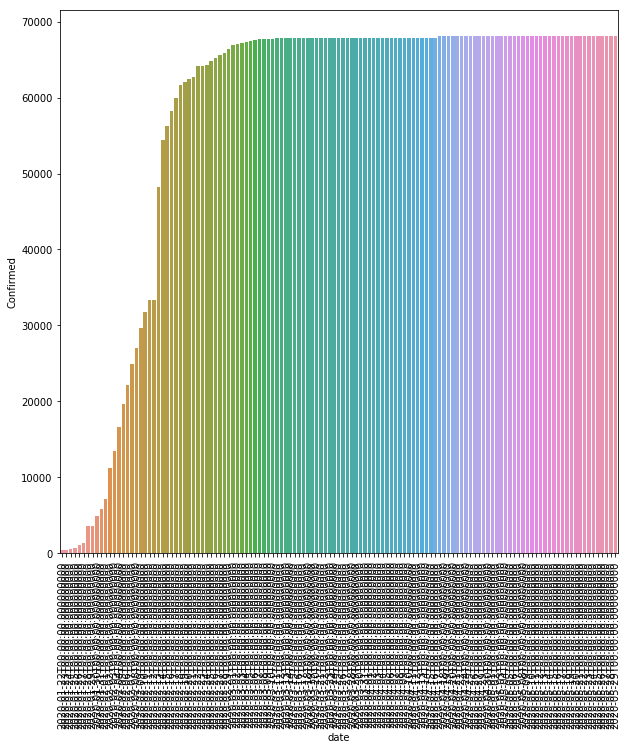

In [70]:
sns.barplot(x='date', y='Confirmed', data=df_china.loc[df_china.Province_State == 'Hubei'])
plt.xticks(rotation=90)
plt.show()

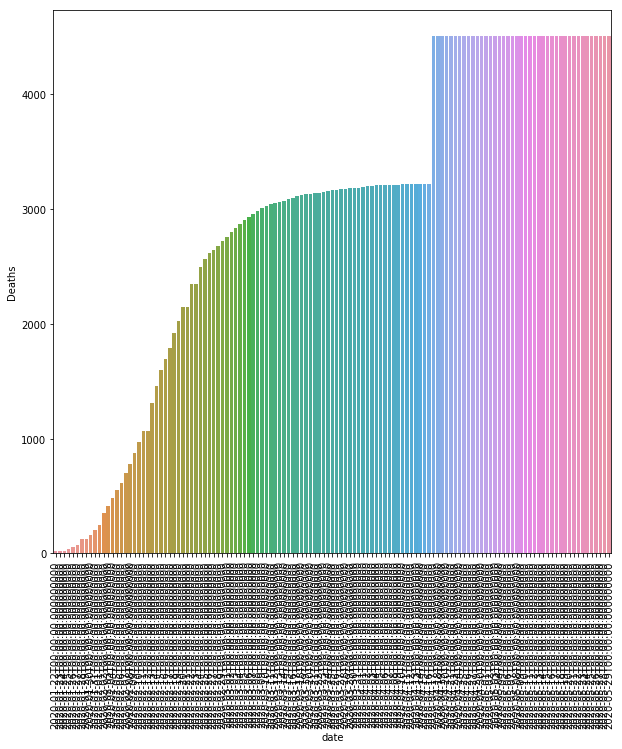

In [71]:
sns.barplot(x='date', y='Deaths', data=df_china.loc[df_china.Province_State == 'Hubei'])
plt.xticks(rotation=90)
plt.show()

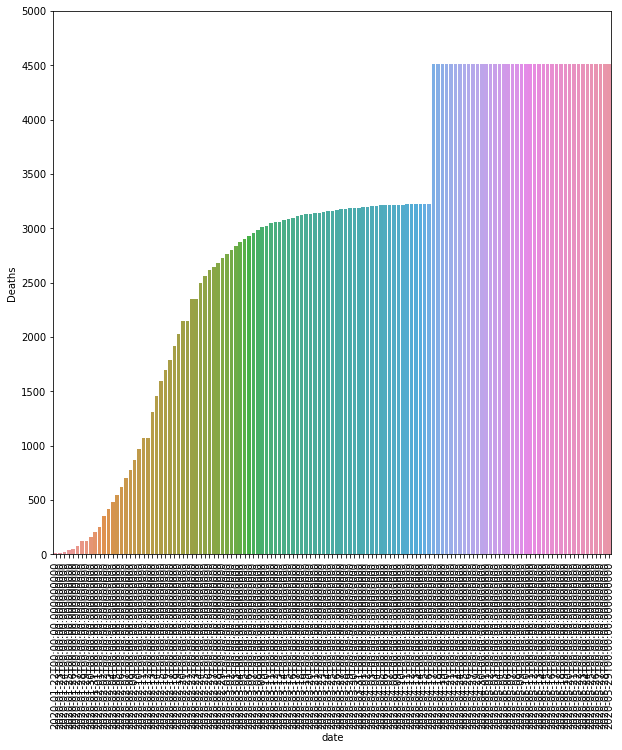

In [72]:
sns.barplot(x='date', y='Deaths', data=df_china.loc[df_china.Province_State == 'Hubei'])
plt.xticks(rotation=90)
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])
plt.show()

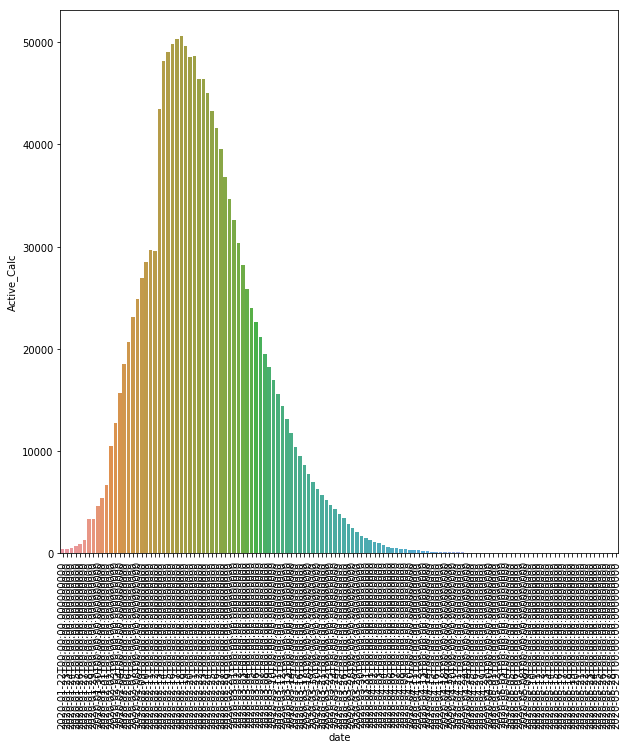

In [73]:
sns.barplot(x='date', y='Active_Calc', data=df_china.loc[df_china.Province_State == 'Hubei'])
plt.xticks(rotation=90)
# plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])
plt.show()

In [74]:
df_china.groupby(['Province_State'])['Deaths'].max().sort_values(ascending=False)

Province_State
Hubei             4512
Henan               22
Heilongjiang        13
Beijing              9
Guangdong            8
Shandong             7
Shanghai             7
Hainan               6
Anhui                6
Chongqing            6
Hebei                6
Hunan                4
Hong Kong            4
Shaanxi              3
Sichuan              3
Tianjin              3
Xinjiang             3
Gansu                2
Liaoning             2
Jilin                2
Guangxi              2
Yunnan               2
Guizhou              2
Fujian               1
Zhejiang             1
Inner Mongolia       1
Jiangxi              1
Macau                0
Ningxia              0
Qinghai              0
Shanxi               0
Tibet                0
Jiangsu              0
Name: Deaths, dtype: int64

In [75]:
df2 = df1.loc[df1.date == '2020-05-29'].groupby(['Province_State']).max()#.sort_values(by=['Deaths', 'Confirmed', 'Active', 'Recovered'], ascending=['False', 'False', 'False', 'False'])

### Analysis

- Top 10 countries with maximum fatalities
- Top 10 Provincies in US with maximum fatalities
- Countries with highest fatalities to recovery ratio
- Countries with maximum recovery rate
- Country with most active cases
- Country with largest single day spike in: 
    - Deaths
    - Confirmed
    - Recovered

#### Provinces with Maximum Fatalities

In [76]:
df2.head()

Confirmed  Deaths  Recovered FIPS Admin2 Country_Region         Last_Update          Lat        Long_  Active            Combined_Key       date  Active_Calc
Province_State                                                                                                                                                               
                   379051   37837     150993                   Zimbabwe 2020-05-29 02:32:50       9.9456       95.956  231290                Zimbabwe 2020-05-29       231290
Abruzzo              3237     402       2011                      Italy 2020-05-29 02:32:50  42.35122196  13.39843823     824          Abruzzo, Italy 2020-05-29          824
Acre                 5600     122          0                     Brazil 2020-05-29 02:32:50      -9.0238      -70.812    5478            Acre, Brazil 2020-05-29         5478
Aguascalientes        769      33        523                     Mexico 2020-05-29 02:32:50      21.8853    -102.2916     213  Aguascalientes, Mexico 2020-05-29          213
Aichi                 506      34        453                      Japan 2020-05-29 02:32:50    35.035551   137.211621      19            Aichi, Japan 2020-05-29           19

In [77]:
df2 = df2.iloc[1:, :]

In [78]:
provincies_with_maximum_fatalities = df2.sort_values(by='Deaths', ascending=False)

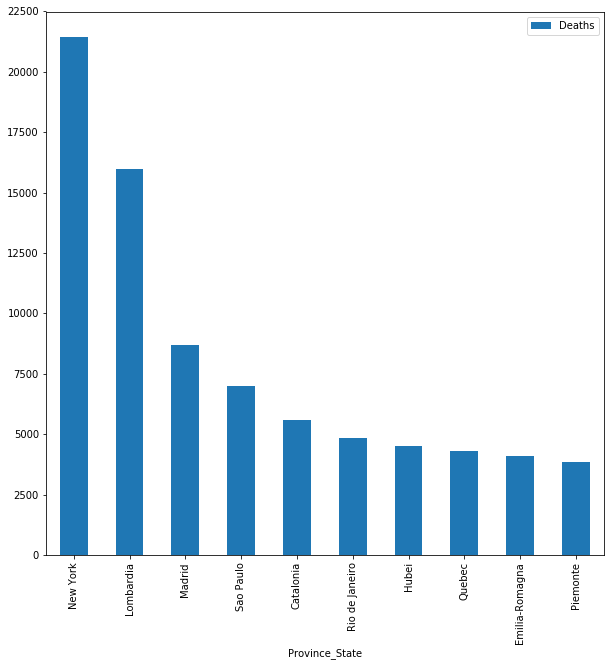

In [79]:
provincies_with_maximum_fatalities[['Deaths']].head(10).plot(kind='bar')

#### Top 10 countries with maximum fatalities

In [80]:
df3 = df1.loc[df1.date == '2020-05-29'].groupby(['Country_Region']).max().sort_values(by='Deaths', ascending=False).iloc[1:, :]

In [81]:
df3 = df1.loc[df1.date == '2020-05-29'].groupby(['Country_Region'])['Deaths'].sum()#.iloc[1:, :].head(10)

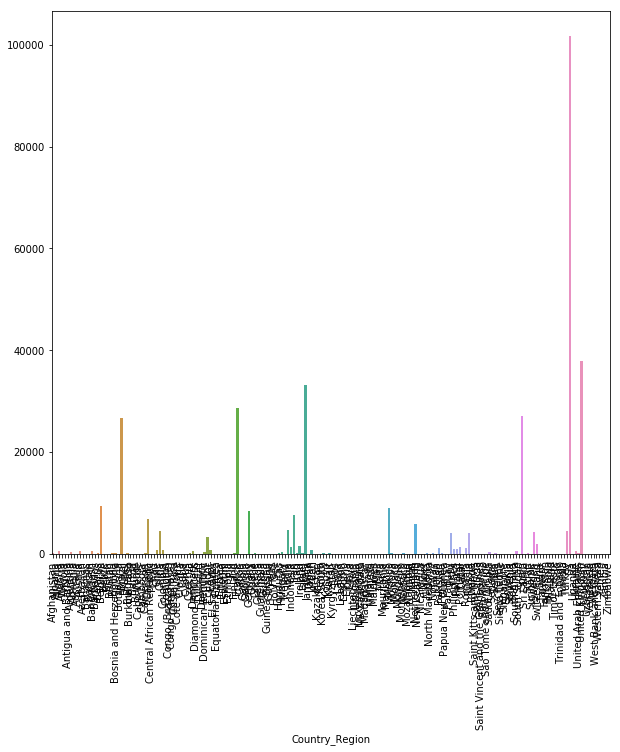

In [82]:
sns.barplot(x=df3.index, y=df3.values)
plt.xticks(rotation=90)
plt.show()

In [83]:
top_20_countries_most_deaths = df3.sort_values(ascending=False)[:20]

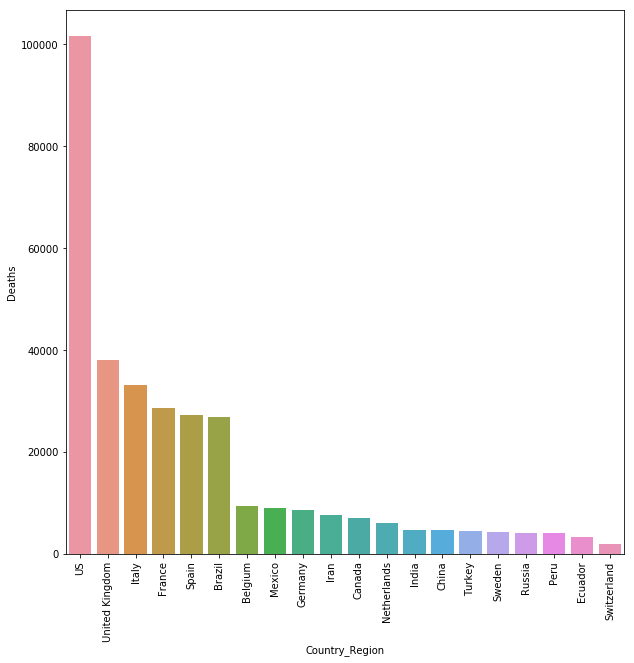

In [84]:
sns.barplot(x=top_20_countries_most_deaths.index, y=top_20_countries_most_deaths)
plt.xticks(rotation=90)
plt.show()

#### Countries with most active cases

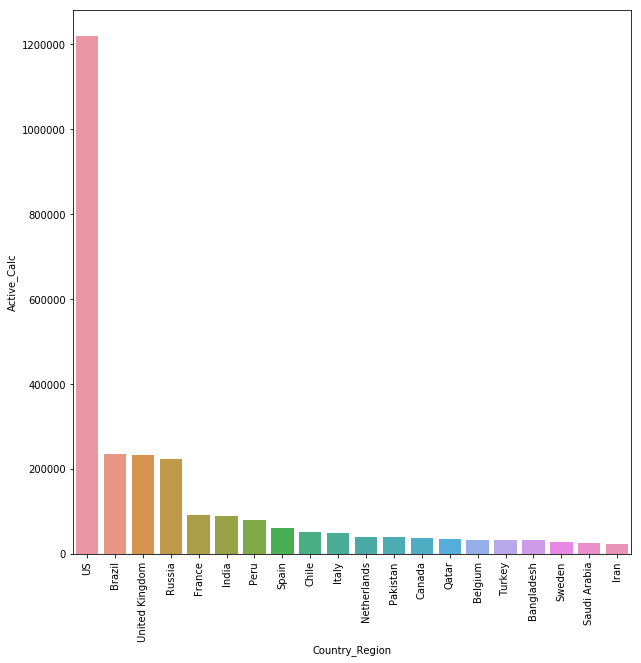

In [85]:
# df3 = df1.loc[df1.date == '2020-05-29'].groupby(['Country_Region']).max().sort_values(by='Deaths', ascending=False).iloc[1:, :]
df3 = df1.loc[df1.date == '2020-05-29'].groupby(['Country_Region'])['Active_Calc'].sum()#.iloc[1:, :].head(10)
top_20_countries_most_active_cases = df3.sort_values(ascending=False)[:20]
sns.barplot(x=top_20_countries_most_active_cases.index, y=top_20_countries_most_active_cases)
plt.xticks(rotation=90)
plt.show()

In [86]:
top_20_countries_most_active_cases

Country_Region
US                1220146
Brazil             233880
United Kingdom     231422
Russia             223916
France              90390
India               89755
Peru                78238
Spain               60411
Chile               49938
Italy               47986
Netherlands         40052
Pakistan            39736
Canada              36033
Qatar               35482
Belgium             32889
Turkey              32149
Bangladesh          31337
Sweden              26490
Saudi Arabia        25191
Iran                23234
Name: Active_Calc, dtype: int64

In [87]:
df3 = df1.loc[df1.date == '2020-05-29']#.groupby(['Country_Region'])['Active'].sum()#.iloc[1:, :].head(10)

#### Countries with most recoveries

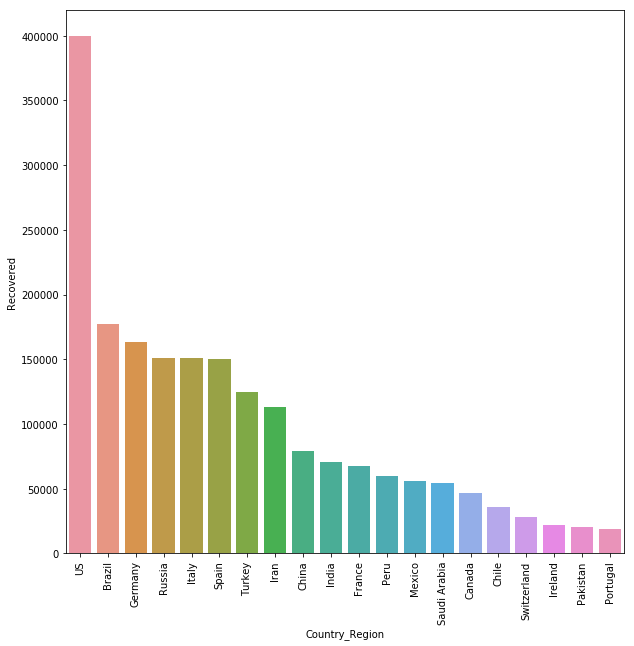

In [88]:
df3 = df1.loc[df1.date == '2020-05-29'].groupby(['Country_Region'])['Recovered'].sum()#.iloc[1:, :].head(10)
top_20_countries_most_recovered_cases = df3.sort_values(ascending=False)[:20]
sns.barplot(x=top_20_countries_most_recovered_cases.index, y=top_20_countries_most_recovered_cases)
plt.xticks(rotation=90)
plt.show()

In [89]:
top_20_countries_most_recovered_cases

Country_Region
US              399991
Brazil          177604
Germany         163360
Russia          150993
Italy           150604
Spain           150376
Turkey          124369
Iran            112988
China            79371
India            70920
France           67309
Peru             59442
Mexico           56041
Saudi Arabia     54553
Canada           46961
Chile            36115
Switzerland      28300
Ireland          22089
Pakistan         20231
Portugal         18637
Name: Recovered, dtype: int64

In [90]:
df1.tail()

Confirmed  Deaths  Recovered FIPS Admin2 Province_State      Country_Region         Last_Update                 Lat      Long_  Active        Combined_Key       date  Active_Calc
214839        446       3        368                             West Bank and Gaza 2020-05-29 02:32:50             31.9522    35.2332      75  West Bank and Gaza 2020-05-29           75
214840          9       1          6                                 Western Sahara 2020-05-29 02:32:50             24.2155   -12.8858       2      Western Sahara 2020-05-29            2
214841        278      57         11                                          Yemen 2020-05-29 02:32:50  15.552726999999999  48.516388     210               Yemen 2020-05-29          210
214842       1057       7        779                                         Zambia 2020-05-29 02:32:50          -13.133897  27.849332     271              Zambia 2020-05-29          271
214843        149       4         28                                       Zimbabwe 2020-05-29 02:32:50          -19.015438  29.154857     117            Zimbabwe 2020-05-29          117

In [91]:
# df3 = df1.loc[df1.date == '2020-05-24'].groupby(['Country_Region'])['Death_Recovery_Ratio'].sum()#.iloc[1:, :].head(10)
# top_20_countries_most_fatality_recovery_ratio = df3.sort_values(ascending=False)[:20]
# sns.barplot(x=top_20_countries_most_fatality_recovery_ratio.index, y=top_20_countries_most_fatality_recovery_ratio)
# plt.xticks(rotation=90)
# plt.show()

In [92]:
# df1.loc[df1.date == '2020-05-24'].groupby(['Country_Region'])['Death_Recovery_Ratio'].sum().sort_values(ascending=False)

In [93]:
df1.loc[df1.date == '2020-05-29']

Confirmed  Deaths  Recovered   FIPS          Admin2             Province_State                    Country_Region         Last_Update                  Lat                Long_  Active                              Combined_Key       date  Active_Calc
211326         37       0          0  45001       Abbeville             South Carolina                                US 2020-05-29 02:32:50          34.22333378         -82.46170658      37             Abbeville, South Carolina, US 2020-05-29           37
211327        401      22          0  22001          Acadia                  Louisiana                                US 2020-05-29 02:32:50           30.2950649         -92.41419698     379                     Acadia, Louisiana, US 2020-05-29          379
211328        807      12          0  51001        Accomack                   Virginia                                US 2020-05-29 02:32:50          37.76707161         -75.63234615     795                    Accomack, Virginia, US 2020-05-29          795
211329        803      22          0  16001             Ada                      Idaho                                US 2020-05-29 02:32:50           43.4526575  -116.24155159999998     781                            Ada, Idaho, US 2020-05-29          781
211330          8       0          0  19001           Adair                       Iowa                                US 2020-05-29 02:32:50          41.33075609         -94.47105874       8                           Adair, Iowa, US 2020-05-29            8
211331         96      19          0  21001           Adair                   Kentucky                                US 2020-05-29 02:32:50          37.10459774         -85.28129668      77                       Adair, Kentucky, US 2020-05-29           77
211332         49       0          0  29001           Adair                   Missouri                                US 2020-05-29 02:32:50          40.19058551         -92.60078167      49                       Adair, Missouri, US 2020-05-29           49
211333         84       3          0  40001           Adair                   Oklahoma                                US 2020-05-29 02:32:50          35.88494195         -94.65859267      81                       Adair, Oklahoma, US 2020-05-29           81
211334       3070     118          0   8001           Adams                   Colorado                                US 2020-05-29 02:32:50          39.87432092         -104.3362578    2952                       Adams, Colorado, US 2020-05-29         2952
211335          3       0          0  16003           Adams                      Idaho                                US 2020-05-29 02:32:50          44.89333571         -116.4545247       3                          Adams, Idaho, US 2020-05-29            3
211336         44       1          0  17001           Adams                   Illinois                                US 2020-05-29 02:32:50          39.98815591         -91.18786813      43                       Adams, Illinois, US 2020-05-29           43
211337         13       1          0  18001           Adams                    Indiana                                US 2020-05-29 02:32:50           40.7457653         -84.93671406      12                        Adams, Indiana, US 2020-05-29           12
211338          7       0          0  19003           Adams                       Iowa                                US 2020-05-29 02:32:50          41.02903567         -94.69932645       7                           Adams, Iowa, US 2020-05-29            7
211339        190      15          0  28001           Adams                Mississippi                                US 2020-05-29 02:32:50          31.47669768         -91.35326037     175                    Adams, Mississippi, US 2020-05-29          175
211340        265      11          0  31001           Adams                   Nebraska                                US 2020-05-29 02:32:50    40.524494

### India's fight against corona virus

### Active Cases

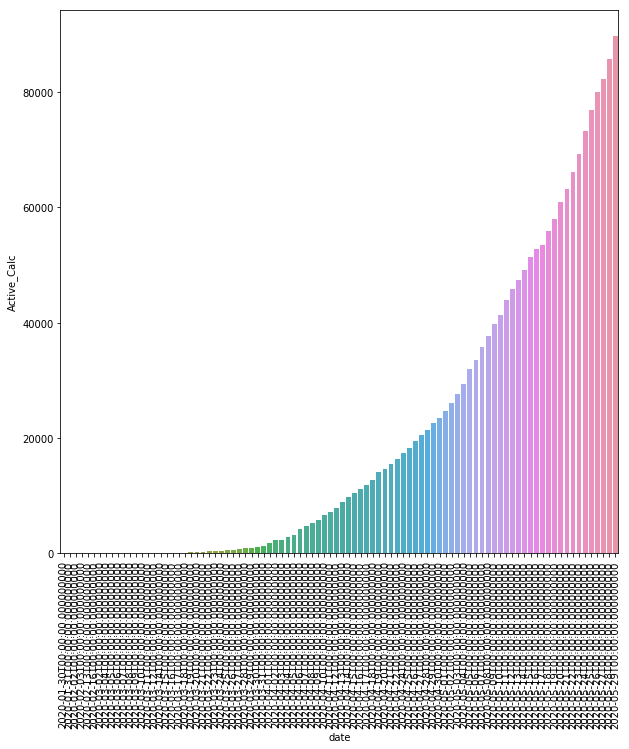

In [94]:
sns.barplot(x='date', y='Active_Calc', data=df1.loc[df1.Country_Region == 'India'])
plt.xticks(rotation=90)
# plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])
plt.show()

### Deaths

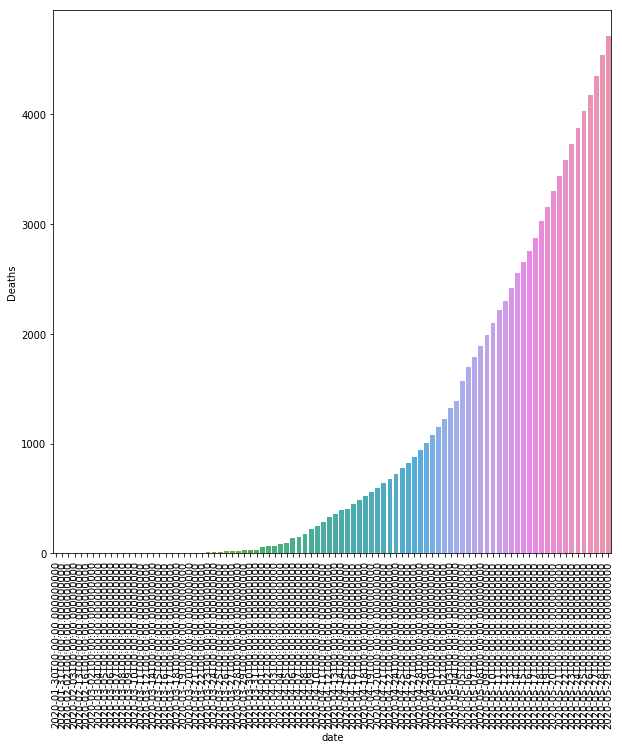

In [95]:
sns.barplot(x='date', y='Deaths', data=df1.loc[df1.Country_Region == 'India'])
plt.xticks(rotation=90)
# plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])
plt.show()

### Recovery

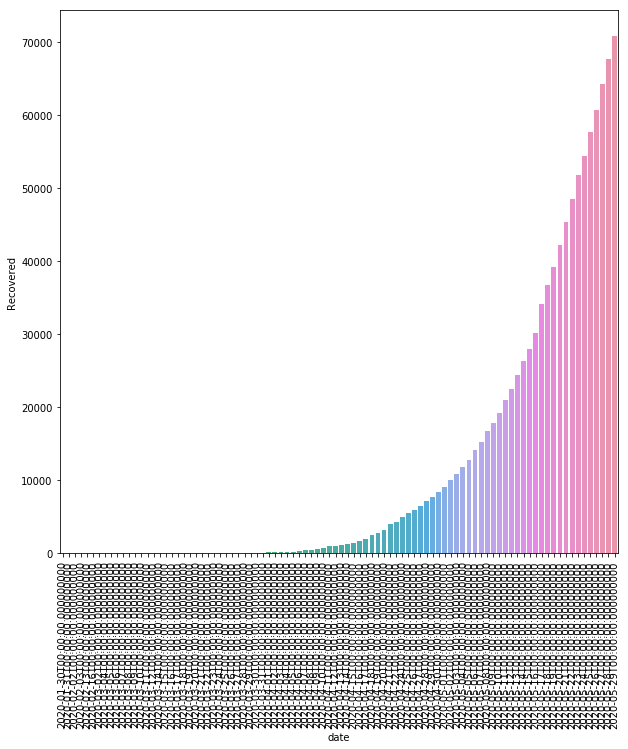

In [96]:
sns.barplot(x='date', y='Recovered', data=df1.loc[df1.Country_Region == 'India'])
plt.xticks(rotation=90)
# plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])
plt.show()

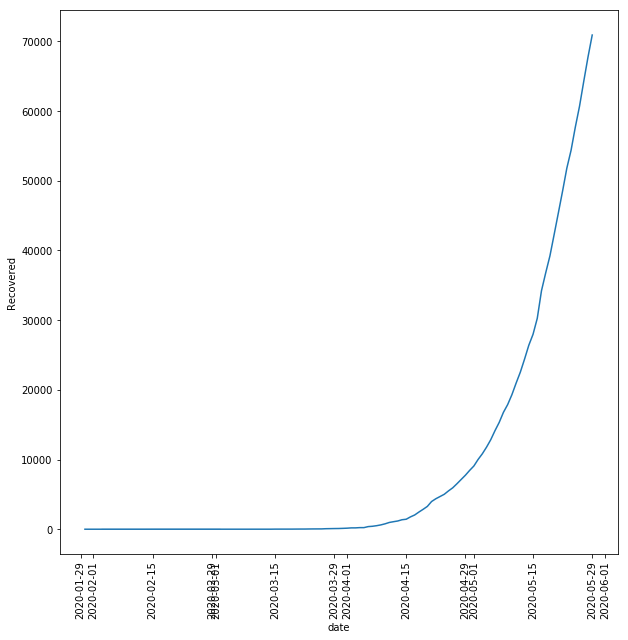

In [97]:
sns.lineplot(x='date', y='Recovered', data=df1.loc[df1.Country_Region == 'India'])
plt.xticks(rotation=90)
# plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])
plt.show()

In [98]:
df3 = df1.loc[df1.date == '2020-05-29'].groupby('Country_Region').sum()

In [99]:
# df3[df3['Death_Recovery_Ratio'] == np.inf]

In [100]:
df3.tail(20)

Confirmed  Deaths  Recovered   Active  Active_Calc
Country_Region                                                          
Thailand                   3065      57       2945       63           63
Timor-Leste                  24       0         24        0            0
Togo                        422      13        197      212          212
Trinidad and Tobago         116       8        108        0            0
Tunisia                    1068      48        938       82           82
Turkey                   160979    4461     124369    32149        32149
US                      1721753  101616     399991  1249340      1220146
Uganda                      317       0         69      248          248
Ukraine                   22382     669       8439    13274        13274
United Arab Emirates      32532     258      16685    15589        15589
United Kingdom           270508   37919       1167   231422       231422
Uruguay                     811      22        654      135          135
Uzbekistan                 3444      14       2694      736          736
Venezuela                  1325      11        302     1012         1012
Vietnam                     327       0        278       49           49
West Bank and Gaza          446       3        368       75           75
Western Sahara                9       1          6        2            2
Yemen                       278      57         11      210          210
Zambia                     1057       7        779      271          271
Zimbabwe                    149       4         28      117          117

In [101]:
df3['Death_Recovery_Ratio'] = df3['Deaths'] / df3['Recovered']

In [102]:
top_20_highest_death_recovery_ratio = df3.sort_values('Death_Recovery_Ratio', ascending=False).head(20)

In [103]:
top_20_highest_death_recovery_ratio.index

Index(['MS Zaandam', 'Netherlands', 'United Kingdom', 'Yemen', 'South Sudan', 'Haiti', 'Mauritania', 'Sweden', 'Belgium', 'France', 'Bolivia', 'Honduras', 'Sudan', 'Philippines', 'Hungary', 'US', 'Indonesia', 'Bahamas', 'Somalia', 'Angola'], dtype='object', name='Country_Region')

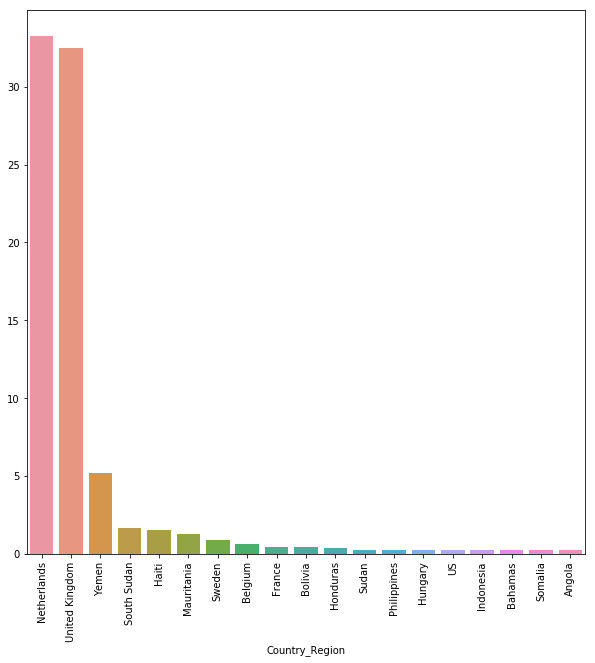

In [104]:
sns.barplot(x=top_20_highest_death_recovery_ratio.index[1:], y=top_20_highest_death_recovery_ratio['Death_Recovery_Ratio'].values[1:])
plt.xticks(rotation=90)
plt.show()

#### Data Cleaning

In [105]:
us_state_abbrev = """Alabama - AL

Alaska - AK

Arizona - AZ

Arkansas - AR

California - CA

Colorado - CO

Connecticut - CT

Delaware - DE

Florida - FL

Georgia - GA

Hawaii - HI

Idaho - ID

Illinois - IL

Indiana - IN

Iowa - IA

Kansas - KS

Kentucky - KY

Louisiana - LA

Maine - ME

Maryland - MD

Massachusetts - MA

Michigan - MI

Minnesota - MN

Mississippi - MS

Missouri - MO

Montana - MT

Nebraska - NE

Nevada - NV

New Hampshire - NH

New Jersey - NJ

New Mexico - NM

New York - NY

North Carolina - NC

North Dakota - ND

Ohio - OH

Oklahoma - OK

Oregon - OR

Pennsylvania - PA

Rhode Island - RI

South Carolina - SC

South Dakota - SD

Tennessee - TN

Texas - TX

Utah - UT

Vermont - VT

Virginia - VA

Washington - WA

West Virginia - WV

Wisconsin - WI

Wyoming - WY
"""

In [106]:
us_state_abbrev.replace("\n\n", "\n")

'Alabama - AL\nAlaska - AK\nArizona - AZ\nArkansas - AR\nCalifornia - CA\nColorado - CO\nConnecticut - CT\nDelaware - DE\nFlorida - FL\nGeorgia - GA\nHawaii - HI\nIdaho - ID\nIllinois - IL\nIndiana - IN\nIowa - IA\nKansas - KS\nKentucky - KY\nLouisiana - LA\nMaine - ME\nMaryland - MD\nMassachusetts - MA\nMichigan - MI\nMinnesota - MN\nMississippi - MS\nMissouri - MO\nMontana - MT\nNebraska - NE\nNevada - NV\nNew Hampshire - NH\nNew Jersey - NJ\nNew Mexico - NM\nNew York - NY\nNorth Carolina - NC\nNorth Dakota - ND\nOhio - OH\nOklahoma - OK\nOregon - OR\nPennsylvania - PA\nRhode Island - RI\nSouth Carolina - SC\nSouth Dakota - SD\nTennessee - TN\nTexas - TX\nUtah - UT\nVermont - VT\nVirginia - VA\nWashington - WA\nWest Virginia - WV\nWisconsin - WI\nWyoming - WY\n'

In [107]:
us_state_mapping = {}
pattern = re.compile(r'(\w+\s?\w+)\s+-\s+(\w+)', re.MULTILINE)
matches = pattern.finditer(us_state_abbrev) 
for match in matches:
    us_state_mapping[match.group(2)] = match.group(1)
    print(f"{match.group(2)} : {match.group(1)}")
us_state_mapping

AL : Alabama
AK : Alaska
AZ : Arizona
AR : Arkansas
CA : California
CO : Colorado
CT : Connecticut
DE : Delaware
FL : Florida
GA : Georgia
HI : Hawaii
ID : Idaho
IL : Illinois
IN : Indiana
IA : Iowa
KS : Kansas
KY : Kentucky
LA : Louisiana
ME : Maine
MD : Maryland
MA : Massachusetts
MI : Michigan
MN : Minnesota
MS : Mississippi
MO : Missouri
MT : Montana
NE : Nebraska
NV : Nevada
NH : New Hampshire
NJ : New Jersey
NM : New Mexico
NY : New York
NC : North Carolina
ND : North Dakota
OH : Ohio
OK : Oklahoma
OR : Oregon
PA : Pennsylvania
RI : Rhode Island
SC : South Carolina
SD : South Dakota
TN : Tennessee
TX : Texas
UT : Utah
VT : Vermont
VA : Virginia
WA : Washington
WV : West Virginia
WI : Wisconsin
WY : Wyoming


{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming'}

In [108]:
# df_us = df1.loc[(df1.Country_Region == 'US') & (df1.date == '2020-05-24')]
df_us = df1.loc[(df1.Country_Region == 'US')]

In [109]:
df_us.Province_State.tail()

214451                        Guam
214545    Northern Mariana Islands
214572                 Puerto Rico
214582                   Recovered
214657              Virgin Islands
Name: Province_State, dtype: object

In [110]:
df_us.loc[:, 'state'] = df_us.Province_State.str.strip().str.split(',', n=1).apply(lambda x: x[-1])

/home/akash/Dev/python/venv/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/akash/Dev/python/venv/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [111]:
def map_us_state_abbreviation_to_state_name(abbrev):
    abbrev = abbrev.strip()
    if abbrev in us_state_mapping:
        return us_state_mapping[abbrev]
    elif 'Diamond Princess' in abbrev or 'Recovered' in abbrev:
        return np.nan
    
    else:
        return abbrev

In [112]:
df_us.head()

Confirmed  Deaths  Recovered FIPS Admin2 Province_State Country_Region         Last_Update  Lat Long_  Active Combined_Key       date  Active_Calc       state
31           1       0          0  NaN    NaN     Washington             US 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22            1  Washington
69           1       0          0  NaN    NaN     Washington             US 2020-01-23 17:00:00  NaN   NaN       0          NaN 2020-01-23            1  Washington
117          1       0          0  NaN    NaN     Washington             US 2020-01-24 17:00:00  NaN   NaN       0          NaN 2020-01-24            1  Washington
118          1       0          0  NaN    NaN        Chicago             US 2020-01-24 17:00:00  NaN   NaN       0          NaN 2020-01-24            1     Chicago
158          1       0          0  NaN    NaN     Washington             US 2020-01-25 17:00:00  NaN   NaN       0          NaN 2020-01-25            1  Washington

In [113]:
df_us.loc[:, 'state'] = df_us['state'].map(map_us_state_abbreviation_to_state_name)

In [114]:
len(df_us)

197090

In [115]:
df_us = df_us.dropna(subset=['state'])

In [116]:
len(df_us)

196878

In [117]:
df_us.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_', 'Active', 'Combined_Key', 'date', 'Active_Calc', 'state'], dtype='object')

In [118]:
df_us.head()

Confirmed  Deaths  Recovered FIPS Admin2 Province_State Country_Region         Last_Update  Lat Long_  Active Combined_Key       date  Active_Calc       state
31           1       0          0  NaN    NaN     Washington             US 2020-01-22 17:00:00  NaN   NaN       0          NaN 2020-01-22            1  Washington
69           1       0          0  NaN    NaN     Washington             US 2020-01-23 17:00:00  NaN   NaN       0          NaN 2020-01-23            1  Washington
117          1       0          0  NaN    NaN     Washington             US 2020-01-24 17:00:00  NaN   NaN       0          NaN 2020-01-24            1  Washington
118          1       0          0  NaN    NaN        Chicago             US 2020-01-24 17:00:00  NaN   NaN       0          NaN 2020-01-24            1     Chicago
158          1       0          0  NaN    NaN     Washington             US 2020-01-25 17:00:00  NaN   NaN       0          NaN 2020-01-25            1  Washington

In [119]:
len(df_us[df_us.date == '2020-05-22'])

3000

In [120]:
df5 = df_us[df_us.date == '2020-05-29'].groupby('state').sum()
# df4[['state', 'Deaths', 'Active', 'Recovered', 'Confirmed', 'date']]
df5

Confirmed  Deaths  Recovered  Active  Active_Calc
state                                                                      
Alabama                       16530     591          0   15939        15939
Alaska                          424      10          0     414          414
Arizona                       17877     860          0   17017        17017
Arkansas                       6538     125          0    6413         6413
California                   103813    3993          0   99820        99820
Colorado                      25107    1421          0   23686        23686
Connecticut                   41559    3826          0   37733        37733
Delaware                       9171     345          0    8826         8826
District of Columbia           8492     453          0    8039         8039
Florida                       53285    2364          0   50921        50921
Georgia                       45266    1973          0   43293        43293
Grand Princess                  103       3          0     100          100
Guam                            171       5          0     166          166
Hawaii                          647      17          0     630          630
Idaho                          2770      82          0    2688         2688
Illinois                     115833    5186          0  110647       110647
Indiana                       33068    2068          0   31000        31000
Iowa                          18586     506          0   18080        18080
Kansas                         9371     214          0    9157         9157
Kentucky                       9185     409          0    8776         8776
Louisiana                     38802    2741          0   36061        36061
Maine                          2189      84          0    2105         2105
Maryland                      49709    2428          0   47281        47281
Massachusetts                 94895    6640          0   88255        88255
Michigan                      56014    5372          0   50642        50642
Minnesota                     22947     977          0   21970        21970
Mississippi                   14372     693          0   13679        13679
Missouri                      12981     708          0   12273        12273
Montana                         485      17          0     468          468
Nebraska                      13249     163          0   13086        13086
Nevada                         8248     406          0    7842         7842
New Hampshire                  4389     232          0    4157         4157
New Jersey                   157185   11409          0  145776       145776
New Mexico                     7364     335          0    7029         7029
New York                     366733   29529          0  337204       337204
North Carolina                25800     876          0   24924        24924
North Dakota                   2481      57          0    2424         2424
Northern Mariana Islands         22       2          0      20           20
Ohio                          33915    2098          0   31817        31817
Oklahoma                       6273     325          0    5948         5948
Oregon                         4086     151          0    3935         3935
Pennsylvania                  74220    5373          0   68847        68847
Puerto Rico                    3486     131          0    3355         3355
Rhode Island                  14494     677          0   13817        13817
South Carolina                10788     470          0   10318        10318
South Dakota                   4793      54          0    4739         4739
Tennessee                     21679     356          0   21323        21323
Texas                         60395    1611          0   58784        58784
Utah                           8921     106          0    8815         8815
Vermont                         974      55          0     919          919
Virgin Islands                   69       6          0      63           6

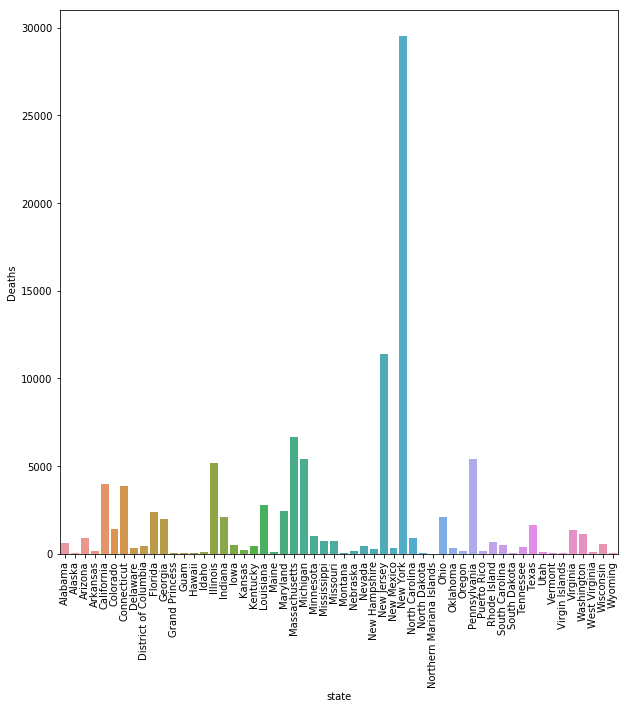

In [121]:
sns.barplot(x=df5.index, y=df5['Deaths'])
plt.xticks(rotation=90)
plt.show()

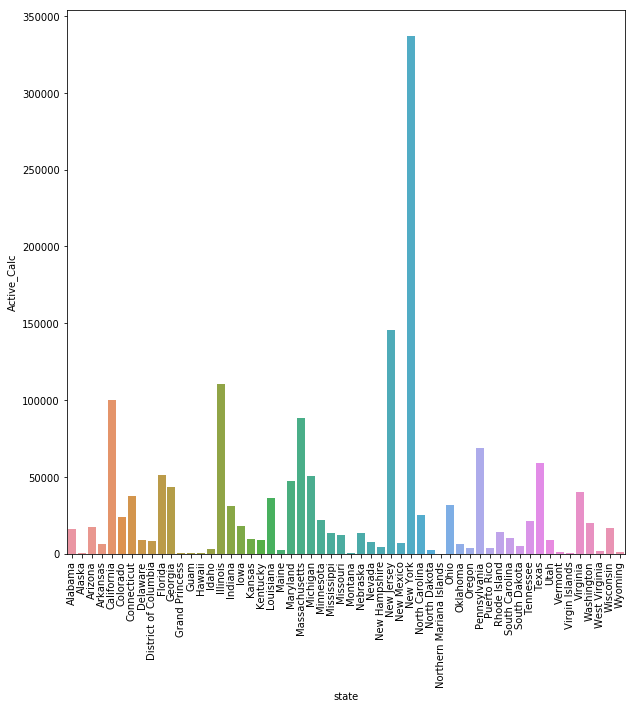

In [122]:
sns.barplot(x=df5.index, y=df5['Active_Calc'])
plt.xticks(rotation=90)
plt.show()

In [123]:
# sns.barplot(x=df_us.date, y=df_us.Deaths, hue=df_us.state)
# plt.xticks(rotation=90)
# plt.show()

In [124]:
df_us_top_states = df_us.loc[df_us.state.isin(['California', 'Illinois', 'Massachusetts',
                                              'Michigan', 'Pennsylvania', 'Texas', 'Maryland'])]

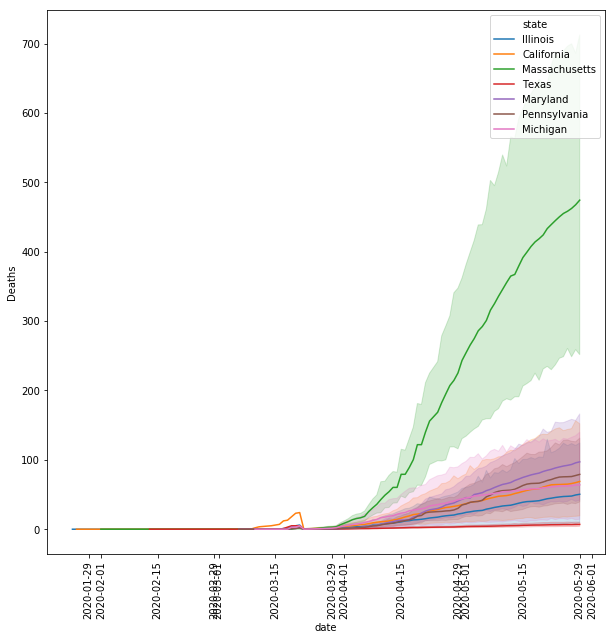

In [125]:
sns.lineplot(x=df_us_top_states.date, y=df_us_top_states.Deaths, hue=df_us_top_states.state)
plt.xticks(rotation=90)
plt.show()

In [126]:
df_us_top_states.Deaths

159          0
203          0
204          0
250          0
251          0
301          0
302          0
353          0
354          0
408          0
409          0
475          0
476          0
542          0
554          0
555          0
556          0
557          0
612          0
621          0
622          0
623          0
624          0
679          0
680          0
681          0
690          0
691          0
692          0
747          0
748          0
749          0
760          0
761          0
762          0
818          0
819          0
820          0
830          0
831          0
833          0
889          0
890          0
891          0
901          0
902          0
904          0
961          0
962          0
963          0
973          0
974          0
976          0
1033         0
1034         0
1035         0
1045         0
1046         0
1048         0
1106         0
1107         0
1108         0
1117         0
1118         0
1120         0
1178         0
1179      

In [127]:
df_us_top_states = df_us.loc[df_us.state == 'New York']

In [128]:
# sns.lineplot(x=df_us.date, y=df_us_top_states.Active_Calc)
# plt.xticks(rotation=90)
# plt.show()

In [129]:
df_us.tail()

Confirmed  Deaths  Recovered   FIPS Admin2            Province_State Country_Region         Last_Update      Lat     Long_  Active                  Combined_Key       date  Active_Calc                     state
214448        103       3          0  99999                   Grand Princess             US 2020-05-29 02:32:50                        100            Grand Princess, US 2020-05-29          100            Grand Princess
214451        171       5          0     66                             Guam             US 2020-05-29 02:32:50  13.4443  144.7937     166                      Guam, US 2020-05-29          166                      Guam
214545         22       2          0     69         Northern Mariana Islands             US 2020-05-29 02:32:50  15.0979  145.6739      20  Northern Mariana Islands, US 2020-05-29           20  Northern Mariana Islands
214572       3486     131          0     72                      Puerto Rico             US 2020-05-29 02:32:50  18.2208  -66.5901    3355               Puerto Rico, US 2020-05-29         3355               Puerto Rico
214657         69       6          0     78                   Virgin Islands             US 2020-05-29 02:32:50  18.3358  -64.8963      63            Virgin Islands, US 2020-05-29           63            Virgin Islands

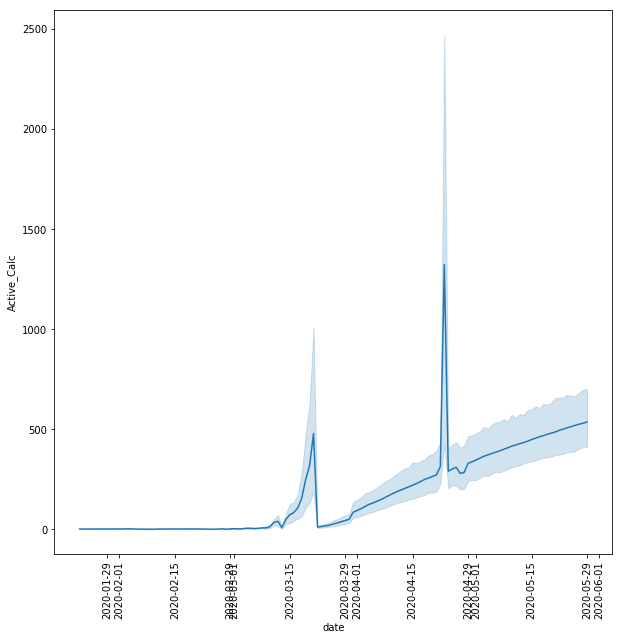

In [130]:
sns.lineplot(x=df_us.date, y=df_us.Active_Calc)
plt.xticks(rotation=90)
plt.show()

## Time Series Data Visualization

### Global Confirmed Cases

In [131]:
base_dir = '../data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'

In [132]:
abs_path = os.path.abspath(base_dir)

In [133]:
files = os.listdir(abs_path)
csv_files = filter(lambda file: '.csv' in file, files)
csv_abs_path = [os.path.join(abs_path, csv_file) for csv_file in csv_files]

In [134]:
csv_abs_path = sorted(csv_abs_path)

In [135]:
csv_abs_path

['/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/Errata.csv',
 '/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv',
 '/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
 '/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv',
 '/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
 '/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv']

In [136]:
columns = []
with open('/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    columns = next(spamreader) 
    l = [i for i in spamreader]

In [137]:
columns

['Province/State',
 'Country/Region',
 'Lat',
 'Long',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',


In [138]:
df_global_confirmed = pd.DataFrame(l, columns=columns)

In [139]:
df_global_confirmed.head()

Province/State Country/Region       Lat     Long 1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20 1/28/20 1/29/20 1/30/20 1/31/20 2/1/20 2/2/20 2/3/20 2/4/20 2/5/20 2/6/20 2/7/20 2/8/20 2/9/20 2/10/20 2/11/20 2/12/20 2/13/20 2/14/20 2/15/20 2/16/20 2/17/20 2/18/20 2/19/20 2/20/20 2/21/20 2/22/20 2/23/20 2/24/20 2/25/20 2/26/20 2/27/20 2/28/20 2/29/20 3/1/20 3/2/20 3/3/20 3/4/20 3/5/20 3/6/20 3/7/20 3/8/20 3/9/20 3/10/20 3/11/20 3/12/20 3/13/20 3/14/20 3/15/20 3/16/20 3/17/20 3/18/20 3/19/20 3/20/20 3/21/20 3/22/20 3/23/20 3/24/20 3/25/20 3/26/20 3/27/20 3/28/20 3/29/20 3/30/20 3/31/20 4/1/20 4/2/20 4/3/20 4/4/20 4/5/20 4/6/20 4/7/20 4/8/20 4/9/20 4/10/20 4/11/20 4/12/20 4/13/20 4/14/20 4/15/20 4/16/20 4/17/20 4/18/20 4/19/20 4/20/20 4/21/20 4/22/20 4/23/20 4/24/20 4/25/20 4/26/20 4/27/20 4/28/20 4/29/20 4/30/20 5/1/20 5/2/20 5/3/20 5/4/20 5/5/20 5/6/20 5/7/20 5/8/20 5/9/20 5/10/20 5/11/20 5/12/20 5/13/20 5/14/20 5/15/20 5/16/20 5/17/20 5/18/20 5/19/20 5/20/20 5/21/20 5/22/20  \
0                   Afghanistan      33.0     65.0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       1       1       1       1       1       1      1      1      1      1      1      1      1      4      4       5       7       7       7      11      16      21      22      22      22      24      24      40      40      74      84      94     110     110     120     170     174    237    273    281    299    349    367    423    444    484     521     555     607     665     714     784     840     906     933     996    1026    1092    1176    1279    1351    1463    1531    1703    1828    1939    2171   2335   2469   2704   2894   3224   3392   3563   3778   4033    4402    4687    4963    5226    5639    6053    6402    6664    7072    7653    8145    8676    9216   
1                       Albania   41.1533  20.1683       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      2      10      12      23      33      38      42      51      55      59      64      70      76      89     104     123     146     174     186     197     212     223     243    259    277    304    333    361    377    383    400    409     416     433     446     467     475     494     518     539     548     562     584     609     634     663     678     712     726     736     750     766     773    782    789    795    803    820    832    842    850    856     868     872     876     880     898     916     933     946     948     949     964     969     981   
2                       Algeria   28.0339   1.6596       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       1       1       1       1       1      1      3      5     12     12     17     17     19     20      20      20      24      26      37      48      54      60      74      87      90     139     201     230     264     302     367     409     454     511     584     716    847    986   1171   1251   1320   1423   1468   1572   1666    1761    1825    1914    1983    2070    2160    2268    2418    2534    2629    2718    2811    2910    3007    3127    3256    3382    3517    3649    3848    4006   4154   4295   4474   4648   4838   4997   5182   5369   5558    5723    5891    6067    6253    6442    6629    6821    7019    7201    7377    7542    7728    7918   
3                       An

In [140]:
df_global_confirmed_min = df_global_confirmed.drop(columns=['Province/State', 'Lat', 'Long'])

In [141]:
df_global_confirmed_min.columns

Index(['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       ...
       '6/3/20', '6/4/20', '6/5/20', '6/6/20', '6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20', '6/12/20'], dtype='object', length=144)

In [142]:
list_of_columns = [col for col in df_global_confirmed_min.columns if 'Country' not in col]

In [143]:
df_global_confirmed_min.columns[1:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/3/20', '6/4/20', '6/5/20', '6/6/20', '6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20', '6/12/20'], dtype='object', length=143)

In [144]:
df_trans = df_global_confirmed_min.transpose()

In [145]:
df_trans.head()

0        1        2        3       4                    5          6        7          8          9          10         11         12         13         14         15       16          17       18       19          20        21       22       23     24      25       26                      27      28      29        30            31          32        33        34      35      36      37      38      39      40      41      42      43      44      45                        46    47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81        82                   83                84          85             86       87                88    89      90       91       92       93       94        95                  96       97     98           99                 100      101      102  \
Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  Argentina  Armenia  Australia  Australia  Australia  Australia  Australia  Australia  Australia  Australia  Austria  Azerbaijan  Bahamas  Bahrain  Bangladesh  Barbados  Belarus  Belgium  Benin  Bhutan  Bolivia  Bosnia and Herzegovina  Brazil  Brunei  Bulgaria  Burkina Faso  Cabo Verde  Cambodia  Cameroon  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Central African Republic  Chad  Chile  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  Colombia  Congo (Brazzaville)  Congo (Kinshasa)  Costa Rica  Cote d'Ivoire  Croatia  Diamond Princess  Cuba  Cyprus  Czechia  Denmark  Denmark  Denmark  Djibouti  Dominican Republic  Ecuador  Egypt  El Salvador  Equatorial Guinea  Eritrea  Estonia   
1/22/20                   0        0        0        0       0                    0          0        0          0          0          0          0          0          0          0          0        0           0        0        0           0         0        0        0      0       0        0                       0       0       0         0             0           0         0         0       0       0       0       0       0       0       0       0       0       0       0                         0     0      0      1     14      6      1      0     26      2      1      4      1      0      5      0    444      4      0      1      2      0      2      1      1      0      0      2      9      1      5      4      0      0      1     10         0                    0                 0           0              0        0                 0     0       0        0        0        0        0         0                   0        0      0            0                  0        0        0   
1/23/20                   0        0        0        0       0                    0          0        0          0          0          0          0          0          0          0          0        0           0        0        0           0         0        0        0      0       0        0                       0       0       0         0             0           0         0         0       0       0       0       0       0       0       0       0       0       0       0                         0     0      0      9     22      9      5      2     32      5      3      5      1      2      5      2    444      9      0      5      7      1      3      2      1      0      3      6     16      1      8      4      0      2      2     27         0                    0                 0           0              0        0                 0     0       0        0        0        0        0         0                   0        0      0            0                  0        0        0   
1/24/20             

In [146]:
df_trans.iloc[0, :]

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                                Benin


In [147]:
df_global_confirmed_min.head()

Country/Region 1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20 1/28/20 1/29/20 1/30/20 1/31/20 2/1/20 2/2/20 2/3/20 2/4/20 2/5/20 2/6/20 2/7/20 2/8/20 2/9/20 2/10/20 2/11/20 2/12/20 2/13/20 2/14/20 2/15/20 2/16/20 2/17/20 2/18/20 2/19/20 2/20/20 2/21/20 2/22/20 2/23/20 2/24/20 2/25/20 2/26/20 2/27/20 2/28/20 2/29/20 3/1/20 3/2/20 3/3/20 3/4/20 3/5/20 3/6/20 3/7/20 3/8/20 3/9/20 3/10/20 3/11/20 3/12/20 3/13/20 3/14/20 3/15/20 3/16/20 3/17/20 3/18/20 3/19/20 3/20/20 3/21/20 3/22/20 3/23/20 3/24/20 3/25/20 3/26/20 3/27/20 3/28/20 3/29/20 3/30/20 3/31/20 4/1/20 4/2/20 4/3/20 4/4/20 4/5/20 4/6/20 4/7/20 4/8/20 4/9/20 4/10/20 4/11/20 4/12/20 4/13/20 4/14/20 4/15/20 4/16/20 4/17/20 4/18/20 4/19/20 4/20/20 4/21/20 4/22/20 4/23/20 4/24/20 4/25/20 4/26/20 4/27/20 4/28/20 4/29/20 4/30/20 5/1/20 5/2/20 5/3/20 5/4/20 5/5/20 5/6/20 5/7/20 5/8/20 5/9/20 5/10/20 5/11/20 5/12/20 5/13/20 5/14/20 5/15/20 5/16/20 5/17/20 5/18/20 5/19/20 5/20/20 5/21/20 5/22/20 5/23/20 5/24/20 5/25/20 5/26/20 5/27/20  \
0    Afghanistan       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       1       1       1       1       1       1      1      1      1      1      1      1      1      4      4       5       7       7       7      11      16      21      22      22      22      24      24      40      40      74      84      94     110     110     120     170     174    237    273    281    299    349    367    423    444    484     521     555     607     665     714     784     840     906     933     996    1026    1092    1176    1279    1351    1463    1531    1703    1828    1939    2171   2335   2469   2704   2894   3224   3392   3563   3778   4033    4402    4687    4963    5226    5639    6053    6402    6664    7072    7653    8145    8676    9216    9998   10582   11173   11831   12456   
1        Albania       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      2      10      12      23      33      38      42      51      55      59      64      70      76      89     104     123     146     174     186     197     212     223     243    259    277    304    333    361    377    383    400    409     416     433     446     467     475     494     518     539     548     562     584     609     634     663     678     712     726     736     750     766     773    782    789    795    803    820    832    842    850    856     868     872     876     880     898     916     933     946     948     949     964     969     981     989     998    1004    1029    1050   
2        Algeria       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       1       1       1       1       1      1      3      5     12     12     17     17     19     20      20      20      24      26      37      48      54      60      74      87      90     139     201     230     264     302     367     409     454     511     584     716    847    986   1171   1251   1320   1423   1468   1572   1666    1761    1825    1914    1983    2070    2160    2268    2418    2534    2629    2718    2811    2910    3007    3127    3256    3382    3517    3649    3848    4006   4154   4295   4474   4648   4838   4997   5182   5369   5558    5723    5891    6067    6253    6442    6629    6821    7019    7201    7377    7542    7728    7918    8113    8306    8503    8697    8857   
3 

In [148]:
df_trans.columns = df_trans.iloc[0, :]

In [149]:
df_trans = df_trans.iloc[1:, :]

In [150]:
df_trans.head()

Country/Region Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda Argentina Armenia Australia Australia Australia Australia Australia Australia Australia Australia Austria Azerbaijan Bahamas Bahrain Bangladesh Barbados Belarus Belgium Benin Bhutan Bolivia Bosnia and Herzegovina Brazil Brunei Bulgaria Burkina Faso Cabo Verde Cambodia Cameroon Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Central African Republic Chad Chile China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China Colombia Congo (Brazzaville) Congo (Kinshasa) Costa Rica Cote d'Ivoire Croatia Diamond Princess Cuba Cyprus Czechia Denmark Denmark Denmark Djibouti Dominican Republic Ecuador Egypt El Salvador Equatorial Guinea Eritrea Estonia Eswatini Ethiopia Fiji Finland France France France France France France France France France France  \
1/22/20                  0       0       0       0      0                   0         0       0         0         0         0         0         0         0         0         0       0          0       0       0          0        0       0       0     0      0       0                      0      0      0        0            0          0        0        0      0      0      0      0      0      0      0      0      0      0      0                        0    0     0     1    14     6     1     0    26     2     1     4     1     0     5     0   444     4     0     1     2     0     2     1     1     0     0     2     9     1     5     4     0     0     1    10        0                   0                0          0             0       0                0    0      0       0       0       0       0        0                  0       0     0           0                 0       0       0        0        0    0       0      0      0      0      0      0      0      0      0      0      0   
1/23/20                  0       0       0       0      0                   0         0       0         0         0         0         0         0         0         0         0       0          0       0       0          0        0       0       0     0      0       0                      0      0      0        0            0          0        0        0      0      0      0      0      0      0      0      0      0      0      0                        0    0     0     9    22     9     5     2    32     5     3     5     1     2     5     2   444     9     0     5     7     1     3     2     1     0     3     6    16     1     8     4     0     2     2    27        0                   0                0          0             0       0                0    0      0       0       0       0       0        0                  0       0     0           0                 0       0       0        0        0    0       0      0      0      0      0      0      0      0      0      0      0   
1/24/20                  0       0       0       0      0                   0         0       0         0         0         0         0         0         0         0         0       0          0       0       0          0        0       0       0     0      0       0                      0      0      0        0            0          0        0        0      0      0      0      0      0      0      0      0      0      0      0                        0    0     0    15    36    27    10     2    53    23     3     8     2     4     9     2   549    24     1     9    18     3     4     2     2     0     5    15    20     1    15     8     0     2     5    43        0                   0                0          0             0       0                0    0      0       0       0       0       0        0                  0       0     0           0                 0       0       0        0        0    0       0      0      0      0      0      0      0      0      0      0      2   
1/25

In [151]:
df_trans = df_trans.astype(np.int)
df_trans.index = pd.to_datetime(df_trans.index)

In [152]:
df_trans.dtypes

Country/Region
Afghanistan                         int64
Albania                             int64
Algeria                             int64
Andorra                             int64
Angola                              int64
Antigua and Barbuda                 int64
Argentina                           int64
Armenia                             int64
Australia                           int64
Australia                           int64
Australia                           int64
Australia                           int64
Australia                           int64
Australia                           int64
Australia                           int64
Australia                           int64
Austria                             int64
Azerbaijan                          int64
Bahamas                             int64
Bahrain                             int64
Bangladesh                          int64
Barbados                            int64
Belarus                             int64
Belgium            

In [153]:
df_trans.head()

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  Argentina  Armenia  Australia  Australia  Australia  Australia  Australia  Australia  Australia  Australia  Austria  Azerbaijan  Bahamas  Bahrain  Bangladesh  Barbados  Belarus  Belgium  Benin  Bhutan  Bolivia  Bosnia and Herzegovina  Brazil  Brunei  Bulgaria  Burkina Faso  Cabo Verde  Cambodia  Cameroon  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Central African Republic  Chad  Chile  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  Colombia  Congo (Brazzaville)  Congo (Kinshasa)  Costa Rica  Cote d'Ivoire  Croatia  Diamond Princess  Cuba  Cyprus  Czechia  Denmark  Denmark  Denmark  Djibouti  Dominican Republic  Ecuador  Egypt  El Salvador  Equatorial Guinea  Eritrea  Estonia  \
2020-01-22                0        0        0        0       0                    0          0        0          0          0          0          0          0          0          0          0        0           0        0        0           0         0        0        0      0       0        0                       0       0       0         0             0           0         0         0       0       0       0       0       0       0       0       0       0       0       0                         0     0      0      1     14      6      1      0     26      2      1      4      1      0      5      0    444      4      0      1      2      0      2      1      1      0      0      2      9      1      5      4      0      0      1     10         0                    0                 0           0              0        0                 0     0       0        0        0        0        0         0                   0        0      0            0                  0        0        0   
2020-01-23                0        0        0        0       0                    0          0        0          0          0          0          0          0          0          0          0        0           0        0        0           0         0        0        0      0       0        0                       0       0       0         0             0           0         0         0       0       0       0       0       0       0       0       0       0       0       0                         0     0      0      9     22      9      5      2     32      5      3      5      1      2      5      2    444      9      0      5      7      1      3      2      1      0      3      6     16      1      8      4      0      2      2     27         0                    0                 0           0              0        0                 0     0       0        0        0        0        0         0                   0        0      0            0                  0        0        0   
2020-01-24                0        0        0        0       0                    0          0        0          0          0          0          0          0          0          0          0        0           0        0        0           0         0        0        0      0       0        0                       0       0       0         0             0           0         0         0       0       0       0       0       0       0       0       0       0       0       0                         0     0      0     15     36     27     10      2     53     23      3      8      2      4      9      2    549     24      1      9     18      3      4      2      2      0      5     15     20      1     15      8      0      2      5     43         0                    0                 0           0              0        0                 0     0       0        0        0        0        0         0                   0        0      0            0                  0        0        0

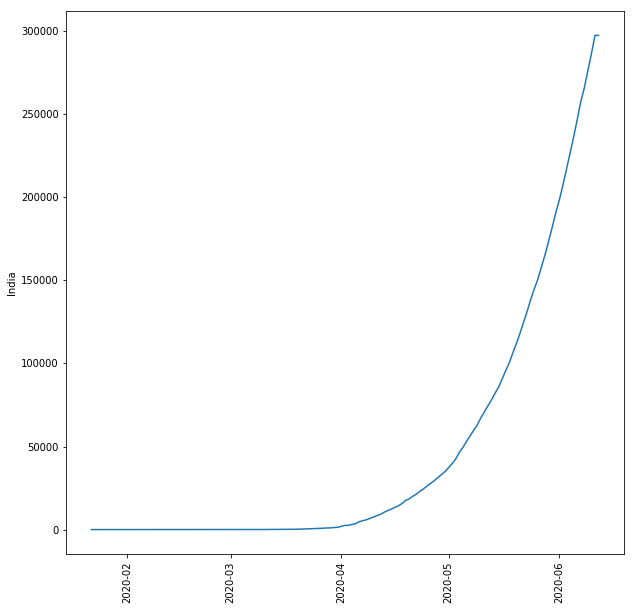

In [154]:
sns.lineplot(x=df_trans.index, y=df_trans['India'])
plt.xticks(rotation=90)
plt.show()

In [155]:
df_trans[['India','US']]

Country/Region   India       US
2020-01-22           0        1
2020-01-23           0        1
2020-01-24           0        2
2020-01-25           0        2
2020-01-26           0        5
2020-01-27           0        5
2020-01-28           0        5
2020-01-29           0        5
2020-01-30           1        5
2020-01-31           1        7
2020-02-01           1        8
2020-02-02           2        8
2020-02-03           3       11
2020-02-04           3       11
2020-02-05           3       11
2020-02-06           3       11
2020-02-07           3       11
2020-02-08           3       11
2020-02-09           3       11
2020-02-10           3       11
2020-02-11           3       12
2020-02-12           3       12
2020-02-13           3       13
2020-02-14           3       13
2020-02-15           3       13
2020-02-16           3       13
2020-02-17           3       13
2020-02-18           3       13
2020-02-19           3       13
2020-02-20           3       13
2020-02-21           3       15
2020-02-22           3       15
2020-02-23           3       15
2020-02-24           3       15
2020-02-25           3       15
2020-02-26           3       15
2020-02-27           3       16
2020-02-28           3       16
2020-02-29           3       24
2020-03-01           3       30
2020-03-02           5       53
2020-03-03           5       73
2020-03-04          28      104
2020-03-05          30      174
2020-03-06          31      222
2020-03-07          34      337
2020-03-08          39      451
2020-03-09          43      519
2020-03-10          56      711
2020-03-11          62     1109
2020-03-12          73     1560
2020-03-13          82     2149
2020-03-14         102     2859
2020-03-15         113     2955
2020-03-16         119     4338
2020-03-17         142     6114
2020-03-18         156     8874
2020-03-19         194    14098
2020-03-20         244    19410
2020-03-21         330    25733
2020-03-22         396    33660
2020-03-23         499    43720
2020-03-24         536    53959
2020-03-25         657    65872
2020-03-26         727    83893
2020-03-27         887   102040
2020-03-28         987   121814
2020-03-29        1024   140929
2020-03-30        1251   162385
2020-03-31        1397   188365
2020-04-01        1998   213792
2020-04-02        2543   244154
2020-04-03        2567   276058
2020-04-04        3082   309189
2020-04-05        3588   337023
2020-04-06        4778   366611
2020-04-07        5311   397318
2020-04-08        5916   428956
2020-04-09        6725   463649
2020-04-10        7598   497098
2020-04-11        8446   527063
2020-04-12        9205   555578
2020-04-13       10453   580823
2020-04-14       11487   607804
2020-04-15       12322   636889
2020-04-16       13430   668115
2020-04-17       14352   700794
2020-04-18       15722   729077
2020-04-19       17615   755111
2020-04-20       18539   782392
2020-04-21       20080   807832
2020-04-22       21370   835976
2020-04-23       23077   870068
2020-04-24       24530   906244
2020-04-25       26283   939114
2020-04-26       27890   966755
2020-04-27       29451   989169
2020-04-28       31324  1013614
2020-04-29       33062  1040946
2020-04-30       34863  1070568
2020-05-01       37257  1104661
2020-05-02       39699  1133807
2020-05-03       42505  1159365
2020-05-04       46437  1181728
2020-05-05       49400  1205808
2020-05-06       52987  1230968
2020-05-07       56351  1258742
2020-05-08       59695  1285782
2020-05-09       62808  1311445
2020-05-10       67161  1331180
2020-05-11       70768  1349883
2020-05-12       74292  1371672
2020-05-13       78055  1392681
2020-05-14       81997  1420141
2020-05-15       85784  1445295
2020-05-16       90648  1470350
2020-05-17       95698  1489310
2020-05-18      100328  1510899
2020-05-19      106475  1531222
2020-05-20      112028  1554636
2020-05-21      118226  1580008
2020-05-22      124794  1603993
2020-05-23      131423  1625769
2020-05-24      138536  1646523


In [156]:
df_trans.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Australia',
       ...
       'Malawi', 'United Kingdom', 'France', 'South Sudan', 'Western Sahara', 'Sao Tome and Principe', 'Yemen', 'Comoros', 'Tajikistan', 'Lesotho'], dtype='object', name='Country/Region', length=266)

In [157]:
df_uk = df_trans['United Kingdom']

In [158]:
df_uk.tail()

Country/Region  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom
2020-06-08                 141             171             564             176             336              11          287399               3               8              12              13
2020-06-09                 141             176             565             176             336              11          289140               3               8              12              13
2020-06-10                 141             180             565             176             336              11          290143               3               8              12              13
2020-06-11                 141             186             565             176             336              11          291409               3               8              12              13
2020-06-12                 141             187             565             176             336              11          292950               3               8              12              13

In [159]:
flag = [False, False, False, False, False, False, True, False, False, False, False, False]

In [160]:
df_uk.loc[:, flag]

Country/Region  United Kingdom
2020-01-22                   0
2020-01-23                   0
2020-01-24                   0
2020-01-25                   0
2020-01-26                   0
2020-01-27                   0
2020-01-28                   0
2020-01-29                   0
2020-01-30                   0
2020-01-31                   2
2020-02-01                   2
2020-02-02                   2
2020-02-03                   2
2020-02-04                   2
2020-02-05                   2
2020-02-06                   2
2020-02-07                   3
2020-02-08                   3
2020-02-09                   3
2020-02-10                   8
2020-02-11                   8
2020-02-12                   9
2020-02-13                   9
2020-02-14                   9
2020-02-15                   9
2020-02-16                   9
2020-02-17                   9
2020-02-18                   9
2020-02-19                   9
2020-02-20                   9
2020-02-21                   9
2020-02-22                   9
2020-02-23                   9
2020-02-24                  13
2020-02-25                  13
2020-02-26                  13
2020-02-27                  15
2020-02-28                  20
2020-02-29                  23
2020-03-01                  36
2020-03-02                  40
2020-03-03                  51
2020-03-04                  85
2020-03-05                 115
2020-03-06                 163
2020-03-07                 206
2020-03-08                 273
2020-03-09                 321
2020-03-10                 382
2020-03-11                 456
2020-03-12                 456
2020-03-13                 798
2020-03-14                1140
2020-03-15                1140
2020-03-16                1543
2020-03-17                1950
2020-03-18                2626
2020-03-19                2689
2020-03-20                3983
2020-03-21                5018
2020-03-22                5683
2020-03-23                6650
2020-03-24                8077
2020-03-25                9529
2020-03-26               11658
2020-03-27               14543
2020-03-28               17089
2020-03-29               19522
2020-03-30               22141
2020-03-31               25150
2020-04-01               29474
2020-04-02               33718
2020-04-03               38168
2020-04-04               41903
2020-04-05               47806
2020-04-06               51608
2020-04-07               55242
2020-04-08               60733
2020-04-09               65077
2020-04-10               73758
2020-04-11               78991
2020-04-12               84279
2020-04-13               88621
2020-04-14               93873
2020-04-15               98476
2020-04-16              103093
2020-04-17              108692
2020-04-18              114217
2020-04-19              120067
2020-04-20              124743
2020-04-21              129044
2020-04-22              133495
2020-04-23              138078
2020-04-24              143464
2020-04-25              148377
2020-04-26              152840
2020-04-27              157149
2020-04-28              161145
2020-04-29              165221
2020-04-30              171253
2020-05-01              177454
2020-05-02              182260
2020-05-03              186599
2020-05-04              190584
2020-05-05              194990
2020-05-06              201101
2020-05-07              206715
2020-05-08              211364
2020-05-09              215260
2020-05-10              219183
2020-05-11              223060
2020-05-12              226463
2020-05-13              229705
2020-05-14              233151
2020-05-15              236711
2020-05-16              240161
2020-05-17              243695
2020-05-18              246406
2020-05-19              248818
2020-05-20              248293
2020-05-21              250908
2020-05-22              254195
2020-05-23              257154
2020-05-24              259559
2020-05-25              261184
2020-05-26              265227
2020-05-27              267240
2020-05-28              269127
2

In [161]:
df_trans['UK'] = df_uk.loc[:, flag]

In [162]:
df_trans['UK']

2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
2020-01-27         0
2020-01-28         0
2020-01-29         0
2020-01-30         0
2020-01-31         2
2020-02-01         2
2020-02-02         2
2020-02-03         2
2020-02-04         2
2020-02-05         2
2020-02-06         2
2020-02-07         3
2020-02-08         3
2020-02-09         3
2020-02-10         8
2020-02-11         8
2020-02-12         9
2020-02-13         9
2020-02-14         9
2020-02-15         9
2020-02-16         9
2020-02-17         9
2020-02-18         9
2020-02-19         9
2020-02-20         9
2020-02-21         9
2020-02-22         9
2020-02-23         9
2020-02-24        13
2020-02-25        13
2020-02-26        13
2020-02-27        15
2020-02-28        20
2020-02-29        23
2020-03-01        36
2020-03-02        40
2020-03-03        51
2020-03-04        85
2020-03-05       115
2020-03-06       163
2020-03-07       206
2020-03-08       273
2020-03-09   

In [163]:
df_netherlands = df_trans['Netherlands']

In [164]:
df_netherlands.columns

Index(['Netherlands', 'Netherlands', 'Netherlands', 'Netherlands', 'Netherlands'], dtype='object', name='Country/Region')

In [165]:
df_netherlands.tail()

Country/Region  Netherlands  Netherlands  Netherlands  Netherlands  Netherlands
2020-06-08              101           21           77        47739            7
2020-06-09              101           21           77        47903            7
2020-06-10              101           22           77        48087            7
2020-06-11              101           22           77        48251            7
2020-06-12              101           22           77        48461            7

In [166]:
flag = [False, False, False, True]

In [167]:
df_netherlands.loc[:, flag]

Country/Region  Netherlands
2020-01-22                0
2020-01-23                0
2020-01-24                0
2020-01-25                0
2020-01-26                0
2020-01-27                0
2020-01-28                0
2020-01-29                0
2020-01-30                0
2020-01-31                0
2020-02-01                0
2020-02-02                0
2020-02-03                0
2020-02-04                0
2020-02-05                0
2020-02-06                0
2020-02-07                0
2020-02-08                0
2020-02-09                0
2020-02-10                0
2020-02-11                0
2020-02-12                0
2020-02-13                0
2020-02-14                0
2020-02-15                0
2020-02-16                0
2020-02-17                0
2020-02-18                0
2020-02-19                0
2020-02-20                0
2020-02-21                0
2020-02-22                0
2020-02-23                0
2020-02-24                0
2020-02-25                0
2020-02-26                0
2020-02-27                1
2020-02-28                1
2020-02-29                6
2020-03-01               10
2020-03-02               18
2020-03-03               24
2020-03-04               38
2020-03-05               82
2020-03-06              128
2020-03-07              188
2020-03-08              265
2020-03-09              321
2020-03-10              382
2020-03-11              503
2020-03-12              503
2020-03-13              804
2020-03-14              959
2020-03-15             1135
2020-03-16             1413
2020-03-17             1705
2020-03-18             2051
2020-03-19             2460
2020-03-20             2994
2020-03-21             3631
2020-03-22             4204
2020-03-23             4749
2020-03-24             5560
2020-03-25             6412
2020-03-26             7431
2020-03-27             8603
2020-03-28             9762
2020-03-29            10866
2020-03-30            11750
2020-03-31            12595
2020-04-01            13614
2020-04-02            14697
2020-04-03            15723
2020-04-04            16627
2020-04-05            17851
2020-04-06            18803
2020-04-07            19580
2020-04-08            20549
2020-04-09            21762
2020-04-10            23097
2020-04-11            24413
2020-04-12            25587
2020-04-13            26551
2020-04-14            27419
2020-04-15            28153
2020-04-16            29214
2020-04-17            30449
2020-04-18            31589
2020-04-19            32655
2020-04-20            33405
2020-04-21            34134
2020-04-22            34842
2020-04-23            35729
2020-04-24            36535
2020-04-25            37190
2020-04-26            37845
2020-04-27            38245
2020-04-28            38416
2020-04-29            38802
2020-04-30            39316
2020-05-01            39791
2020-05-02            40236
2020-05-03            40571
2020-05-04            40770
2020-05-05            41087
2020-05-06            41319
2020-05-07            41774
2020-05-08            42093
2020-05-09            42382
2020-05-10            42627
2020-05-11            42788
2020-05-12            42984
2020-05-13            43211
2020-05-14            43481
2020-05-15            43681
2020-05-16            43870
2020-05-17            43995
2020-05-18            44141
2020-05-19            44249
2020-05-20            44447
2020-05-21            44700
2020-05-22            44888
2020-05-23            45064
2020-05-24            45236
2020-05-25            45445
2020-05-26            45578
2020-05-27            45768
2020-05-28            45950
2020-05-29            46126
2020-05-30            46257
2020-05-31            46442
2020-06-01            46545
2020-06-02            46647
2020-06-03            46733
2020-06-04            46942
2020-06-05            47152
2020-06-06            47335
2020-06-07            47574
2020-06-08            47739
2020-06-09            47903
2020-06-10            48087
2020-06-11            48

In [168]:
df_trans['Holland'] = df_netherlands.loc[:, flag]

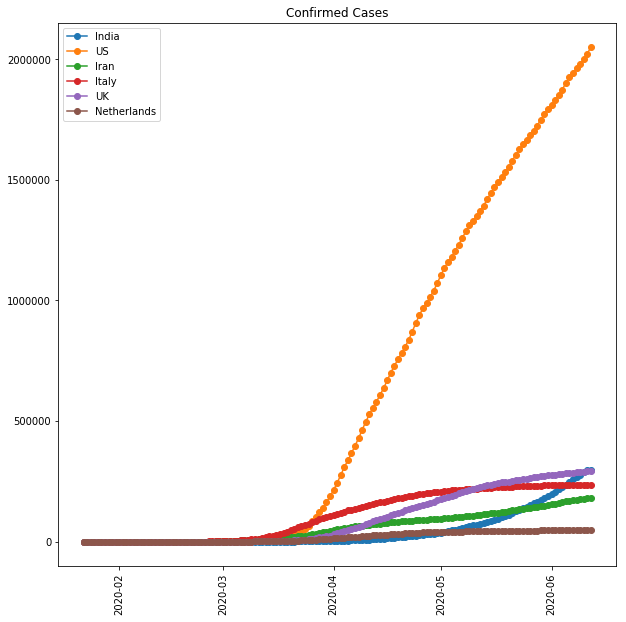

In [169]:
plt.plot_date(x=df_trans.index, y=df_trans['India'], label='India', linestyle='solid')
plt.plot_date(x=df_trans.index, y=df_trans['US'], label='US', linestyle='solid')
plt.plot_date(x=df_trans.index, y=df_trans['Iran'], label='Iran', linestyle='solid')
plt.plot_date(x=df_trans.index, y=df_trans['Italy'], label='Italy', linestyle='solid')
plt.plot_date(x=df_trans.index, y=df_trans['UK'], label='UK', linestyle='solid')
plt.plot_date(x=df_trans.index, y=df_trans['Holland'], label='Netherlands', linestyle='solid')
plt.xticks(rotation=90)
plt.title('Confirmed Cases')
plt.legend()
plt.show()

### Global Deaths

In [170]:
columns = []
with open('/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    columns = next(spamreader) 
    l = [i for i in spamreader]

In [171]:
columns

['Province/State',
 'Country/Region',
 'Lat',
 'Long',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',


In [172]:
df_global_deaths = pd.DataFrame(l, columns=columns)

In [173]:
df_global_deaths.head()

Province/State Country/Region       Lat     Long 1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20 1/28/20 1/29/20 1/30/20 1/31/20 2/1/20 2/2/20 2/3/20 2/4/20 2/5/20 2/6/20 2/7/20 2/8/20 2/9/20 2/10/20 2/11/20 2/12/20 2/13/20 2/14/20 2/15/20 2/16/20 2/17/20 2/18/20 2/19/20 2/20/20 2/21/20 2/22/20 2/23/20 2/24/20 2/25/20 2/26/20 2/27/20 2/28/20 2/29/20 3/1/20 3/2/20 3/3/20 3/4/20 3/5/20 3/6/20 3/7/20 3/8/20 3/9/20 3/10/20 3/11/20 3/12/20 3/13/20 3/14/20 3/15/20 3/16/20 3/17/20 3/18/20 3/19/20 3/20/20 3/21/20 3/22/20 3/23/20 3/24/20 3/25/20 3/26/20 3/27/20 3/28/20 3/29/20 3/30/20 3/31/20 4/1/20 4/2/20 4/3/20 4/4/20 4/5/20 4/6/20 4/7/20 4/8/20 4/9/20 4/10/20 4/11/20 4/12/20 4/13/20 4/14/20 4/15/20 4/16/20 4/17/20 4/18/20 4/19/20 4/20/20 4/21/20 4/22/20 4/23/20 4/24/20 4/25/20 4/26/20 4/27/20 4/28/20 4/29/20 4/30/20 5/1/20 5/2/20 5/3/20 5/4/20 5/5/20 5/6/20 5/7/20 5/8/20 5/9/20 5/10/20 5/11/20 5/12/20 5/13/20 5/14/20 5/15/20 5/16/20 5/17/20 5/18/20 5/19/20 5/20/20 5/21/20 5/22/20  \
0                   Afghanistan      33.0     65.0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       1       1       1       2       4       4       4       4       4       4      4      6      6      7      7     11     14     14     15      15      18      18      21      23      25      30      30      30      33      36      36      40      42      43      47      50      57      58      60      64     68     72     85     90     95    104    106    109    115     120     122     127     132     136     153     168     169     173     178     187     193     205   
1                       Albania   41.1533  20.1683       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       1       1       1       1       1       1       1       2       2       2       2       2       4       5       5       6       8      10      10      11      15     15     16     17     20     20     21     22     22     23      23      23      23      23      24      25      26      26      26      26      26      26      27      27      27      27      28      28      30      30      31     31     31     31     31     31     31     31     31     31      31      31      31      31      31      31      31      31      31      31      31      31      31   
2                       Algeria   28.0339   1.6596       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       1       2       3       4       4       4       7       9      11      15      17      17      19      21      25      26      29      31      35      44     58     86    105    130    152    173    193    205    235     256     275     293     313     326     336     348     364     367     375     384     392     402     407     415     419     425     432     437     444     450    453    459    463    465    470    476    483    488    494     502     507     515     522     529     536     542     548     555     561     568     575     582   
3                       An

In [174]:
df_global_deaths_min = df_global_deaths.drop(columns=['Province/State', 'Lat', 'Long'])

In [175]:
df_global_deaths_min.columns

Index(['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       ...
       '6/3/20', '6/4/20', '6/5/20', '6/6/20', '6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20', '6/12/20'], dtype='object', length=144)

In [176]:
list_of_columns = [col for col in df_global_confirmed_min.columns if 'Country' not in col]

In [177]:
df_global_deaths_min.columns[1:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/3/20', '6/4/20', '6/5/20', '6/6/20', '6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20', '6/12/20'], dtype='object', length=143)

In [178]:
df_trans_deaths = df_global_deaths_min.transpose()

In [179]:
df_trans_deaths.head()

0        1        2        3       4                    5          6        7          8          9          10         11         12         13         14         15       16          17       18       19          20        21       22       23     24      25       26                      27      28      29        30            31          32        33        34      35      36      37      38      39      40      41      42      43      44      45                        46    47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81        82                   83                84          85             86       87                88    89      90       91       92       93       94        95                  96       97     98           99                 100      101      102  \
Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  Argentina  Armenia  Australia  Australia  Australia  Australia  Australia  Australia  Australia  Australia  Austria  Azerbaijan  Bahamas  Bahrain  Bangladesh  Barbados  Belarus  Belgium  Benin  Bhutan  Bolivia  Bosnia and Herzegovina  Brazil  Brunei  Bulgaria  Burkina Faso  Cabo Verde  Cambodia  Cameroon  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Central African Republic  Chad  Chile  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  Colombia  Congo (Brazzaville)  Congo (Kinshasa)  Costa Rica  Cote d'Ivoire  Croatia  Diamond Princess  Cuba  Cyprus  Czechia  Denmark  Denmark  Denmark  Djibouti  Dominican Republic  Ecuador  Egypt  El Salvador  Equatorial Guinea  Eritrea  Estonia   
1/22/20                   0        0        0        0       0                    0          0        0          0          0          0          0          0          0          0          0        0           0        0        0           0         0        0        0      0       0        0                       0       0       0         0             0           0         0         0       0       0       0       0       0       0       0       0       0       0       0                         0     0      0      0      0      0      0      0      0      0      0      0      0      0      0      0     17      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0         0                    0                 0           0              0        0                 0     0       0        0        0        0        0         0                   0        0      0            0                  0        0        0   
1/23/20                   0        0        0        0       0                    0          0        0          0          0          0          0          0          0          0          0        0           0        0        0           0         0        0        0      0       0        0                       0       0       0         0             0           0         0         0       0       0       0       0       0       0       0       0       0       0       0                         0     0      0      0      0      0      0      0      0      0      0      0      1      0      0      0     17      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0         0                    0                 0           0              0        0                 0     0       0        0        0        0        0         0                   0        0      0            0                  0        0        0   
1/24/20             

In [180]:
df_trans_deaths.iloc[0, :]

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                                Benin


In [181]:
df_trans_deaths.columns = df_trans_deaths.iloc[0, :]

In [182]:
df_trans_deaths = df_trans_deaths.iloc[1:, :]

In [183]:
df_trans_deaths.head()

Country/Region Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda Argentina Armenia Australia Australia Australia Australia Australia Australia Australia Australia Austria Azerbaijan Bahamas Bahrain Bangladesh Barbados Belarus Belgium Benin Bhutan Bolivia Bosnia and Herzegovina Brazil Brunei Bulgaria Burkina Faso Cabo Verde Cambodia Cameroon Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Central African Republic Chad Chile China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China Colombia Congo (Brazzaville) Congo (Kinshasa) Costa Rica Cote d'Ivoire Croatia Diamond Princess Cuba Cyprus Czechia Denmark Denmark Denmark Djibouti Dominican Republic Ecuador Egypt El Salvador Equatorial Guinea Eritrea Estonia Eswatini Ethiopia Fiji Finland France France France France France France France France France France  \
1/22/20                  0       0       0       0      0                   0         0       0         0         0         0         0         0         0         0         0       0          0       0       0          0        0       0       0     0      0       0                      0      0      0        0            0          0        0        0      0      0      0      0      0      0      0      0      0      0      0                        0    0     0     0     0     0     0     0     0     0     0     0     0     0     0     0    17     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0        0                   0                0          0             0       0                0    0      0       0       0       0       0        0                  0       0     0           0                 0       0       0        0        0    0       0      0      0      0      0      0      0      0      0      0      0   
1/23/20                  0       0       0       0      0                   0         0       0         0         0         0         0         0         0         0         0       0          0       0       0          0        0       0       0     0      0       0                      0      0      0        0            0          0        0        0      0      0      0      0      0      0      0      0      0      0      0                        0    0     0     0     0     0     0     0     0     0     0     0     1     0     0     0    17     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0        0                   0                0          0             0       0                0    0      0       0       0       0       0        0                  0       0     0           0                 0       0       0        0        0    0       0      0      0      0      0      0      0      0      0      0      0   
1/24/20                  0       0       0       0      0                   0         0       0         0         0         0         0         0         0         0         0       0          0       0       0          0        0       0       0     0      0       0                      0      0      0        0            0          0        0        0      0      0      0      0      0      0      0      0      0      0      0                        0    0     0     0     0     0     0     0     0     0     0     0     1     1     0     0    24     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0        0                   0                0          0             0       0                0    0      0       0       0       0       0        0                  0       0     0           0                 0       0       0        0        0    0       0      0      0      0      0      0      0      0      0      0      0   
1/25

In [184]:
df_trans_deaths = df_trans_deaths.astype(np.int)
df_trans_deaths.index = pd.to_datetime(df_trans_deaths.index)

In [185]:
df_trans.dtypes

Country/Region
Afghanistan                         int64
Albania                             int64
Algeria                             int64
Andorra                             int64
Angola                              int64
Antigua and Barbuda                 int64
Argentina                           int64
Armenia                             int64
Australia                           int64
Australia                           int64
Australia                           int64
Australia                           int64
Australia                           int64
Australia                           int64
Australia                           int64
Australia                           int64
Austria                             int64
Azerbaijan                          int64
Bahamas                             int64
Bahrain                             int64
Bangladesh                          int64
Barbados                            int64
Belarus                             int64
Belgium            

In [186]:
df_trans_deaths.head()

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  Argentina  Armenia  Australia  Australia  Australia  Australia  Australia  Australia  Australia  Australia  Austria  Azerbaijan  Bahamas  Bahrain  Bangladesh  Barbados  Belarus  Belgium  Benin  Bhutan  Bolivia  Bosnia and Herzegovina  Brazil  Brunei  Bulgaria  Burkina Faso  Cabo Verde  Cambodia  Cameroon  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Canada  Central African Republic  Chad  Chile  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  Colombia  Congo (Brazzaville)  Congo (Kinshasa)  Costa Rica  Cote d'Ivoire  Croatia  Diamond Princess  Cuba  Cyprus  Czechia  Denmark  Denmark  Denmark  Djibouti  Dominican Republic  Ecuador  Egypt  El Salvador  Equatorial Guinea  Eritrea  Estonia  \
2020-01-22                0        0        0        0       0                    0          0        0          0          0          0          0          0          0          0          0        0           0        0        0           0         0        0        0      0       0        0                       0       0       0         0             0           0         0         0       0       0       0       0       0       0       0       0       0       0       0                         0     0      0      0      0      0      0      0      0      0      0      0      0      0      0      0     17      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0         0                    0                 0           0              0        0                 0     0       0        0        0        0        0         0                   0        0      0            0                  0        0        0   
2020-01-23                0        0        0        0       0                    0          0        0          0          0          0          0          0          0          0          0        0           0        0        0           0         0        0        0      0       0        0                       0       0       0         0             0           0         0         0       0       0       0       0       0       0       0       0       0       0       0                         0     0      0      0      0      0      0      0      0      0      0      0      1      0      0      0     17      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0         0                    0                 0           0              0        0                 0     0       0        0        0        0        0         0                   0        0      0            0                  0        0        0   
2020-01-24                0        0        0        0       0                    0          0        0          0          0          0          0          0          0          0          0        0           0        0        0           0         0        0        0      0       0        0                       0       0       0         0             0           0         0         0       0       0       0       0       0       0       0       0       0       0       0                         0     0      0      0      0      0      0      0      0      0      0      0      1      1      0      0     24      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0         0                    0                 0           0              0        0                 0     0       0        0        0        0        0         0                   0        0      0            0                  0        0        0

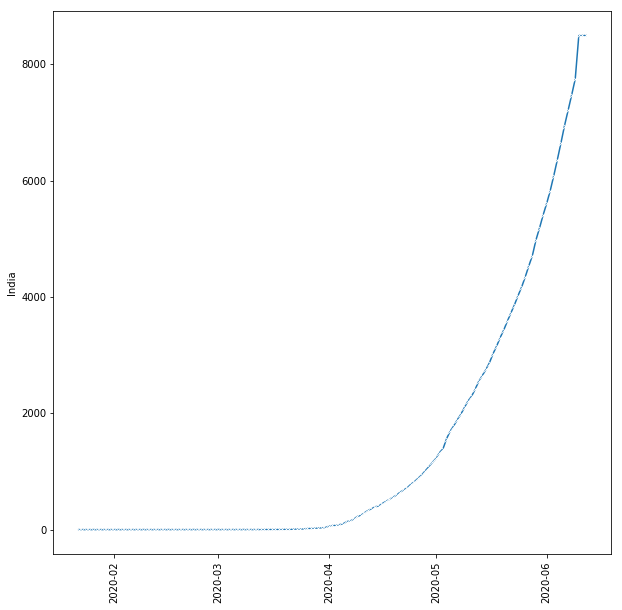

In [187]:
sns.lineplot(x=df_trans_deaths.index, y=df_trans_deaths['India'], linestyle='-', marker='x')
plt.xticks(rotation=90)
plt.show()

In [188]:
df_trans_deaths[['India','US']]

Country/Region  India      US
2020-01-22          0       0
2020-01-23          0       0
2020-01-24          0       0
2020-01-25          0       0
2020-01-26          0       0
2020-01-27          0       0
2020-01-28          0       0
2020-01-29          0       0
2020-01-30          0       0
2020-01-31          0       0
2020-02-01          0       0
2020-02-02          0       0
2020-02-03          0       0
2020-02-04          0       0
2020-02-05          0       0
2020-02-06          0       0
2020-02-07          0       0
2020-02-08          0       0
2020-02-09          0       0
2020-02-10          0       0
2020-02-11          0       0
2020-02-12          0       0
2020-02-13          0       0
2020-02-14          0       0
2020-02-15          0       0
2020-02-16          0       0
2020-02-17          0       0
2020-02-18          0       0
2020-02-19          0       0
2020-02-20          0       0
2020-02-21          0       0
2020-02-22          0       0
2020-02-23          0       0
2020-02-24          0       0
2020-02-25          0       0
2020-02-26          0       0
2020-02-27          0       0
2020-02-28          0       0
2020-02-29          0       1
2020-03-01          0       1
2020-03-02          0       6
2020-03-03          0       7
2020-03-04          0      11
2020-03-05          0      12
2020-03-06          0      14
2020-03-07          0      17
2020-03-08          0      21
2020-03-09          0      22
2020-03-10          0      28
2020-03-11          1      32
2020-03-12          1      42
2020-03-13          2      51
2020-03-14          2      58
2020-03-15          2      71
2020-03-16          2      99
2020-03-17          3     133
2020-03-18          3     190
2020-03-19          4     268
2020-03-20          5     364
2020-03-21          4     453
2020-03-22          7     597
2020-03-23         10     781
2020-03-24         10    1012
2020-03-25         12    1321
2020-03-26         20    1726
2020-03-27         20    2269
2020-03-28         24    2902
2020-03-29         27    3521
2020-03-30         32    4323
2020-03-31         35    5535
2020-04-01         58    6752
2020-04-02         72    8313
2020-04-03         72    9607
2020-04-04         86   10867
2020-04-05         99   12265
2020-04-06        136   13919
2020-04-07        150   16218
2020-04-08        178   18291
2020-04-09        226   20327
2020-04-10        246   22391
2020-04-11        288   24395
2020-04-12        331   26125
2020-04-13        358   27914
2020-04-14        393   30298
2020-04-15        405   32809
2020-04-16        448   34891
2020-04-17        486   37473
2020-04-18        521   39814
2020-04-19        559   40988
2020-04-20        592   42749
2020-04-21        645   45143
2020-04-22        681   47475
2020-04-23        721   49789
2020-04-24        780   51564
2020-04-25        825   53831
2020-04-26        881   54972
2020-04-27        939   56311
2020-04-28       1008   58434
2020-04-29       1079   61053
2020-04-30       1154   63089
2020-05-01       1223   65040
2020-05-02       1323   66465
2020-05-03       1391   67785
2020-05-04       1566   69031
2020-05-05       1693   71179
2020-05-06       1785   73566
2020-05-07       1889   75775
2020-05-08       1985   77280
2020-05-09       2101   78895
2020-05-10       2212   79628
2020-05-11       2294   80790
2020-05-12       2415   82479
2020-05-13       2551   84221
2020-05-14       2649   85997
2020-05-15       2753   87629
2020-05-16       2871   88851
2020-05-17       3025   89660
2020-05-18       3156   90450
2020-05-19       3302   92019
2020-05-20       3434   93539
2020-05-21       3584   94783
2020-05-22       3726   96059
2020-05-23       3868   97169
2020-05-24       4024   97801
2020-05-25       4172   98303
2020-05-26       4344   98999
2020-05-27       4534  100504
2020-05-28       4711  101697
2020-05-29       4980  102873
2020-05-30       5185  103814
2020-05-31       5408  104419
2020-06-01       5608  105188
2020-06-02

In [189]:
df_trans_deaths.columns[df_trans_deaths.columns == 'Netherlands']

Index(['Netherlands', 'Netherlands', 'Netherlands', 'Netherlands', 'Netherlands'], dtype='object', name='Country/Region')

In [190]:
df_uk = df_trans_deaths['United Kingdom']

In [191]:
df_uk.tail()

Country/Region  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom
2020-06-08                   9               1              46               0              24               1           40597               0               1               1               0
2020-06-09                   9               1              48               0              24               1           40883               0               1               1               0
2020-06-10                   9               1              48               0              24               1           41128               0               1               1               0
2020-06-11                   9               1              48               0              24               1           41279               0               1               1               0
2020-06-12                   9               1              48               0              24               1           41481               0               1               1               0

In [192]:
flag = [False, False, False, False, False, False, True, False, False, False, False, False]

In [193]:
df_uk.loc[:, flag]

Country/Region  United Kingdom
2020-01-22                   0
2020-01-23                   0
2020-01-24                   0
2020-01-25                   0
2020-01-26                   0
2020-01-27                   0
2020-01-28                   0
2020-01-29                   0
2020-01-30                   0
2020-01-31                   0
2020-02-01                   0
2020-02-02                   0
2020-02-03                   0
2020-02-04                   0
2020-02-05                   0
2020-02-06                   0
2020-02-07                   0
2020-02-08                   0
2020-02-09                   0
2020-02-10                   0
2020-02-11                   0
2020-02-12                   0
2020-02-13                   0
2020-02-14                   0
2020-02-15                   0
2020-02-16                   0
2020-02-17                   0
2020-02-18                   0
2020-02-19                   0
2020-02-20                   0
2020-02-21                   0
2020-02-22                   0
2020-02-23                   0
2020-02-24                   0
2020-02-25                   0
2020-02-26                   0
2020-02-27                   0
2020-02-28                   0
2020-02-29                   0
2020-03-01                   0
2020-03-02                   0
2020-03-03                   0
2020-03-04                   0
2020-03-05                   0
2020-03-06                   1
2020-03-07                   2
2020-03-08                   2
2020-03-09                   3
2020-03-10                   7
2020-03-11                   7
2020-03-12                   9
2020-03-13                  10
2020-03-14                  28
2020-03-15                  43
2020-03-16                  65
2020-03-17                  81
2020-03-18                 115
2020-03-19                 158
2020-03-20                 194
2020-03-21                 250
2020-03-22                 285
2020-03-23                 359
2020-03-24                 508
2020-03-25                 694
2020-03-26                 877
2020-03-27                1161
2020-03-28                1455
2020-03-29                1669
2020-03-30                2043
2020-03-31                2425
2020-04-01                3095
2020-04-02                3747
2020-04-03                4461
2020-04-04                5221
2020-04-05                5865
2020-04-06                6433
2020-04-07                7471
2020-04-08                8505
2020-04-09                9608
2020-04-10               10760
2020-04-11               11599
2020-04-12               12285
2020-04-13               13029
2020-04-14               14073
2020-04-15               14915
2020-04-16               15944
2020-04-17               16879
2020-04-18               17994
2020-04-19               18492
2020-04-20               19051
2020-04-21               20223
2020-04-22               21060
2020-04-23               21787
2020-04-24               22792
2020-04-25               23635
2020-04-26               24055
2020-04-27               24393
2020-04-28               25302
2020-04-29               26097
2020-04-30               26771
2020-05-01               27510
2020-05-02               28131
2020-05-03               28446
2020-05-04               28734
2020-05-05               29427
2020-05-06               30076
2020-05-07               30615
2020-05-08               31241
2020-05-09               31587
2020-05-10               31855
2020-05-11               32065
2020-05-12               32692
2020-05-13               33186
2020-05-14               33614
2020-05-15               33998
2020-05-16               34466
2020-05-17               34636
2020-05-18               34796
2020-05-19               35341
2020-05-20               35704
2020-05-21               36042
2020-05-22               36393
2020-05-23               36675
2020-05-24               36793
2020-05-25               36914
2020-05-26               37048
2020-05-27               37460
2020-05-28               37837
2

In [194]:
df_trans_deaths['UK'] = df_uk.loc[:, flag]

In [195]:
df_trans_deaths['UK']

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
2020-01-27        0
2020-01-28        0
2020-01-29        0
2020-01-30        0
2020-01-31        0
2020-02-01        0
2020-02-02        0
2020-02-03        0
2020-02-04        0
2020-02-05        0
2020-02-06        0
2020-02-07        0
2020-02-08        0
2020-02-09        0
2020-02-10        0
2020-02-11        0
2020-02-12        0
2020-02-13        0
2020-02-14        0
2020-02-15        0
2020-02-16        0
2020-02-17        0
2020-02-18        0
2020-02-19        0
2020-02-20        0
2020-02-21        0
2020-02-22        0
2020-02-23        0
2020-02-24        0
2020-02-25        0
2020-02-26        0
2020-02-27        0
2020-02-28        0
2020-02-29        0
2020-03-01        0
2020-03-02        0
2020-03-03        0
2020-03-04        0
2020-03-05        0
2020-03-06        1
2020-03-07        2
2020-03-08        2
2020-03-09        3
2020-03-10        7
2020-03-11        7


In [196]:
df_netherlands = df_trans_deaths['Netherlands']

In [197]:
df_netherlands.columns

Index(['Netherlands', 'Netherlands', 'Netherlands', 'Netherlands', 'Netherlands'], dtype='object', name='Country/Region')

In [198]:
df_netherlands.tail()

Country/Region  Netherlands  Netherlands  Netherlands  Netherlands  Netherlands
2020-06-08                3            1           15         6016            0
2020-06-09                3            1           15         6031            0
2020-06-10                3            1           15         6042            0
2020-06-11                3            1           15         6044            0
2020-06-12                3            1           15         6053            0

In [199]:
flag = [False, False, False, True]

In [200]:
df_netherlands.loc[:, flag]

Country/Region  Netherlands
2020-01-22                0
2020-01-23                0
2020-01-24                0
2020-01-25                0
2020-01-26                0
2020-01-27                0
2020-01-28                0
2020-01-29                0
2020-01-30                0
2020-01-31                0
2020-02-01                0
2020-02-02                0
2020-02-03                0
2020-02-04                0
2020-02-05                0
2020-02-06                0
2020-02-07                0
2020-02-08                0
2020-02-09                0
2020-02-10                0
2020-02-11                0
2020-02-12                0
2020-02-13                0
2020-02-14                0
2020-02-15                0
2020-02-16                0
2020-02-17                0
2020-02-18                0
2020-02-19                0
2020-02-20                0
2020-02-21                0
2020-02-22                0
2020-02-23                0
2020-02-24                0
2020-02-25                0
2020-02-26                0
2020-02-27                0
2020-02-28                0
2020-02-29                0
2020-03-01                0
2020-03-02                0
2020-03-03                0
2020-03-04                0
2020-03-05                0
2020-03-06                1
2020-03-07                1
2020-03-08                3
2020-03-09                3
2020-03-10                4
2020-03-11                5
2020-03-12                5
2020-03-13               10
2020-03-14               12
2020-03-15               20
2020-03-16               24
2020-03-17               43
2020-03-18               58
2020-03-19               76
2020-03-20              106
2020-03-21              136
2020-03-22              179
2020-03-23              213
2020-03-24              276
2020-03-25              356
2020-03-26              434
2020-03-27              546
2020-03-28              639
2020-03-29              771
2020-03-30              864
2020-03-31             1039
2020-04-01             1173
2020-04-02             1339
2020-04-03             1487
2020-04-04             1651
2020-04-05             1766
2020-04-06             1867
2020-04-07             2101
2020-04-08             2248
2020-04-09             2396
2020-04-10             2511
2020-04-11             2643
2020-04-12             2737
2020-04-13             2823
2020-04-14             2945
2020-04-15             3134
2020-04-16             3315
2020-04-17             3459
2020-04-18             3601
2020-04-19             3684
2020-04-20             3751
2020-04-21             3916
2020-04-22             4054
2020-04-23             4177
2020-04-24             4289
2020-04-25             4409
2020-04-26             4475
2020-04-27             4518
2020-04-28             4566
2020-04-29             4711
2020-04-30             4795
2020-05-01             4893
2020-05-02             4987
2020-05-03             5056
2020-05-04             5082
2020-05-05             5168
2020-05-06             5204
2020-05-07             5288
2020-05-08             5359
2020-05-09             5422
2020-05-10             5440
2020-05-11             5456
2020-05-12             5510
2020-05-13             5562
2020-05-14             5590
2020-05-15             5643
2020-05-16             5670
2020-05-17             5680
2020-05-18             5694
2020-05-19             5715
2020-05-20             5748
2020-05-21             5775
2020-05-22             5788
2020-05-23             5811
2020-05-24             5822
2020-05-25             5830
2020-05-26             5856
2020-05-27             5871
2020-05-28             5903
2020-05-29             5931
2020-05-30             5951
2020-05-31             5956
2020-06-01             5962
2020-06-02             5967
2020-06-03             5977
2020-06-04             5990
2020-06-05             6005
2020-06-06             6011
2020-06-07             6013
2020-06-08             6016
2020-06-09             6031
2020-06-10             6042
2020-06-11             6

In [201]:
df_trans_deaths['Holland'] = df_netherlands.loc[:, flag]

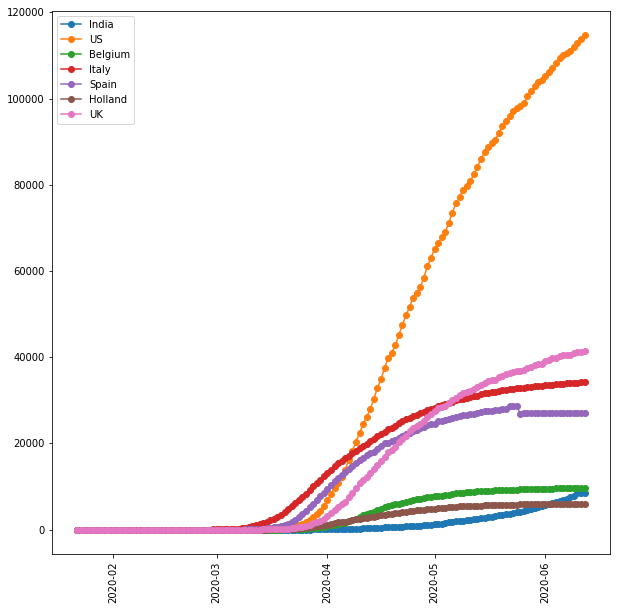

In [202]:
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['India'], label='India', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['US'], label='US', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['Belgium'], label='Belgium', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['Italy'], label='Italy', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['Spain'], label='Spain', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['Holland'], label='Holland', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['UK'], label='UK', linestyle='solid')
# plt.plot_date(x=df_trans.index, y=df_trans['China'], label='China', linestyle='solid')
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Global Recovery

In [203]:
columns = []
with open('/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    columns = next(spamreader) 
    l = [i for i in spamreader]

In [204]:
columns

['Province/State',
 'Country/Region',
 'Lat',
 'Long',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',


In [205]:
df_global_recovered = pd.DataFrame(l, columns=columns)

In [206]:
df_global_recovered.head()

Province/State Country/Region       Lat     Long 1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20 1/28/20 1/29/20 1/30/20 1/31/20 2/1/20 2/2/20 2/3/20 2/4/20 2/5/20 2/6/20 2/7/20 2/8/20 2/9/20 2/10/20 2/11/20 2/12/20 2/13/20 2/14/20 2/15/20 2/16/20 2/17/20 2/18/20 2/19/20 2/20/20 2/21/20 2/22/20 2/23/20 2/24/20 2/25/20 2/26/20 2/27/20 2/28/20 2/29/20 3/1/20 3/2/20 3/3/20 3/4/20 3/5/20 3/6/20 3/7/20 3/8/20 3/9/20 3/10/20 3/11/20 3/12/20 3/13/20 3/14/20 3/15/20 3/16/20 3/17/20 3/18/20 3/19/20 3/20/20 3/21/20 3/22/20 3/23/20 3/24/20 3/25/20 3/26/20 3/27/20 3/28/20 3/29/20 3/30/20 3/31/20 4/1/20 4/2/20 4/3/20 4/4/20 4/5/20 4/6/20 4/7/20 4/8/20 4/9/20 4/10/20 4/11/20 4/12/20 4/13/20 4/14/20 4/15/20 4/16/20 4/17/20 4/18/20 4/19/20 4/20/20 4/21/20 4/22/20 4/23/20 4/24/20 4/25/20 4/26/20 4/27/20 4/28/20 4/29/20 4/30/20 5/1/20 5/2/20 5/3/20 5/4/20 5/5/20 5/6/20 5/7/20 5/8/20 5/9/20 5/10/20 5/11/20 5/12/20 5/13/20 5/14/20 5/15/20 5/16/20 5/17/20 5/18/20 5/19/20 5/20/20 5/21/20 5/22/20  \
0                   Afghanistan      33.0     65.0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       1       1       1       1       1       1       1       1       1       2       2       2       2       2       2       5      5     10     10     10     15     18     18     29     32      32      32      32      32      40      43      54      99     112     131     135     150     166     179     188     188     207     220     228     252     260    310    331    345    397    421    458    468    472    502     558     558     610     648     691     745     745     778     801     850     930     938     996   
1                       Albania   41.1533  20.1683       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       2       2       2      10      17      17      31      31      33      44      52     67     76     89     99    104    116    131    154    165     182     197     217     232     248     251     277     283     302     314     327     345     356     385     394     403     410     422     431     455     470    488    519    531    543    570    595    605    620    627     650     654     682     688     694     705     714     715     727     742     758     771     777   
2                       Algeria   28.0339   1.6596       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       8       8      12      12      12      12      12      32      32      32      65      65      24      65      29      29      31      31      37      46     61     61     62     90     90     90    113    237    347     405     460     591     601     691     708     783     846     894    1047    1099    1152    1204    1355    1408    1479    1508    1558    1651    1702    1779   1821   1872   1936   1998   2067   2197   2323   2467   2546    2678    2841    2998    3058    3158    3271    3409    3507    3625    3746    3968    4062    4256   
3                       An

In [207]:
df_global_recovered_min = df_global_recovered.drop(columns=['Province/State', 'Lat', 'Long'])

In [208]:
list_of_columns = [col for col in df_global_recovered_min.columns if 'Country' not in col]

In [209]:
df_trans_recovered = df_global_recovered_min.transpose()

In [210]:
df_trans_recovered.head()

0        1        2        3       4                    5          6        7          8          9          10         11         12         13         14         15       16          17       18       19          20        21       22       23      24     25      26       27                      28      29      30        31            32          33        34        35      36                        37    38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72        73                   74                75          76             77       78                79    80      81       82       83       84       85        86        87                  88       89     90           91                 92       93       94        95        96    97       98      99      100     101  \
Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  Argentina  Armenia  Australia  Australia  Australia  Australia  Australia  Australia  Australia  Australia  Austria  Azerbaijan  Bahamas  Bahrain  Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  Bhutan  Bolivia  Bosnia and Herzegovina  Brazil  Brunei  Bulgaria  Burkina Faso  Cabo Verde  Cambodia  Cameroon  Canada  Central African Republic  Chad  Chile  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  Colombia  Congo (Brazzaville)  Congo (Kinshasa)  Costa Rica  Cote d'Ivoire  Croatia  Diamond Princess  Cuba  Cyprus  Czechia  Denmark  Denmark  Denmark  Djibouti  Dominica  Dominican Republic  Ecuador  Egypt  El Salvador  Equatorial Guinea  Eritrea  Estonia  Eswatini  Ethiopia  Fiji  Finland  France  France  France   
1/22/20                   0        0        0        0       0                    0          0        0          0          0          0          0          0          0          0          0        0           0        0        0           0         0        0        0       0      0       0        0                       0       0       0         0             0           0         0         0       0                         0     0      0      0      0      0      0      0      0      0      0      0      0      0      0      0     28      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0         0                    0                 0           0              0        0                 0     0       0        0        0        0        0         0         0                   0        0      0            0                  0        0        0         0         0     0        0       0       0       0   
1/23/20                   0        0        0        0       0                    0          0        0          0          0          0          0          0          0          0          0        0           0        0        0           0         0        0        0       0      0       0        0                       0       0       0         0             0           0         0         0       0                         0     0      0      0      0      0      0      0      2      0      0      0      0      0      0      0     28      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0         0                    0                 0           0              0        0                 0     0       0        0        0        0        0         0         0                   0        0      0            0                  0        0        0         0         0     0        0       0       0       0   
1/24/20                   0     

In [211]:
df_trans_recovered.iloc[0, :]

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                               Belize


In [212]:
df_global_recovered_min.head()

Country/Region 1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20 1/28/20 1/29/20 1/30/20 1/31/20 2/1/20 2/2/20 2/3/20 2/4/20 2/5/20 2/6/20 2/7/20 2/8/20 2/9/20 2/10/20 2/11/20 2/12/20 2/13/20 2/14/20 2/15/20 2/16/20 2/17/20 2/18/20 2/19/20 2/20/20 2/21/20 2/22/20 2/23/20 2/24/20 2/25/20 2/26/20 2/27/20 2/28/20 2/29/20 3/1/20 3/2/20 3/3/20 3/4/20 3/5/20 3/6/20 3/7/20 3/8/20 3/9/20 3/10/20 3/11/20 3/12/20 3/13/20 3/14/20 3/15/20 3/16/20 3/17/20 3/18/20 3/19/20 3/20/20 3/21/20 3/22/20 3/23/20 3/24/20 3/25/20 3/26/20 3/27/20 3/28/20 3/29/20 3/30/20 3/31/20 4/1/20 4/2/20 4/3/20 4/4/20 4/5/20 4/6/20 4/7/20 4/8/20 4/9/20 4/10/20 4/11/20 4/12/20 4/13/20 4/14/20 4/15/20 4/16/20 4/17/20 4/18/20 4/19/20 4/20/20 4/21/20 4/22/20 4/23/20 4/24/20 4/25/20 4/26/20 4/27/20 4/28/20 4/29/20 4/30/20 5/1/20 5/2/20 5/3/20 5/4/20 5/5/20 5/6/20 5/7/20 5/8/20 5/9/20 5/10/20 5/11/20 5/12/20 5/13/20 5/14/20 5/15/20 5/16/20 5/17/20 5/18/20 5/19/20 5/20/20 5/21/20 5/22/20 5/23/20 5/24/20 5/25/20 5/26/20 5/27/20  \
0    Afghanistan       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       1       1       1       1       1       1       1       1       1       2       2       2       2       2       2       5      5     10     10     10     15     18     18     29     32      32      32      32      32      40      43      54      99     112     131     135     150     166     179     188     188     207     220     228     252     260    310    331    345    397    421    458    468    472    502     558     558     610     648     691     745     745     778     801     850     930     938     996    1040    1075    1097    1128    1138   
1        Albania       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       2       2       2      10      17      17      31      31      33      44      52     67     76     89     99    104    116    131    154    165     182     197     217     232     248     251     277     283     302     314     327     345     356     385     394     403     410     422     431     455     470    488    519    531    543    570    595    605    620    627     650     654     682     688     694     705     714     715     727     742     758     771     777     783     789     795     803     812   
2        Algeria       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0       0       0       8       8      12      12      12      12      12      32      32      32      65      65      24      65      29      29      31      31      37      46     61     61     62     90     90     90    113    237    347     405     460     591     601     691     708     783     846     894    1047    1099    1152    1204    1355    1408    1479    1508    1558    1651    1702    1779   1821   1872   1936   1998   2067   2197   2323   2467   2546    2678    2841    2998    3058    3158    3271    3409    3507    3625    3746    3968    4062    4256    4426    4784    4747    4918    5129   
3 

In [213]:
df_trans_recovered.columns = df_trans_recovered.iloc[0, :]

In [214]:
df_trans_recovered = df_trans_recovered.iloc[1:, :]

In [215]:
df_trans_recovered.head()

Country/Region Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda Argentina Armenia Australia Australia Australia Australia Australia Australia Australia Australia Austria Azerbaijan Bahamas Bahrain Bangladesh Barbados Belarus Belgium Belize Benin Bhutan Bolivia Bosnia and Herzegovina Brazil Brunei Bulgaria Burkina Faso Cabo Verde Cambodia Cameroon Canada Central African Republic Chad Chile China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China Colombia Congo (Brazzaville) Congo (Kinshasa) Costa Rica Cote d'Ivoire Croatia Diamond Princess Cuba Cyprus Czechia Denmark Denmark Denmark Djibouti Dominica Dominican Republic Ecuador Egypt El Salvador Equatorial Guinea Eritrea Estonia Eswatini Ethiopia Fiji Finland France France France France France France France France France France Gabon Gambia Georgia Germany Ghana Grenada Greece  \
1/22/20                  0       0       0       0      0                   0         0       0         0         0         0         0         0         0         0         0       0          0       0       0          0        0       0       0      0     0      0       0                      0      0      0        0            0          0        0        0      0                        0    0     0     0     0     0     0     0     0     0     0     0     0     0     0     0    28     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0        0                   0                0          0             0       0                0    0      0       0       0       0       0        0        0                  0       0     0           0                 0       0       0        0        0    0       0      0      0      0      0      0      0      0      0      0      0     0      0       0       0     0       0      0   
1/23/20                  0       0       0       0      0                   0         0       0         0         0         0         0         0         0         0         0       0          0       0       0          0        0       0       0      0     0      0       0                      0      0      0        0            0          0        0        0      0                        0    0     0     0     0     0     0     0     2     0     0     0     0     0     0     0    28     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0        0                   0                0          0             0       0                0    0      0       0       0       0       0        0        0                  0       0     0           0                 0       0       0        0        0    0       0      0      0      0      0      0      0      0      0      0      0     0      0       0       0     0       0      0   
1/24/20                  0       0       0       0      0                   0         0       0         0         0         0         0         0         0         0         0       0          0       0       0          0        0       0       0      0     0      0       0                      0      0      0        0            0          0        0        0      0                        0    0     0     0     1     0     0     0     2     0     0     0     0     0     0     0    31     0     0     0     0     0     0     0     0     0     0     0     1     0     0     0     0     0     0     1        0                   0                0          0             0       0                0    0      0       0       0       0       0        0        0                  0       0     0           0                 0       0       0        0        0    0       0      0      0      0      0      0      0      0      0      0      0     0      0       0       0     0       0      0   
1/25/20             

In [216]:
df_trans_recovered = df_trans_recovered.astype(np.int)
df_trans_recovered.index = pd.to_datetime(df_trans_recovered.index)

In [217]:
df_trans_recovered.dtypes

Country/Region
Afghanistan                         int64
Albania                             int64
Algeria                             int64
Andorra                             int64
Angola                              int64
Antigua and Barbuda                 int64
Argentina                           int64
Armenia                             int64
Australia                           int64
Australia                           int64
Australia                           int64
Australia                           int64
Australia                           int64
Australia                           int64
Australia                           int64
Australia                           int64
Austria                             int64
Azerbaijan                          int64
Bahamas                             int64
Bahrain                             int64
Bangladesh                          int64
Barbados                            int64
Belarus                             int64
Belgium            

In [218]:
df_trans_recovered.head()

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  Argentina  Armenia  Australia  Australia  Australia  Australia  Australia  Australia  Australia  Australia  Austria  Azerbaijan  Bahamas  Bahrain  Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  Bhutan  Bolivia  Bosnia and Herzegovina  Brazil  Brunei  Bulgaria  Burkina Faso  Cabo Verde  Cambodia  Cameroon  Canada  Central African Republic  Chad  Chile  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  China  Colombia  Congo (Brazzaville)  Congo (Kinshasa)  Costa Rica  Cote d'Ivoire  Croatia  Diamond Princess  Cuba  Cyprus  Czechia  Denmark  Denmark  Denmark  Djibouti  Dominica  Dominican Republic  Ecuador  Egypt  El Salvador  Equatorial Guinea  Eritrea  Estonia  Eswatini  Ethiopia  Fiji  Finland  France  France  France  \
2020-01-22                0        0        0        0       0                    0          0        0          0          0          0          0          0          0          0          0        0           0        0        0           0         0        0        0       0      0       0        0                       0       0       0         0             0           0         0         0       0                         0     0      0      0      0      0      0      0      0      0      0      0      0      0      0      0     28      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0         0                    0                 0           0              0        0                 0     0       0        0        0        0        0         0         0                   0        0      0            0                  0        0        0         0         0     0        0       0       0       0   
2020-01-23                0        0        0        0       0                    0          0        0          0          0          0          0          0          0          0          0        0           0        0        0           0         0        0        0       0      0       0        0                       0       0       0         0             0           0         0         0       0                         0     0      0      0      0      0      0      0      2      0      0      0      0      0      0      0     28      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0         0                    0                 0           0              0        0                 0     0       0        0        0        0        0         0         0                   0        0      0            0                  0        0        0         0         0     0        0       0       0       0   
2020-01-24                0        0        0        0       0                    0          0        0          0          0          0          0          0          0          0          0        0           0        0        0           0         0        0        0       0      0       0        0                       0       0       0         0             0           0         0         0       0                         0     0      0      0      1      0      0      0      2      0      0      0      0      0      0      0     31      0      0      0      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      1         0                    0                 0           0              0        0                 0     0       0        0        0        0        0         0         0                   0        0      0            0                  0        0        0         0         0     0        0       0       0       0   
2020-01-

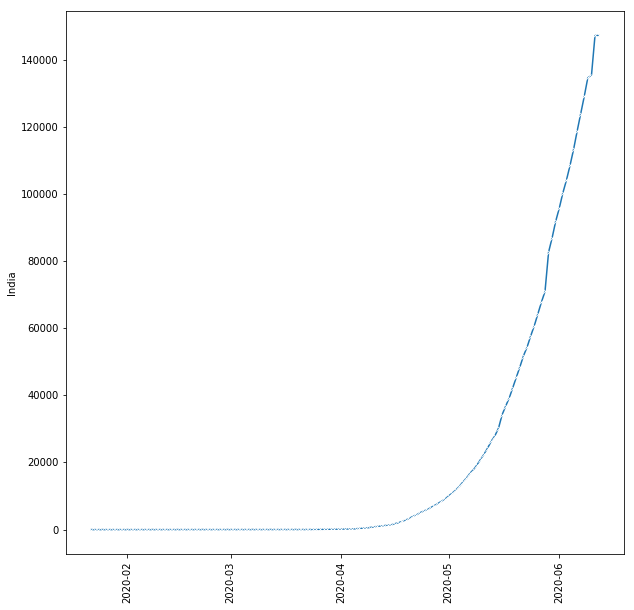

In [219]:
sns.lineplot(x=df_trans_recovered.index, y=df_trans_recovered['India'], linestyle='-', marker='x')
plt.xticks(rotation=90)
plt.show()

In [220]:
df_trans[['India','US']]

Country/Region   India       US
2020-01-22           0        1
2020-01-23           0        1
2020-01-24           0        2
2020-01-25           0        2
2020-01-26           0        5
2020-01-27           0        5
2020-01-28           0        5
2020-01-29           0        5
2020-01-30           1        5
2020-01-31           1        7
2020-02-01           1        8
2020-02-02           2        8
2020-02-03           3       11
2020-02-04           3       11
2020-02-05           3       11
2020-02-06           3       11
2020-02-07           3       11
2020-02-08           3       11
2020-02-09           3       11
2020-02-10           3       11
2020-02-11           3       12
2020-02-12           3       12
2020-02-13           3       13
2020-02-14           3       13
2020-02-15           3       13
2020-02-16           3       13
2020-02-17           3       13
2020-02-18           3       13
2020-02-19           3       13
2020-02-20           3       13
2020-02-21           3       15
2020-02-22           3       15
2020-02-23           3       15
2020-02-24           3       15
2020-02-25           3       15
2020-02-26           3       15
2020-02-27           3       16
2020-02-28           3       16
2020-02-29           3       24
2020-03-01           3       30
2020-03-02           5       53
2020-03-03           5       73
2020-03-04          28      104
2020-03-05          30      174
2020-03-06          31      222
2020-03-07          34      337
2020-03-08          39      451
2020-03-09          43      519
2020-03-10          56      711
2020-03-11          62     1109
2020-03-12          73     1560
2020-03-13          82     2149
2020-03-14         102     2859
2020-03-15         113     2955
2020-03-16         119     4338
2020-03-17         142     6114
2020-03-18         156     8874
2020-03-19         194    14098
2020-03-20         244    19410
2020-03-21         330    25733
2020-03-22         396    33660
2020-03-23         499    43720
2020-03-24         536    53959
2020-03-25         657    65872
2020-03-26         727    83893
2020-03-27         887   102040
2020-03-28         987   121814
2020-03-29        1024   140929
2020-03-30        1251   162385
2020-03-31        1397   188365
2020-04-01        1998   213792
2020-04-02        2543   244154
2020-04-03        2567   276058
2020-04-04        3082   309189
2020-04-05        3588   337023
2020-04-06        4778   366611
2020-04-07        5311   397318
2020-04-08        5916   428956
2020-04-09        6725   463649
2020-04-10        7598   497098
2020-04-11        8446   527063
2020-04-12        9205   555578
2020-04-13       10453   580823
2020-04-14       11487   607804
2020-04-15       12322   636889
2020-04-16       13430   668115
2020-04-17       14352   700794
2020-04-18       15722   729077
2020-04-19       17615   755111
2020-04-20       18539   782392
2020-04-21       20080   807832
2020-04-22       21370   835976
2020-04-23       23077   870068
2020-04-24       24530   906244
2020-04-25       26283   939114
2020-04-26       27890   966755
2020-04-27       29451   989169
2020-04-28       31324  1013614
2020-04-29       33062  1040946
2020-04-30       34863  1070568
2020-05-01       37257  1104661
2020-05-02       39699  1133807
2020-05-03       42505  1159365
2020-05-04       46437  1181728
2020-05-05       49400  1205808
2020-05-06       52987  1230968
2020-05-07       56351  1258742
2020-05-08       59695  1285782
2020-05-09       62808  1311445
2020-05-10       67161  1331180
2020-05-11       70768  1349883
2020-05-12       74292  1371672
2020-05-13       78055  1392681
2020-05-14       81997  1420141
2020-05-15       85784  1445295
2020-05-16       90648  1470350
2020-05-17       95698  1489310
2020-05-18      100328  1510899
2020-05-19      106475  1531222
2020-05-20      112028  1554636
2020-05-21      118226  1580008
2020-05-22      124794  1603993
2020-05-23      131423  1625769
2020-05-24      138536  1646523


In [221]:
df_trans_recovered.columns[df_trans_recovered.columns == 'Netherlands']

Index(['Netherlands', 'Netherlands', 'Netherlands', 'Netherlands', 'Netherlands'], dtype='object', name='Country/Region')

In [222]:
df_uk = df_trans_recovered['United Kingdom']

In [223]:
df_uk.tail()

Country/Region  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom  United Kingdom
2020-06-08                 120             102             512             165             312              10               0               3               7              11              13
2020-06-09                 120             104             512             165             312              10               0               3               7              11              13
2020-06-10                 125             107             512             169             312              10               0               3               7              11              13
2020-06-11                 127             112             512             171             312              10               0               3               7              11              13
2020-06-12                 127             115             512             172             312              10               0               3               7              11              13

In [224]:
flag = [False, False, False, False, False, False, True, False, False, False, False, False]

In [225]:
df_uk.loc[:, flag]

Country/Region  United Kingdom
2020-01-22                   0
2020-01-23                   0
2020-01-24                   0
2020-01-25                   0
2020-01-26                   0
2020-01-27                   0
2020-01-28                   0
2020-01-29                   0
2020-01-30                   0
2020-01-31                   0
2020-02-01                   0
2020-02-02                   0
2020-02-03                   0
2020-02-04                   0
2020-02-05                   0
2020-02-06                   0
2020-02-07                   0
2020-02-08                   0
2020-02-09                   0
2020-02-10                   0
2020-02-11                   0
2020-02-12                   1
2020-02-13                   1
2020-02-14                   1
2020-02-15                   1
2020-02-16                   8
2020-02-17                   8
2020-02-18                   8
2020-02-19                   8
2020-02-20                   8
2020-02-21                   8
2020-02-22                   8
2020-02-23                   8
2020-02-24                   8
2020-02-25                   8
2020-02-26                   8
2020-02-27                   8
2020-02-28                   8
2020-02-29                   8
2020-03-01                   8
2020-03-02                   8
2020-03-03                   8
2020-03-04                   8
2020-03-05                   8
2020-03-06                   8
2020-03-07                  18
2020-03-08                  18
2020-03-09                  18
2020-03-10                  18
2020-03-11                  18
2020-03-12                  18
2020-03-13                  18
2020-03-14                  18
2020-03-15                  18
2020-03-16                  20
2020-03-17                  52
2020-03-18                  65
2020-03-19                  65
2020-03-20                  65
2020-03-21                  65
2020-03-22                  65
2020-03-23                  65
2020-03-24                 135
2020-03-25                 135
2020-03-26                 135
2020-03-27                 135
2020-03-28                 135
2020-03-29                 135
2020-03-30                 135
2020-03-31                 135
2020-04-01                 135
2020-04-02                 135
2020-04-03                 135
2020-04-04                 135
2020-04-05                 135
2020-04-06                 135
2020-04-07                 135
2020-04-08                 135
2020-04-09                 135
2020-04-10                 344
2020-04-11                 344
2020-04-12                 344
2020-04-13                   0
2020-04-14                   0
2020-04-15                   0
2020-04-16                   0
2020-04-17                   0
2020-04-18                   0
2020-04-19                   0
2020-04-20                   0
2020-04-21                   0
2020-04-22                   0
2020-04-23                   0
2020-04-24                   0
2020-04-25                   0
2020-04-26                   0
2020-04-27                   0
2020-04-28                   0
2020-04-29                   0
2020-04-30                   0
2020-05-01                   0
2020-05-02                   0
2020-05-03                   0
2020-05-04                   0
2020-05-05                   0
2020-05-06                   0
2020-05-07                   0
2020-05-08                   0
2020-05-09                   0
2020-05-10                   0
2020-05-11                   0
2020-05-12                   0
2020-05-13                   0
2020-05-14                   0
2020-05-15                   0
2020-05-16                   0
2020-05-17                   0
2020-05-18                   0
2020-05-19                   0
2020-05-20                   0
2020-05-21                   0
2020-05-22                   0
2020-05-23                   0
2020-05-24                   0
2020-05-25                   0
2020-05-26                   0
2020-05-27                   0
2020-05-28                   0
2

In [226]:
df_trans_recovered['UK'] = df_uk.loc[:, flag]

In [227]:
df_trans_recovered['UK']

2020-01-22      0
2020-01-23      0
2020-01-24      0
2020-01-25      0
2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      1
2020-02-13      1
2020-02-14      1
2020-02-15      1
2020-02-16      8
2020-02-17      8
2020-02-18      8
2020-02-19      8
2020-02-20      8
2020-02-21      8
2020-02-22      8
2020-02-23      8
2020-02-24      8
2020-02-25      8
2020-02-26      8
2020-02-27      8
2020-02-28      8
2020-02-29      8
2020-03-01      8
2020-03-02      8
2020-03-03      8
2020-03-04      8
2020-03-05      8
2020-03-06      8
2020-03-07     18
2020-03-08     18
2020-03-09     18
2020-03-10     18
2020-03-11     18
2020-03-12     18
2020-03-13     18
2020-03-14     18
2020-03-15     18
2020-03-16     20
2020-03-17

In [228]:
df_netherlands = df_trans_recovered['Netherlands']

In [229]:
df_netherlands.columns

Index(['Netherlands', 'Netherlands', 'Netherlands', 'Netherlands', 'Netherlands'], dtype='object', name='Country/Region')

In [230]:
df_netherlands.tail()

Country/Region  Netherlands  Netherlands  Netherlands  Netherlands  Netherlands
2020-06-08               98           15           61            0            7
2020-06-09               98           15           61            0            7
2020-06-10               98           15           61            0            7
2020-06-11               98           15           61            0            7
2020-06-12               98           15           61            0            7

In [231]:
flag = [False, False, False, True]

In [232]:
df_netherlands.loc[:, flag]

Country/Region  Netherlands
2020-01-22                0
2020-01-23                0
2020-01-24                0
2020-01-25                0
2020-01-26                0
2020-01-27                0
2020-01-28                0
2020-01-29                0
2020-01-30                0
2020-01-31                0
2020-02-01                0
2020-02-02                0
2020-02-03                0
2020-02-04                0
2020-02-05                0
2020-02-06                0
2020-02-07                0
2020-02-08                0
2020-02-09                0
2020-02-10                0
2020-02-11                0
2020-02-12                0
2020-02-13                0
2020-02-14                0
2020-02-15                0
2020-02-16                0
2020-02-17                0
2020-02-18                0
2020-02-19                0
2020-02-20                0
2020-02-21                0
2020-02-22                0
2020-02-23                0
2020-02-24                0
2020-02-25                0
2020-02-26                0
2020-02-27                0
2020-02-28                0
2020-02-29                0
2020-03-01                0
2020-03-02                0
2020-03-03                0
2020-03-04                0
2020-03-05                0
2020-03-06                0
2020-03-07                0
2020-03-08                0
2020-03-09                0
2020-03-10                0
2020-03-11                0
2020-03-12                0
2020-03-13                0
2020-03-14                0
2020-03-15                0
2020-03-16                0
2020-03-17                0
2020-03-18                0
2020-03-19                0
2020-03-20                0
2020-03-21                0
2020-03-22                0
2020-03-23                0
2020-03-24                0
2020-03-25                0
2020-03-26                0
2020-03-27                0
2020-03-28                0
2020-03-29                0
2020-03-30                0
2020-03-31                0
2020-04-01                0
2020-04-02                0
2020-04-03                0
2020-04-04                0
2020-04-05                0
2020-04-06                0
2020-04-07                0
2020-04-08                0
2020-04-09                0
2020-04-10                0
2020-04-11                0
2020-04-12                0
2020-04-13                0
2020-04-14                0
2020-04-15                0
2020-04-16                0
2020-04-17                0
2020-04-18                0
2020-04-19                0
2020-04-20                0
2020-04-21                0
2020-04-22                0
2020-04-23                0
2020-04-24                0
2020-04-25                0
2020-04-26                0
2020-04-27                0
2020-04-28                0
2020-04-29                0
2020-04-30                0
2020-05-01                0
2020-05-02                0
2020-05-03                0
2020-05-04                0
2020-05-05                0
2020-05-06                0
2020-05-07                0
2020-05-08                0
2020-05-09                0
2020-05-10                0
2020-05-11                0
2020-05-12                0
2020-05-13                0
2020-05-14                0
2020-05-15                0
2020-05-16                0
2020-05-17                0
2020-05-18                0
2020-05-19                0
2020-05-20                0
2020-05-21                0
2020-05-22                0
2020-05-23                0
2020-05-24                0
2020-05-25                0
2020-05-26                0
2020-05-27                0
2020-05-28                0
2020-05-29                0
2020-05-30                0
2020-05-31                0
2020-06-01                0
2020-06-02                0
2020-06-03                0
2020-06-04                0
2020-06-05                0
2020-06-06                0
2020-06-07                0
2020-06-08                0
2020-06-09                0
2020-06-10                0
2020-06-11              

In [233]:
df_trans_recovered['Holland'] = df_netherlands.loc[:, flag]

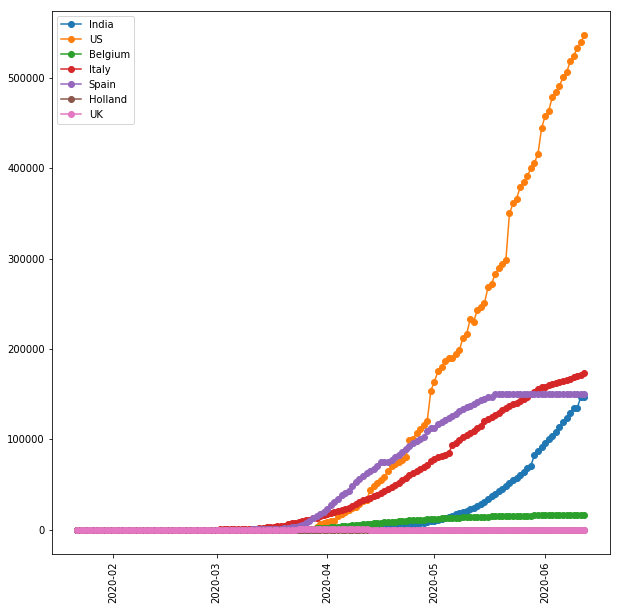

In [234]:
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['India'], label='India', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['US'], label='US', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['Belgium'], label='Belgium', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['Italy'], label='Italy', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['Spain'], label='Spain', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['Holland'], label='Holland', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['UK'], label='UK', linestyle='solid')
# plt.plot_date(x=df_trans.index, y=df_trans['China'], label='China', linestyle='solid')
# plt.plot_date(x=df_trans.index, y=df_trans['United Kingdom'], label='UK', linestyle='solid')
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Comparing Confirmed vs Recovered vs Deaths for selected countries

### India

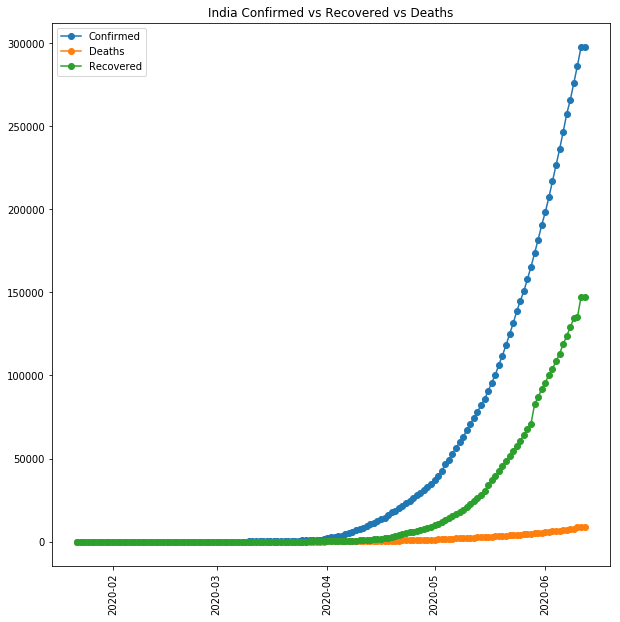

In [235]:
plt.plot_date(x=df_trans.index, y=df_trans['India'], label='Confirmed', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['India'], label='Deaths', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['India'], label='Recovered', linestyle='solid')

plt.xticks(rotation=90)
plt.legend()
plt.title('India Confirmed vs Recovered vs Deaths')
plt.show()

### UK

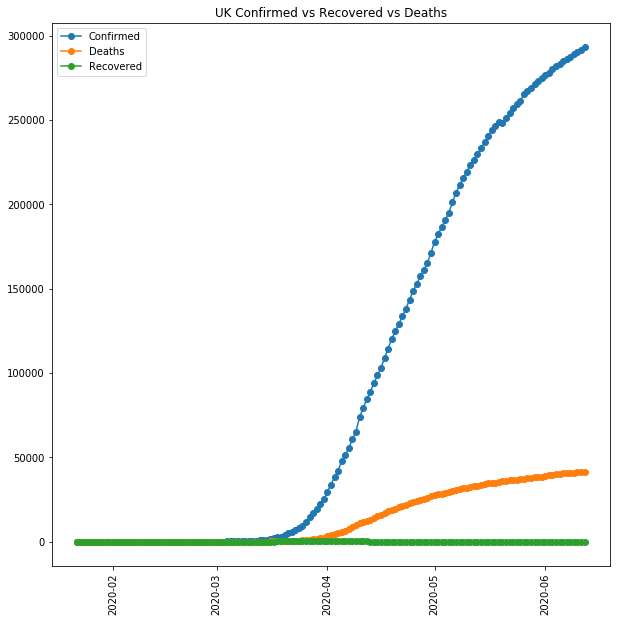

In [236]:
plt.plot_date(x=df_trans.index, y=df_trans['UK'], label='Confirmed', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['UK'], label='Deaths', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['UK'], label='Recovered', linestyle='solid')

plt.xticks(rotation=90)
plt.legend()
plt.title('UK Confirmed vs Recovered vs Deaths')
plt.show()

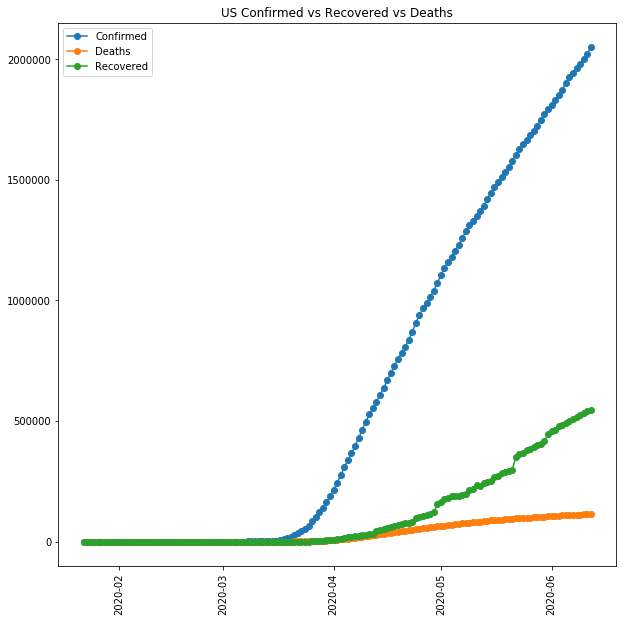

In [237]:
plt.plot_date(x=df_trans.index, y=df_trans['US'], label='Confirmed', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['US'], label='Deaths', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['US'], label='Recovered', linestyle='solid')

plt.xticks(rotation=90)
plt.legend()
plt.title('US Confirmed vs Recovered vs Deaths')
plt.show()

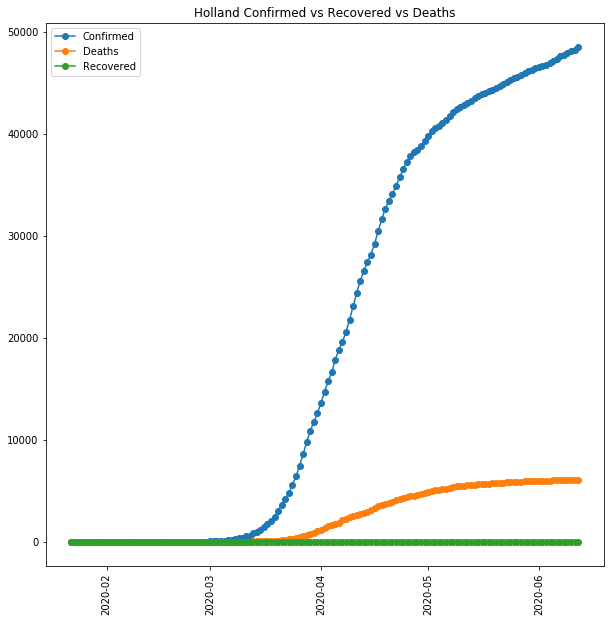

In [238]:
plt.plot_date(x=df_trans.index, y=df_trans['Holland'], label='Confirmed', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['Holland'], label='Deaths', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['Holland'], label='Recovered', linestyle='solid')

plt.xticks(rotation=90)
plt.legend()
plt.title('Holland Confirmed vs Recovered vs Deaths')
plt.show()

## Comparing India and New York Graphs

### Confirmed

In [239]:
columns = []
with open('/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    columns = next(spamreader) 
    l = [i for i in spamreader]

In [240]:
df_us_confirmed = pd.DataFrame(l, columns=columns)

In [241]:
df_us_confirmed_min = df_us_confirmed.drop(columns=['Country_Region', 'Lat', 'Long_', 'UID', 'iso2', 'iso3', 'code3',
                                                   'FIPS','Admin2', 'Combined_Key'])

In [242]:
list_of_columns = [col for col in df_us_confirmed_min.columns if 'State' not in col]

In [243]:
df_trans_us_confirmed = df_us_confirmed_min.transpose()

In [244]:
df_trans_us_confirmed.columns = df_trans_us_confirmed.iloc[0, :]

In [245]:
df_trans_us_confirmed = df_trans_us_confirmed.iloc[1:, :]

In [246]:
df_trans_us_confirmed = df_trans_us_confirmed.astype(np.int)
df_trans_us_confirmed.index = pd.to_datetime(df_trans_us_confirmed.index)

In [247]:
df_trans_us_confirmed['NY'] = df_trans_us_confirmed['New York'].agg(np.sum, axis=1)

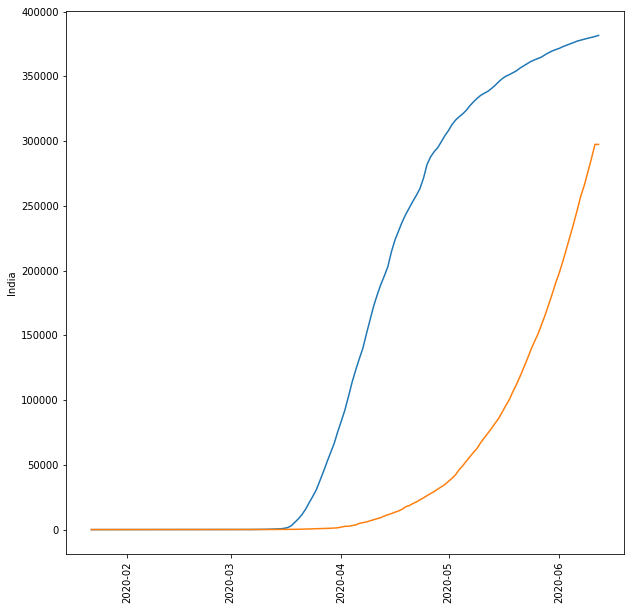

In [248]:
sns.lineplot(x=df_trans_us_confirmed.index, y=df_trans_us_confirmed['NY'])
sns.lineplot(x=df_trans.index, y=df_trans['India'])
plt.xticks(rotation=90)
plt.show()

### Deaths

In [249]:
columns = []
with open('/home/akash/Dev/python/DataScience_Journey_2020/12_Data_Analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    columns = next(spamreader) 
    l = [i for i in spamreader]

In [250]:
df_us_deaths = pd.DataFrame(l, columns=columns)

In [251]:
df_us_deaths_min = df_us_deaths.drop(columns=['Country_Region', 'Lat', 'Long_', 'UID', 'iso2', 'iso3', 'code3',
                                                   'FIPS','Admin2', 'Combined_Key', 'Population'])

In [252]:
list_of_columns = [col for col in df_us_deaths_min.columns if 'State' not in col]

In [253]:
df_trans_us_deaths = df_us_deaths_min.transpose()

In [254]:
df_trans_us_deaths.columns = df_trans_us_deaths.iloc[0, :]

In [255]:
df_trans_us_deaths = df_trans_us_deaths.iloc[1:, :]

In [256]:
df_trans_us_deaths.head()

Province_State American Samoa Guam Northern Mariana Islands Puerto Rico Virgin Islands Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alabama Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Arizona Arizona Arizona Arizona Arizona Arizona Arizona Arizona Arizona Arizona Arizona Arizona Arizona Arizona Arizona Arkansas Arkansas Arkansas Arkansas Arkansas  \
1/22/20                     0    0                        0           0              0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0        0        0        0        0        0   
1/23/20                     0    0                        0           0              0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0        0        0        0        0        0   
1/24/20                     0    0                        0           0              0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0        0        0        0        0        0   
1/25/20                 

In [257]:
df_trans_us_deaths = df_trans_us_deaths.astype(np.int)
df_trans_us_deaths.index = pd.to_datetime(df_trans_us_deaths.index)

In [258]:
df_trans_us_deaths['NY'] = df_trans_us_deaths['New York'].agg(np.sum, axis=1)

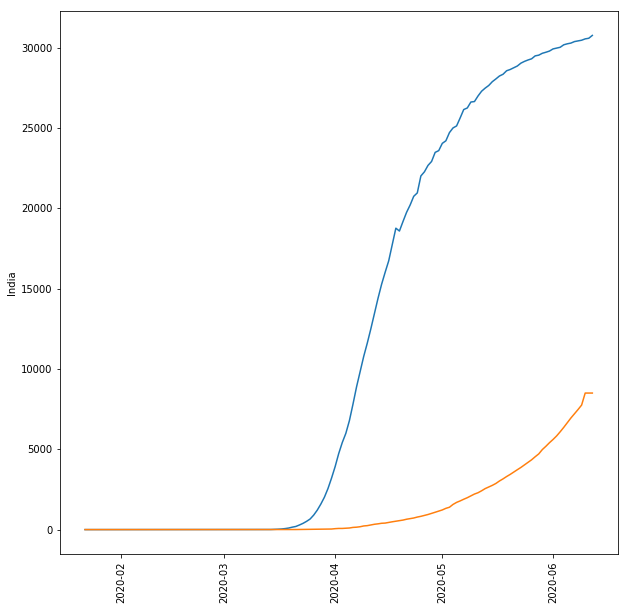

In [259]:
sns.lineplot(x=df_trans_us_deaths.index, y=df_trans_us_deaths['NY'])
sns.lineplot(x=df_trans_deaths.index, y=df_trans_deaths['India'])
plt.xticks(rotation=90)
plt.show()

### Comparing Confirmed vs Recovered vs Deaths for selected countries

### India

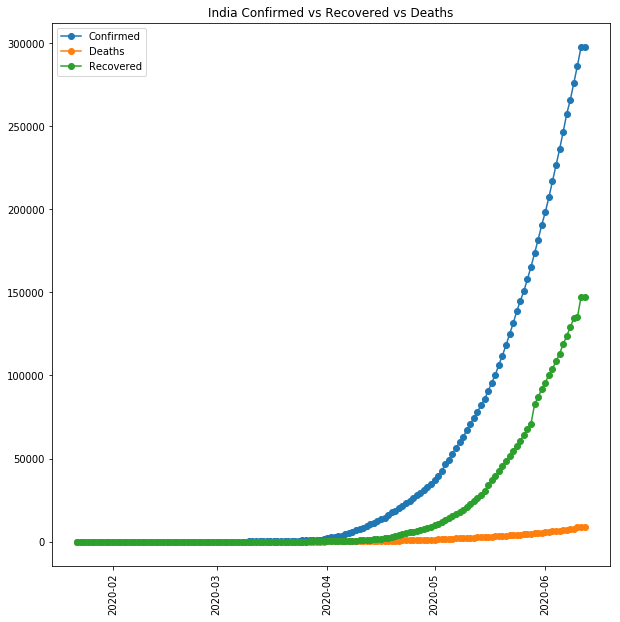

In [260]:
plt.plot_date(x=df_trans.index, y=df_trans['India'], label='Confirmed', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['India'], label='Deaths', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['India'], label='Recovered', linestyle='solid')

plt.xticks(rotation=90)
plt.legend()
plt.title('India Confirmed vs Recovered vs Deaths')
plt.show()

### UK

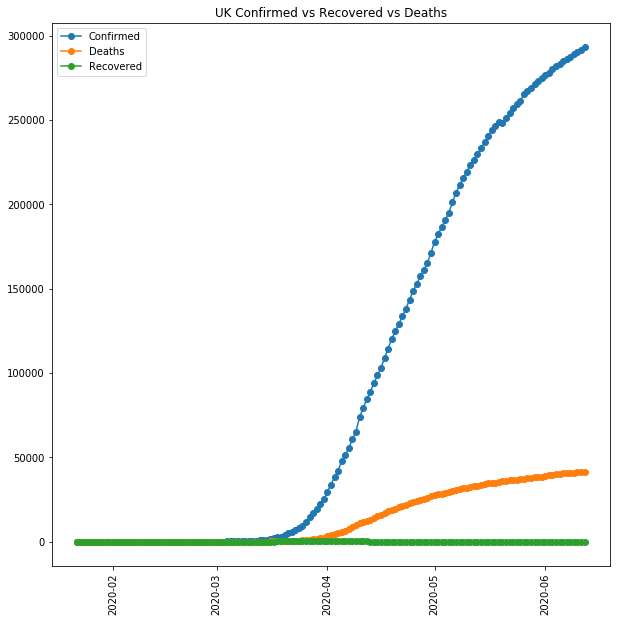

In [261]:
plt.plot_date(x=df_trans.index, y=df_trans['UK'], label='Confirmed', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['UK'], label='Deaths', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['UK'], label='Recovered', linestyle='solid')

plt.xticks(rotation=90)
plt.legend()
plt.title('UK Confirmed vs Recovered vs Deaths')
plt.show()

### Time Series Forecasting

In [462]:
df_trans_deaths_us = df_trans_deaths[['US']]

In [463]:
df_trans_deaths_us.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               ...
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12'], dtype='datetime64[ns]', length=143, freq=None)

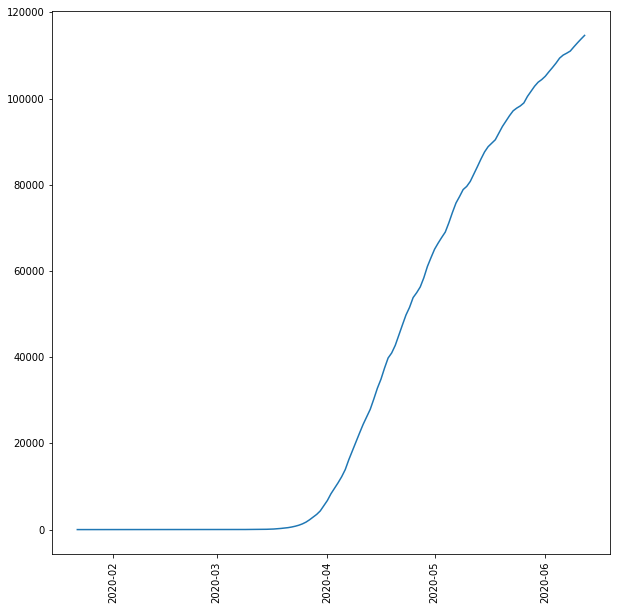

In [464]:
plt.plot(df_trans_deaths_us)
plt.xticks(rotation=90)
plt.show()

In [465]:
df_us1 = df_trans_deaths_us.diff().fillna(df_trans_deaths_us)
df_us1.tail()

Country/Region     US
2020-06-08      496.0
2020-06-09      969.0
2020-06-10      927.0
2020-06-11      885.0
2020-06-12      846.0

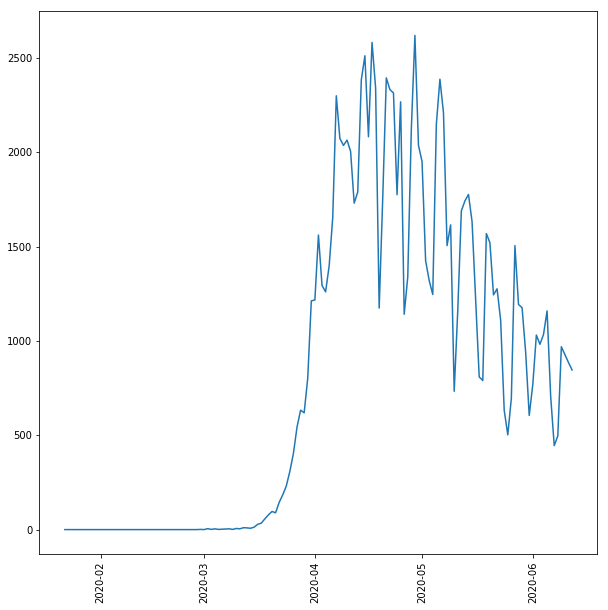

In [466]:
plt.plot(df_us1)
plt.xticks(rotation=90)
plt.show()

In [467]:
df_us1 = df_trans_deaths_us.diff().fillna(df_trans_deaths_us)
df_us1.tail()

Country/Region     US
2020-06-08      496.0
2020-06-09      969.0
2020-06-10      927.0
2020-06-11      885.0
2020-06-12      846.0

In [468]:
df_us2 = df_us1.diff().fillna(df_us1)
df_us2.tail()

Country/Region     US
2020-06-08       51.0
2020-06-09      473.0
2020-06-10      -42.0
2020-06-11      -42.0
2020-06-12      -39.0

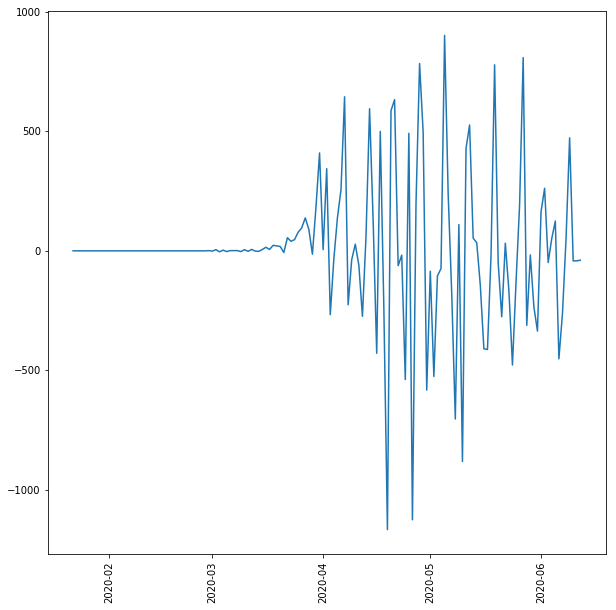

In [469]:
df_us2 = df_us1.diff().fillna(df_us1)
plt.plot(df_us2)
plt.xticks(rotation=90)
plt.show()

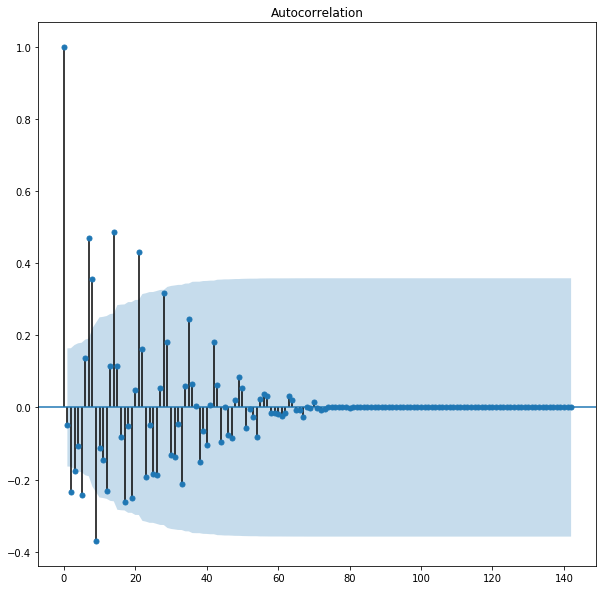

In [470]:
plot_acf(df_us2)
plt.show()

#### Note spikes at 10, 15, 20

- Helps us determine moving average terms

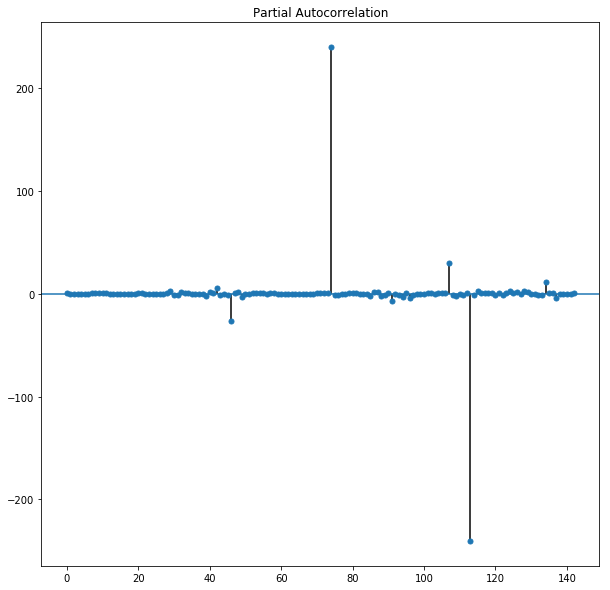

In [471]:
plot_pacf(df_us2)
plt.show()

#### Note spike at 57

- helps us determine AR terms

In [567]:
ARIMA_model = ARIMA(df_trans_deaths_us, order=(1, 2, 3)).fit(transparams=False)

/home/akash/Dev/python/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/akash/Dev/python/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [473]:
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D2.US   No. Observations:                  141
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -992.265
Method:                       css-mle   S.D. of innovations            274.786
Date:                Sat, 13 Jun 2020   AIC                           1996.530
Time:                        16:27:36   BIC                           2014.223
Sample:                    01-24-2020   HQIC                          2003.720
                         - 06-12-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.1594     10.531      0.585      0.560     -14.481      26.800
ar.L1.D2.US    -0.9454      0.047    -20.069      0.000      -1.038      -0.853
ma.L1.D2.US     0.7930      0.086      9.246      0.000       0.625       0.961
ma.L2.D2.US    -0.5092      0.076     -6.707      0.000      -0.658      -0.360
ma.L3.D2.US    -0.4122      0.068     -6.095      0.000      -0.545      -0.280
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0578           +0.0000j            1.0578            0.5000
MA.1            1.3938           -0.0000j            1.3938           -0.0000
MA.2           -1.3145           -0.1124j            1.3193           -0.4864
MA.3           -1.3145           +0.1124j            1.3193            0.4864
-----------------------------------------------------------------------------
"""

In [474]:
df_trans_deaths_us.head()

Country/Region  US
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0

In [475]:
df_trans_deaths_us.tail(6)

Country/Region      US
2020-06-07      110546
2020-06-08      111042
2020-06-09      112011
2020-06-10      112938
2020-06-11      113823
2020-06-12      114669

In [565]:
arma_predict = ARIMA_model.predict('2020-06-05', '2020-06-15', typ='levels')

In [566]:
arma_predict

2020-06-05    6608.588036
2020-06-06    6888.881516
2020-06-07    7201.652754
2020-06-08    7476.392674
2020-06-09    7779.234750
2020-06-10    8058.476274
2020-06-11    8721.362208
2020-06-12    8694.674244
2020-06-13    9081.783509
2020-06-14    9441.351452
2020-06-15    9869.190238
Freq: D, dtype: float64

In [478]:
undiff1 = df_us2.cumsum().fillna(df_us2)
undiff2 = df_us1.cumsum().fillna(df_us1)

In [479]:
all(round(df_trans_deaths_us, 6) == round(undiff2 ,6))

True

In [480]:
df_trans_deaths_us.tail()

Country/Region      US
2020-06-08      111042
2020-06-09      112011
2020-06-10      112938
2020-06-11      113823
2020-06-12      114669

In [481]:
undiff2.tail()

Country/Region        US
2020-06-08      111042.0
2020-06-09      112011.0
2020-06-10      112938.0
2020-06-11      113823.0
2020-06-12      114669.0

#### Mean Absolute Error for Forecast Evaluation

In [564]:
arma_predict2 = ARIMA_model.predict('2020-01-24', '2020-06-15', typ='levels')
ser2 = arma_predict2

In [483]:
ser2

2020-01-24         6.159429
2020-01-25         6.736573
2020-01-26         8.724446
2020-01-27        10.051846
2020-01-28        10.555733
2020-01-29        12.115169
2020-01-30        11.754240
2020-01-31        13.129390
2020-02-01        12.511748
2020-02-02        13.566841
2020-02-03        12.987114
2020-02-04        13.734000
2020-02-05        13.284959
2020-02-06        13.785207
2020-02-07        13.470325
2020-02-08        13.791357
2020-02-09        13.584200
2020-02-10        13.783040
2020-02-11        13.652993
2020-02-12        13.772391
2020-02-13        13.693805
2020-02-14        13.763489
2020-02-15        13.717574
2020-02-16        13.757141
2020-02-17        13.731163
2020-02-18        13.753008
2020-02-19        13.738787
2020-02-20        13.750488
2020-02-21        13.742979
2020-02-22        13.749032
2020-02-23        13.745234
2020-02-24        13.748233
2020-02-25        13.746416
2020-02-26        13.747819
2020-02-27        13.747018
2020-02-28        13

In [484]:
df_trans_deaths_us.head(11)

Country/Region  US
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
2020-01-27       0
2020-01-28       0
2020-01-29       0
2020-01-30       0
2020-01-31       0
2020-02-01       0

In [485]:
actual = df_trans_deaths_us.loc['2020-01-24':, :]

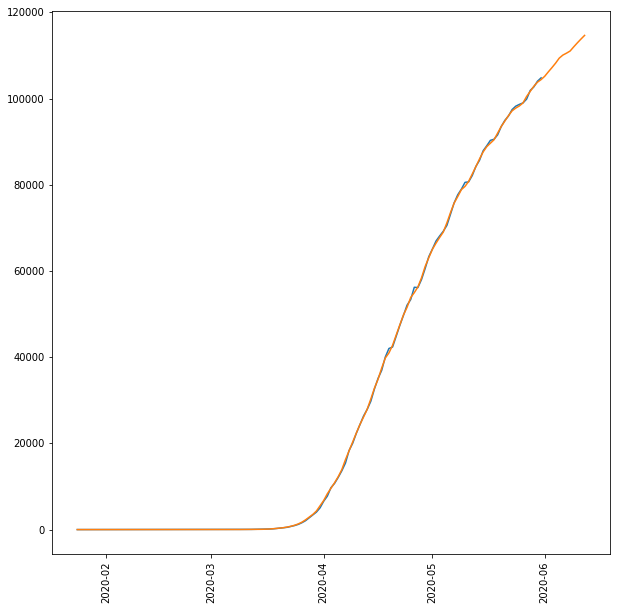

In [486]:
plt.plot(ser2)
plt.plot(actual)
plt.xticks(rotation=90)
plt.show()

### Converting DataFrame to actual time series data, where each day has number of deaths i.e deaths value is not cumulated.

In [487]:
df_trans_deaths_us = df_trans_deaths[['US']]

In [488]:
df_trans_deaths_us = df_trans_deaths_us.diff(axis=0).fillna(df_trans_deaths_us)

In [489]:
df_trans_deaths_us.tail()

Country/Region     US
2020-06-08      496.0
2020-06-09      969.0
2020-06-10      927.0
2020-06-11      885.0
2020-06-12      846.0

In [490]:
df_trans_deaths_us.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               ...
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12'], dtype='datetime64[ns]', length=143, freq=None)

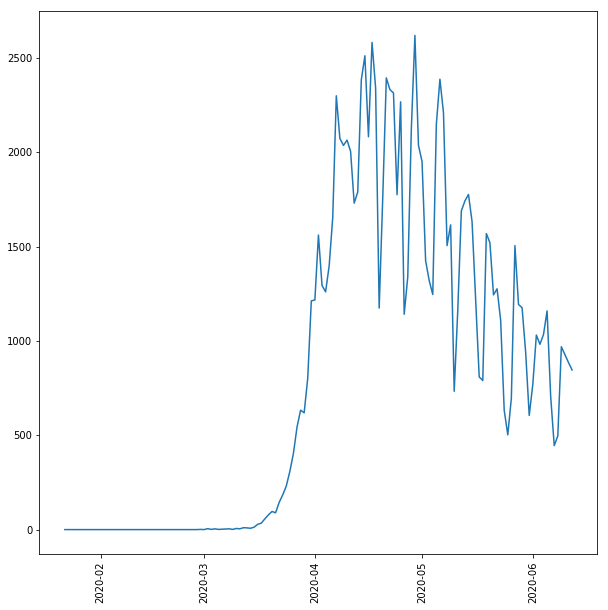

In [491]:
plt.plot(df_trans_deaths_us)
plt.xticks(rotation=90)
plt.show()

In [492]:
df_us1 = df_trans_deaths_us.diff().fillna(df_trans_deaths_us)
df_us1.tail()

Country/Region     US
2020-06-08       51.0
2020-06-09      473.0
2020-06-10      -42.0
2020-06-11      -42.0
2020-06-12      -39.0

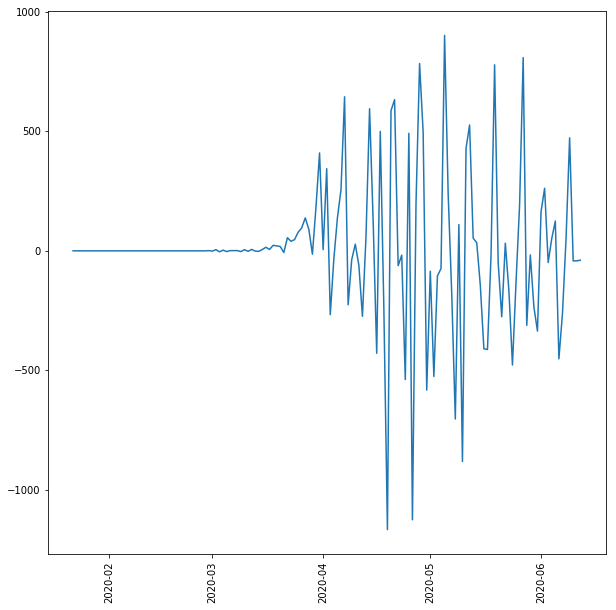

In [493]:
plt.plot(df_us1)
plt.xticks(rotation=90)
plt.show()

In [494]:
df_us1 = df_trans_deaths_us.diff().fillna(df_trans_deaths_us)
df_us1.tail()

Country/Region     US
2020-06-08       51.0
2020-06-09      473.0
2020-06-10      -42.0
2020-06-11      -42.0
2020-06-12      -39.0

In [495]:
df_us2 = df_us1.diff().fillna(df_us1)
df_us2.tail()

Country/Region     US
2020-06-08      313.0
2020-06-09      422.0
2020-06-10     -515.0
2020-06-11        0.0
2020-06-12        3.0

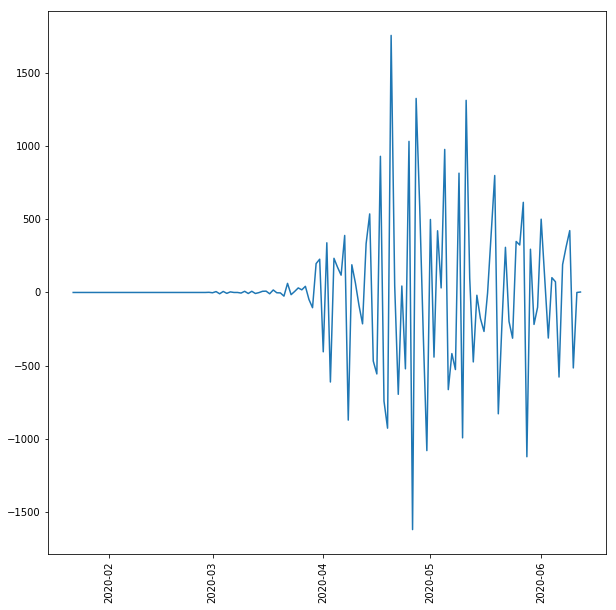

In [496]:
df_us2 = df_us1.diff().fillna(df_us1)
plt.plot(df_us2)
plt.xticks(rotation=90)
plt.show()

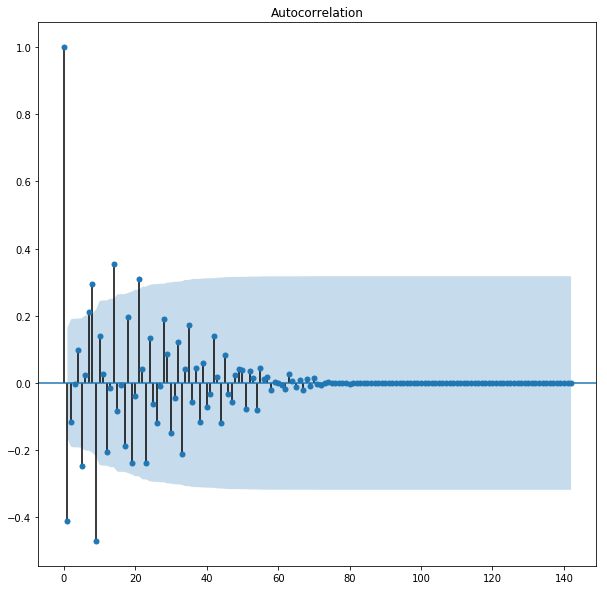

In [497]:
plot_acf(df_us2)
plt.show()

#### Note spikes at 10, 15, 20

- Helps us determine moving average terms

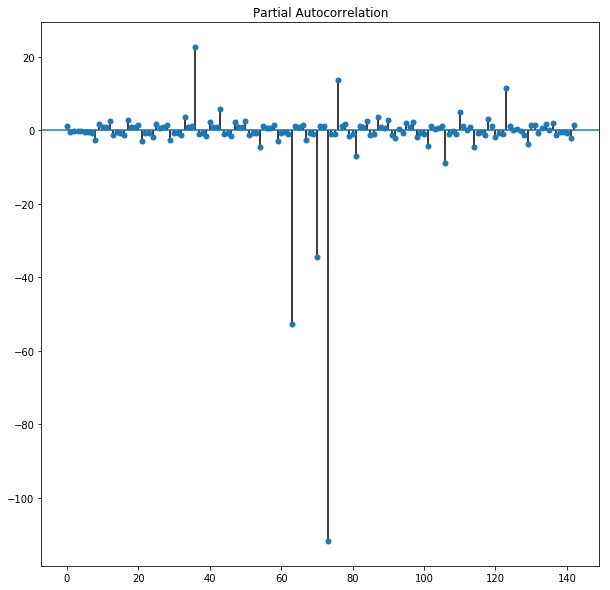

In [498]:
plot_pacf(df_us2)
plt.show()

#### Note spike at 57

- helps us determine AR terms

In [499]:
df_trans_deaths_us.tail()

Country/Region     US
2020-06-08      496.0
2020-06-09      969.0
2020-06-10      927.0
2020-06-11      885.0
2020-06-12      846.0


ARIMA_model = ARIMA(df_trans_deaths_us, order=(7, 2, 10)).fit(transparams=False)

ARIMA_model = ARIMA(df_trans_deaths_us, order=(7, 2, 8)).fit(transparams=False)

ARIMA_model = ARIMA(df_trans_deaths_us, order=(4, 1, 3)).fit(transparams=False)

ARIMA_model = ARIMA(df_trans_deaths_us, order=(4, 1, 2)).fit(transparams=False)

ARIMA_model = ARIMA(df_trans_deaths_us, order=(3, 1, 2)).fit(transparams=False)

ARIMA_model = ARIMA(df_trans_deaths_us, order=(7, 1, 4)).fit(transparams=False) -- rmse: 185

ARIMA_model = ARIMA(df_trans_deaths_us, order=(8, 1, 4)).fit(transparams=False) -- rmse: 169

ARIMA_model = ARIMA(df_trans_deaths_us, order=(9, 1, 4)).fit(transparams=False) -- rmse: 168

ARIMA_model = ARIMA(df_trans_deaths_us, order=(10, 1, 5)).fit(transparams=False) -- rmse: 172

ARIMA_model = ARIMA(df_trans_deaths_us, order=(10, 1, 7)).fit(transparams=False) -- rmse: 159.82600707116745

ARIMA_model = ARIMA(df_trans_deaths_us, order=(9, 1, 7)).fit(transparams=False) -- 163.5387497836783

ARIMA_model = ARIMA(df_trans_deaths_us, order=(9, 1, 4)).fit(transparams=False) -- 174

ARIMA_model = ARIMA(df_trans_deaths_us, order=(9, 1, 5)).fit(transparams=False) --  173

In [500]:
ARIMA_model = ARIMA(df_trans_deaths_us, order=(9, 1, 6)).fit(transparams=False)

/home/akash/Dev/python/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/akash/Dev/python/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/akash/Dev/python/venv/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [501]:
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.US   No. Observations:                  142
Model:                 ARIMA(9, 1, 6)   Log Likelihood                -940.043
Method:                       css-mle   S.D. of innovations                nan
Date:                Sat, 13 Jun 2020   AIC                           1914.085
Time:                        16:27:43   BIC                           1964.334
Sample:                    01-23-2020   HQIC                          1934.505
                         - 06-12-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4807     13.499      0.184      0.854     -23.978      28.939
ar.L1.D.US     0.5472      0.120      4.551      0.000       0.312       0.783
ar.L2.D.US     0.0009      0.139      0.006      0.995      -0.272       0.274
ar.L3.D.US     0.3935      0.102      3.850      0.000       0.193       0.594
ar.L4.D.US    -0.4116      0.120     -3.416      0.001      -0.648      -0.175
ar.L5.D.US     0.1835      0.138      1.327      0.187      -0.088       0.455
ar.L6.D.US     0.1203      0.111      1.079      0.283      -0.098       0.339
ar.L7.D.US     0.3219      0.075      4.264      0.000       0.174       0.470
ar.L8.D.US     0.1883      0.091      2.069      0.041       0.010       0.367
ar.L9.D.US    -0.5885      0.084     -7.021      0.000      -0.753      -0.424
ma.L1.D.US    -1.1467      0.149     -7.676      0.000      -1.439      -0.854
ma.L2.D.US     0.1728      0.221      0.782      0.436      -0.260       0.606
ma.L3.D.US    -0.3119      0.145     -2.152      0.033      -0.596      -0.028
ma.L4.D.US     0.8278      0.143      5.785      0.000       0.547       1.108
ma.L5.D.US    -0.5755      0.229     -2.512      0.013      -1.024      -0.127
ma.L6.D.US     0.2592      0.140      1.853      0.066      -0.015       0.533
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0580           -0.1576j            1.0696           -0.0235
AR.2            1.0580           +0.1576j            1.0696            0.0235
AR.3            0.6352           -0.7871j            1.0114           -0.1419
AR.4            0.6352           +0.7871j            1.0114            0.1419
AR.5           -0.1879           -1.0469j            1.0637           -0.2783
AR.6           -0.1879           +1.0469j            1.0637            0.2783
AR.7           -0.7293           -0.7141j            1.0207           -0.3767
AR.8           -0.7293           +0.7141j            1.0207            0.3767
AR.9           -1.2318           -0.0000j            1.2318           -0.5000
MA.1           -0.7353           -0.8038j            1.0893           -0.3679
MA.2           -0.7353           +0.8038j            1.0893            0.3679
MA.3            0.9983           -0.3249j            1.0499           -0.0501
MA.4            0.9983           +0.3249j            1.0499            0.0501
MA.5            0.8473           -1.4940j            1.7176           -0.1679
MA.6            0.8473           +1.4940j            1.7176            0.1679
-----------------------------------------------------------------------------
"""

In [502]:
arma_predict = ARIMA_model.predict('2020-06-05', '2020-06-15', typ='levels')

In [503]:
arma_predict

2020-06-05    1057.641404
2020-06-06     956.210230
2020-06-07     675.794387
2020-06-08     574.742376
2020-06-09     942.112444
2020-06-10     958.938906
2020-06-11     862.820584
2020-06-12     967.852100
2020-06-13     600.618814
2020-06-14     227.317274
2020-06-15     307.616732
Freq: D, dtype: float64

In [504]:
undiff1 = df_us2.cumsum().fillna(df_us2)
undiff2 = df_us1.cumsum().fillna(df_us1)

In [505]:
all(round(df_trans_deaths_us, 6) == round(undiff2 ,6))

True

#### Mean Absolute Error for Forecast Evaluation

In [506]:
arma_predict2 = ARIMA_model.predict('2020-01-23', '2020-06-05', typ='levels')
ser2 = arma_predict2

In [507]:
actual = df_trans_deaths_us.loc['2020-01-24':, :]

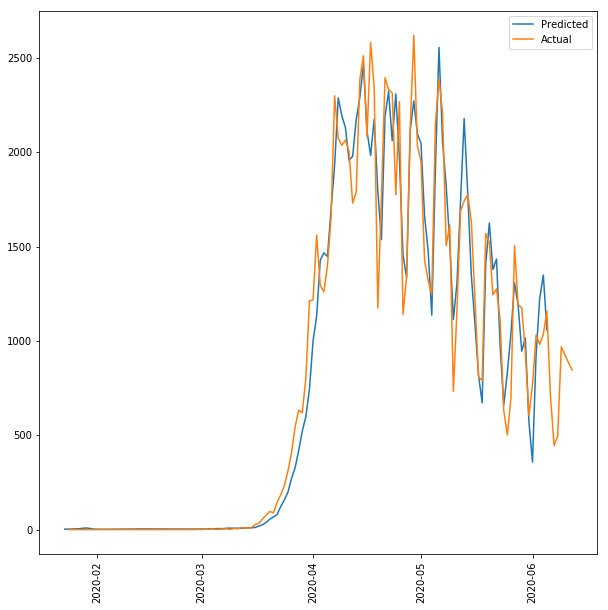

In [508]:
plt.plot(ser2, label='Predicted')
plt.plot(actual, label='Actual')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [509]:
df_new = pd.DataFrame(actual)

In [510]:
df_new['predicted'] = ser2

In [511]:
df_new = df_new.rename(columns={"US":"actual"})

In [512]:
df_new.tail()

Country/Region  actual  predicted
2020-06-08       496.0        NaN
2020-06-09       969.0        NaN
2020-06-10       927.0        NaN
2020-06-11       885.0        NaN
2020-06-12       846.0        NaN

In [513]:
df_new.loc[:, 'error'] = np.absolute(df_new.predicted - df_new.actual)

In [514]:
df_new.head()

Country/Region  actual  predicted     error
2020-01-24         0.0   2.455957  2.455957
2020-01-25         0.0   3.030826  3.030826
2020-01-26         0.0   3.751598  3.751598
2020-01-27         0.0   4.779724  4.779724
2020-01-28         0.0   7.021749  7.021749

In [515]:
df_new.loc[:, 'error_squared'] = np.square(df_new.predicted - df_new.actual)

In [516]:
df_new.tail()

Country/Region  actual  predicted  error  error_squared
2020-06-08       496.0        NaN    NaN            NaN
2020-06-09       969.0        NaN    NaN            NaN
2020-06-10       927.0        NaN    NaN            NaN
2020-06-11       885.0        NaN    NaN            NaN
2020-06-12       846.0        NaN    NaN            NaN

In [517]:
sum(df_new.error_squared)

nan

In [518]:
len(df_new)

141

In [519]:
sum(df_new.error_squared) / len(df_new)

nan

In [520]:
np.sqrt(sum(df_new.error_squared) / len(df_new))

nan

In [521]:
root_mean_square_error = np.sqrt(sum(df_new.error_squared) / len(df_new))

In [522]:
root_mean_square_error

nan

In [523]:
test_results = adfuller(df_us2.US)

In [524]:
test_results[1]

0.005212946752646268